**Stock Price Prediction**

Kavian Shirkoohi

August 2021

# Qualitative brief

**Aims and objectives**

We want to predict closing prices in the near-future of the top five stocks. Given historical market data, we will use two classifiers: a traditional regression-based model from the 20th century, and a variation of an Artificial Neural Network (ANN). Ultimately, we wish to compare the performance of the two in terms of computational time, and accuracy, and establish a trade-off. We also wish to demonstrate the power of ANNs and how important they have become with features such as pattern analyisis in the era of Big Data. 

**Setting the scenario**

We will use the [yfinance plugin](https://pypi.org/project/yfinance/) to obtain qualitative historical data from Yahoo! Finance. The stocks of the top five technology companies [dominating the S&P 500](https://www.barrons.com/articles/big-tech-stocks-sp-500-51627312933?tesla=y) will be analysed. These companies operate in essentially the same market, making them natural competitors  within the oligopoly. They include: Apple (AAPL), Microsoft (MSFT), Alphabet (GOOG), Amazon (AMZN) and Facebook (FB). Combined, they account for almost 23% of the entire index. 

Each stock will be selected from the same time period. We will analyse the stocks for the past five years. On one hand, we *could* have chosen to analyse the entire decade (2010-2020), however this may not be as useful to the original goal: to predict the near-future closing prices shortly after our time period. Due to the exponential volatility of the technology market, selecting an entire decade (with so many one-off and irreversible changes) may not be a good predictor of what happens in the next.

**Qualitative trends: a summary**

With that being said, there were a number of significant innovations and changes between 2015-2020 alone. Each company in the list, with the exception of Facebook, evolved from being a leading provider of cutting-edge hardware or innovative software services to fiercely competing in a rapidly expanding subscription-based service market.

* Having enjoyed continued successes of the [iPhone decade](https://www.cnbc.com/2019/12/16/apples-iphone-created-industries-and-changed-the-world-this-decade.html) alongside walled-garden services within its ecosystem, Apple established its own all-in-one subscription suite: Apple One.

* Google [became a subsidiary](https://www.investopedia.com/articles/investing/081115/why-google-became-alphabet.asp) of Alphabet, a parent company established in 2015, as well as already owning the largest search engine on the web as well as the video sharing website YouTube.

* Amazon [consolidated its position](https://www.businessinsider.com/amazon-decade-review-2010s-growth-2019-12?r=US&IR=T) as the largest e-commerce marketplace, despite competition from Alibaba, as well as protecting its market power with online services such as Amazon Prime and Audible. 

* Microsoft remained a [world leader in technology](https://www.cnbc.com/2019/05/25/microsoft-has-grown-more-than-a-basket-of-unicorns-since-2015.html), having been the only company to remain in the top psition for several decades. Its survival was aided through the evolution of cloud-based services such as Office and OneDrive.

* Facebook [became much more than a social networking service](https://arstechnica.com/tech-policy/2019/12/why-the-2010s-were-the-facebook-decade/), having acquired Instagram in 2012 and Occulus in 2014. The latter of the two produced the VR headset Occulus Rift, which gained a lot of public awe during the mid 2010's.

Each company was also no stranger to bad publicity, which may have negatively affected performance and thus stock pricing.

* As the largest technology company in the world, Apple has always attracted controversy. From scandals including political events to copyright and censorship, the Cupertino giant is not without criticism. Stock prices have been directly affected by controversial decisions in its products from the blocking apps in the App Store with a [conflict of interest](https://edition.cnn.com/2020/09/25/tech/apple-fortnite-epic-games-lawsuit/index.html), to design compromises such as the removal of the [headphone jack](https://www.theguardian.com/technology/2016/sep/08/apple-faces-tough-sell-after-scrapping-iphone-7-headphones-jack) and allegedly lackluster iPhone releases resulting in users [keeping their older handsets](https://www.zdnet.com/article/heres-an-interesting-chart-iphone-unit-sales-have-been-declining-steadily-for-five-years/). 

* Google has always been [accused of antitrust violations](https://www.creativefuture.org/google-scandal-timeline/) within its search engine and advertising services. Google+ raised controversy in the early 2010's when YouTube users were forced to create an account on the social networking platform or risk losing thier channel. This ultimately led to a [data leak and closure](https://www.theguardian.com/technology/2018/oct/08/google-plus-security-breach-wall-street-journal) of the social networking service that was said to rival Facebook.

* Former employees at Amazon have reported a [toxic work culture](https://www.inc.com/walter-chen/four-lessons-in-building-a-culture-that-doesnt-suck-from-ex-amazon-employees.html) with some going to lengths to even accuse the company of several [human rights violations](https://www.greenamerica.org/blog/10-ways-amazon-violates-human-rights), both internal and external.

* Microsoft has taken a series of blows in the few years, from complaints of a 'freemium' Windows 10 [driving users towards other operating systems like MacOS and Linux](https://www.techradar.com/news/bad-news-for-windows-10-as-users-shift-to-ubuntu-and-macos), to the [failed Windows Phone](https://www.theverge.com/2017/10/10/16452162/windows-phone-history-glorious-failure) (a competitor for both Android and iPhone devices).

* Facebook was no exception. With several privacy concerns for a company handling one of the largest sets of data of many individuals in the world, the social media giant was a not without scandals. Such is an example with their former partner Cambridge Analytica, where Facebook was [exposed for leaking personal information](https://www.businessinsider.com/cambridge-analytica-whistleblower-christopher-wylie-facebook-data-2019-10?r=US&IR=T) for marketing purposes without the users consent.

With this background brief, we will be able to conduct a sensible qualitative and quantitiative analysis of the Yahoo! Finance dataset for our chosen stocks.

**Quantitative trends**

We will now investigate the dataset from *yfinance* to get a general idea of what we are working with. This way, we will be able to conduct a *qualitative* analysis of our dataset to verify the trends correspond with the qualitatitve ones. Posessing some background knowledge really helps us understand about the data and make it easier to debug or check if something goes wrong.

# Setup

## Dependencies

We begin by importing all of the required packages. Versioning is important here, because a lot of the modules will not work (particularly tensorflow and keras) if there are inconsistent versions. Hence, modules such as *keras-tuner* are installed in Colab at the beginning to ensure the latest version is always used.

In [1]:
!pip install yfinance
!pip install keras-tuner
!pip install pmdarima
!pip install statsmodels
!pip install --user scipy==1.3.2 
!pip install -U scikit-learn

     |████████████████████████████████| 6.3 MB 8.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=b93087d43026a1c1daa8d57601d7da55a605c4189757b2022a66ab1340479069
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 96 kB 5.0 MB/s 
     |████████████████████████████████| 1.5 MB 8.1 MB/s 
     |████████████████████████████████| 9.5 MB 42.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 25.2 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are insta

In [2]:
import datetime
import time
import requests
import io
import pandas as pd
import seaborn as sns
import yfinance as yf
import tensorflow
import math
import numpy as np
import os
import plotly.graph_objects as go
import sklearn.preprocessing
import tensorflow 

from math import sqrt
from numpy import concatenate
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import kurtosis, skew, norm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.compat.pandas import Appender
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib import pyplot as plt
from pandas import concat
from tensorflow import optimizers, keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import adam_v2
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import BayesianOptimization
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

!pip install scikit-uplift==0.1.2 # Required for pylab rcParams to work
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import plotly.graph_objects as go
from pylab import rcParams
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data import

Here, we import the *yfinance* data and begin preparing it for analysis and learning. We extract the closing price columns, and add a new column containing the daily returns. Both of these columns are formatted as a time series. 

**Important note:** we remove the first few entries from the closing price dataset to make it consistent with the returns set. This is because returns relies on data from before *dateStart* which results in null entries. We can deal with this by moving our start date backwards by a few days and omitting the first entries from the set.

In [3]:
stockNames = ["FB","AMZN","AAPL", "MSFT", "GOOG"]
numberOfStocks = len(stockNames)
stockClose = [None] * numberOfStocks
stockReturns = [None] * numberOfStocks
dateStart = "2014-12-31"
dateEnd = "2020-12-30"

def importStock(stock):
  imported = yf.download(stock, dateStart, dateEnd)
  close = imported['Close']
  imported.insert(1, 'Returns', close.pct_change(1).dropna(), True) 
  imported = imported.iloc[1:] # Remove NaN
  returns = imported['Returns']
  return close, returns
for stock in range(0, numberOfStocks):
  close, returns = importStock(stockNames[stock])
  stockClose[stock] = close
  stockReturns[stock] = returns
del close, returns

for datatype in [stockNames, numberOfStocks, stockClose, stockReturns]:
  print("Data type: {}".format(type(datatype)))
del datatype

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Data type: <class 'list'>
Data type: <class 'int'>
Data type: <class 'list'>
Data type: <class 'list'>


For the majority of the project, we will be working with *lists*. This is an efficient means of processing all stocks simultaneously; there is no need to deal with an extensive list of variables. These lists will be converted back and forth to related formats such as pandas dataframes, time series and numpy arrays when a specific operation is required.

## Performance metrics

For a regression task (such as this one) the [three primary metrics](https://machinelearningmastery.com/regression-metrics-for-machine-learning/) for evaluating a learner's performance are: Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).




**Mean Squared Error** is the average squared difference between a prediction and its true value.

$\mathrm{MSE}=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\hat{x}_{i}\right)^{2}$

**Root Mean Squared Error** is the root of the MSE. Analagous to standard deviation, hence sometimes known as *standard* error.

$\mathrm{RMSE}=\sqrt{\sum_{i=1}^{n} \frac{\left(\hat{x}_{i}-x_{i}\right)^{2}}{n}}$

**Mean Absolute Error** is the absolute difference between a prediction and its true value.

$\mathrm{MAE}=\frac{1}{n} \sum_{i=1}^{n} | x_{i}-x |$

**Mean Absolute Percentage Error** (MAPE) is an [additional metric](https://arxiv.org/abs/1605.02541) that may be useful for our forecasting. It expresses the accuracy of a dataset containing predicted values $F_t$ with respect to the dataset of true values $A_t$ as the following ratio:

$\mathrm{MAPE}=\frac{100}{n} \sum_{t=1}^{n}\left|\frac{A_{t}-F_{t}}{A_{t}}\right|$


In [4]:
def MAE(true,pred): return mean_absolute_error(true,pred) 
def MSE(true,pred): return mean_squared_error(true,pred,squared=True)
def RMSE(true,pred): return mean_squared_error(true,pred,squared=False)
def MAPE(true, pred): return mean_absolute_percentage_error(true,pred)

## Useful functions

### Data splitting

We will define a universal function for splitting the data. This can be used to split the data into two or three parts, and returns the split datasets along with the corresponding indices where the splits took place. This can be useful for graphing later on.

In [5]:
def splitData(dataset, split):
  dataset = pd.DataFrame(dataset)
  b1 = math.floor(split[0] * len(dataset))
  b2 = b1 + math.floor(split[1] * len(dataset))
  b3 = b2 + math.floor(split[2] * len(dataset))
  train = dataset[:b1]
  val = dataset[b1:b2]
  test = dataset[b2:b3]
  return train, val, test, b1, b2, b3

### Print a header

Useful for printing information during multiple processing of data in the same console i.e. drawing graphs of all stocks, or for different training splits.

In [6]:
def printHeader(text):
  print('─' * 50)
  print(text)
  print('─' * 50)

# Data analysis

## Data visualisation

Here, we will get a view of the data by describing the basic properties of the dataset. We will then plot a graph of closing prices and the returns for each stock.

──────────────────────────────────────────────────
FB
──────────────────────────────────────────────────

Closing prices:
count    1510.000000
mean      158.185881
std        51.105748
min        74.050003
25%       117.662500
50%       161.945000
75%       186.880001
max       303.910004
Name: Close, dtype: float64

Returns:
count    1509.000000
mean        0.001042
std         0.020068
min        -0.189609
25%        -0.007435
50%         0.001085
75%         0.010940
max         0.155214
Name: Returns, dtype: float64

──────────────────────────────────────────────────
AMZN
──────────────────────────────────────────────────

Closing prices:
count    1510.000000
mean     1374.008914
std       789.722114
min       286.950012
25%       726.959991
50%      1192.089966
75%      1827.339966
max      3531.449951
Name: Close, dtype: float64

Returns:
count    1509.000000
mean        0.001761
std         0.019522
min        -0.079221
25%        -0.007048
50%         0.001374
75%         0.010

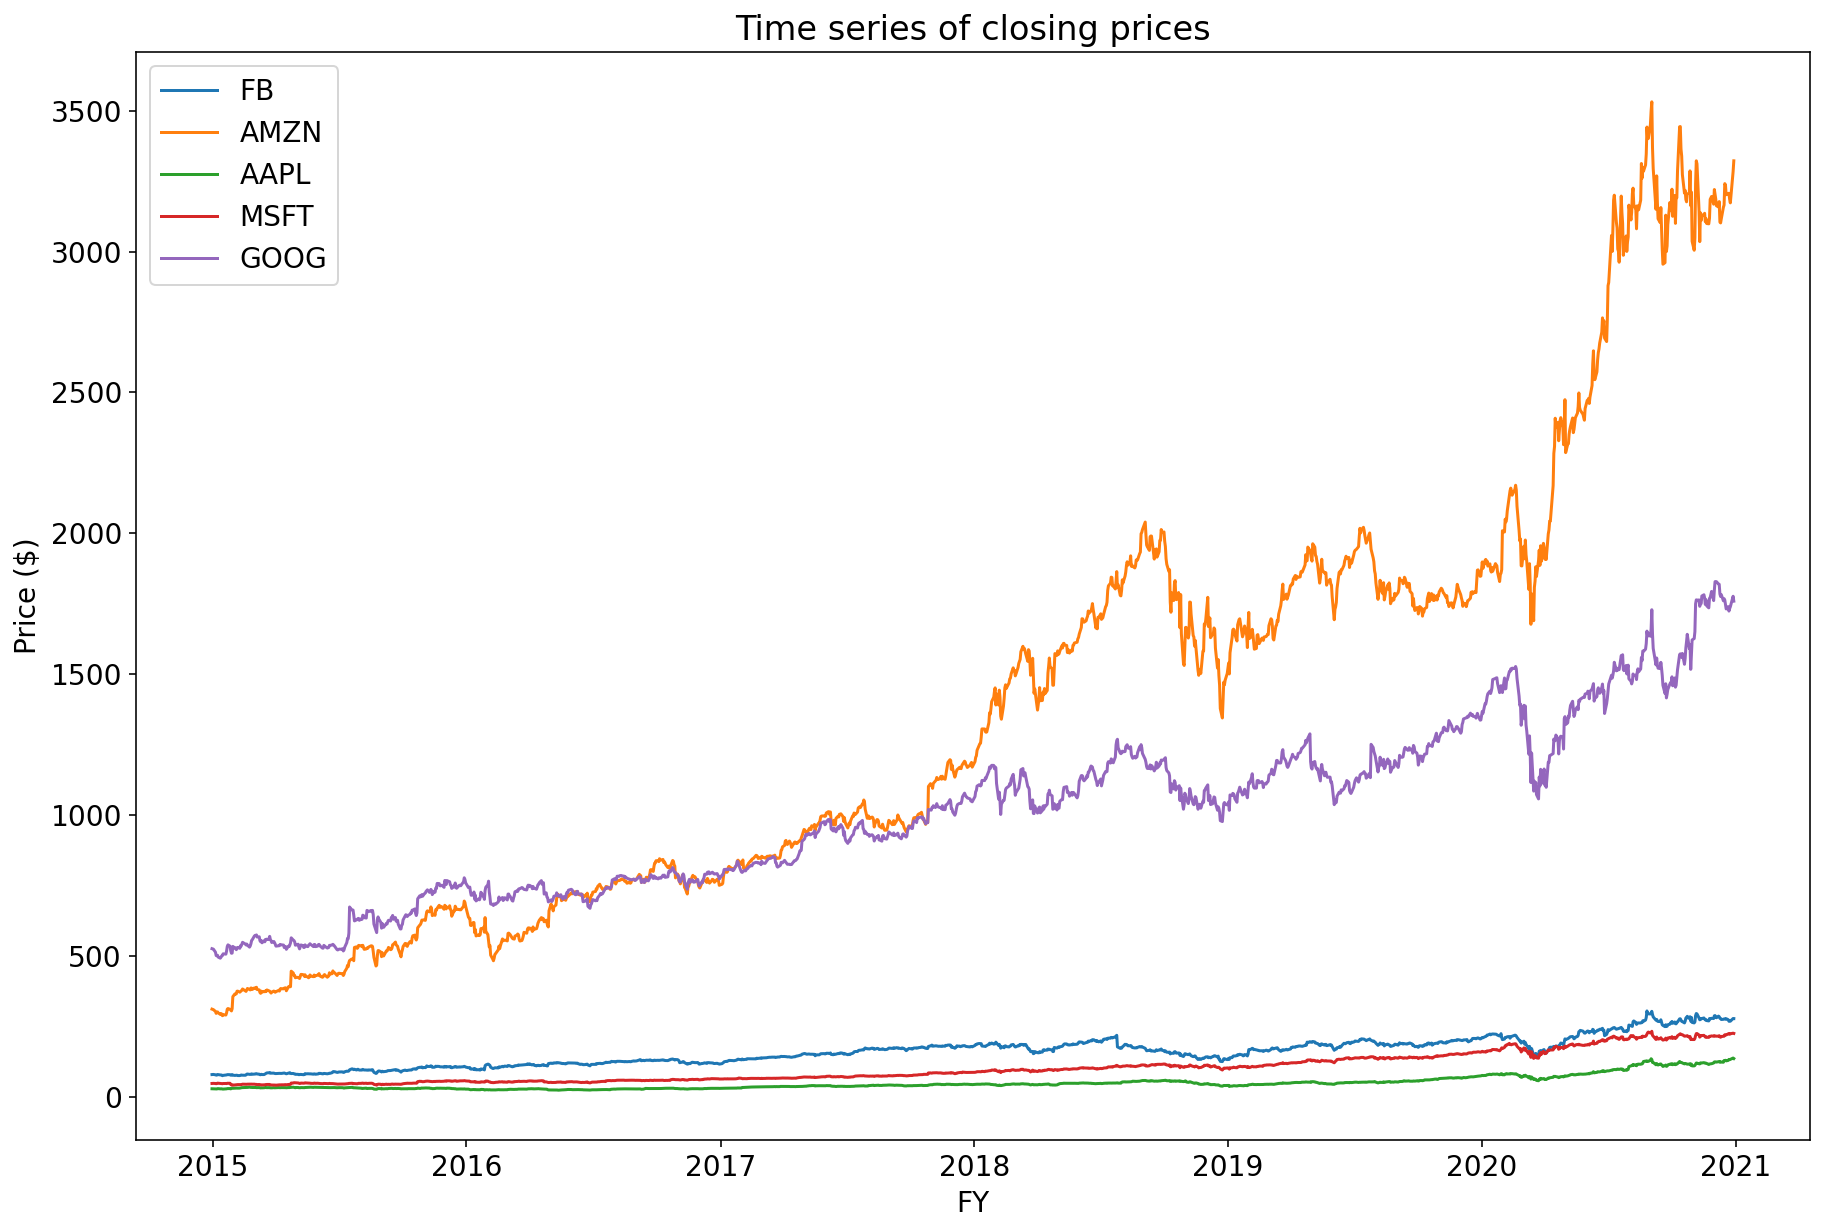

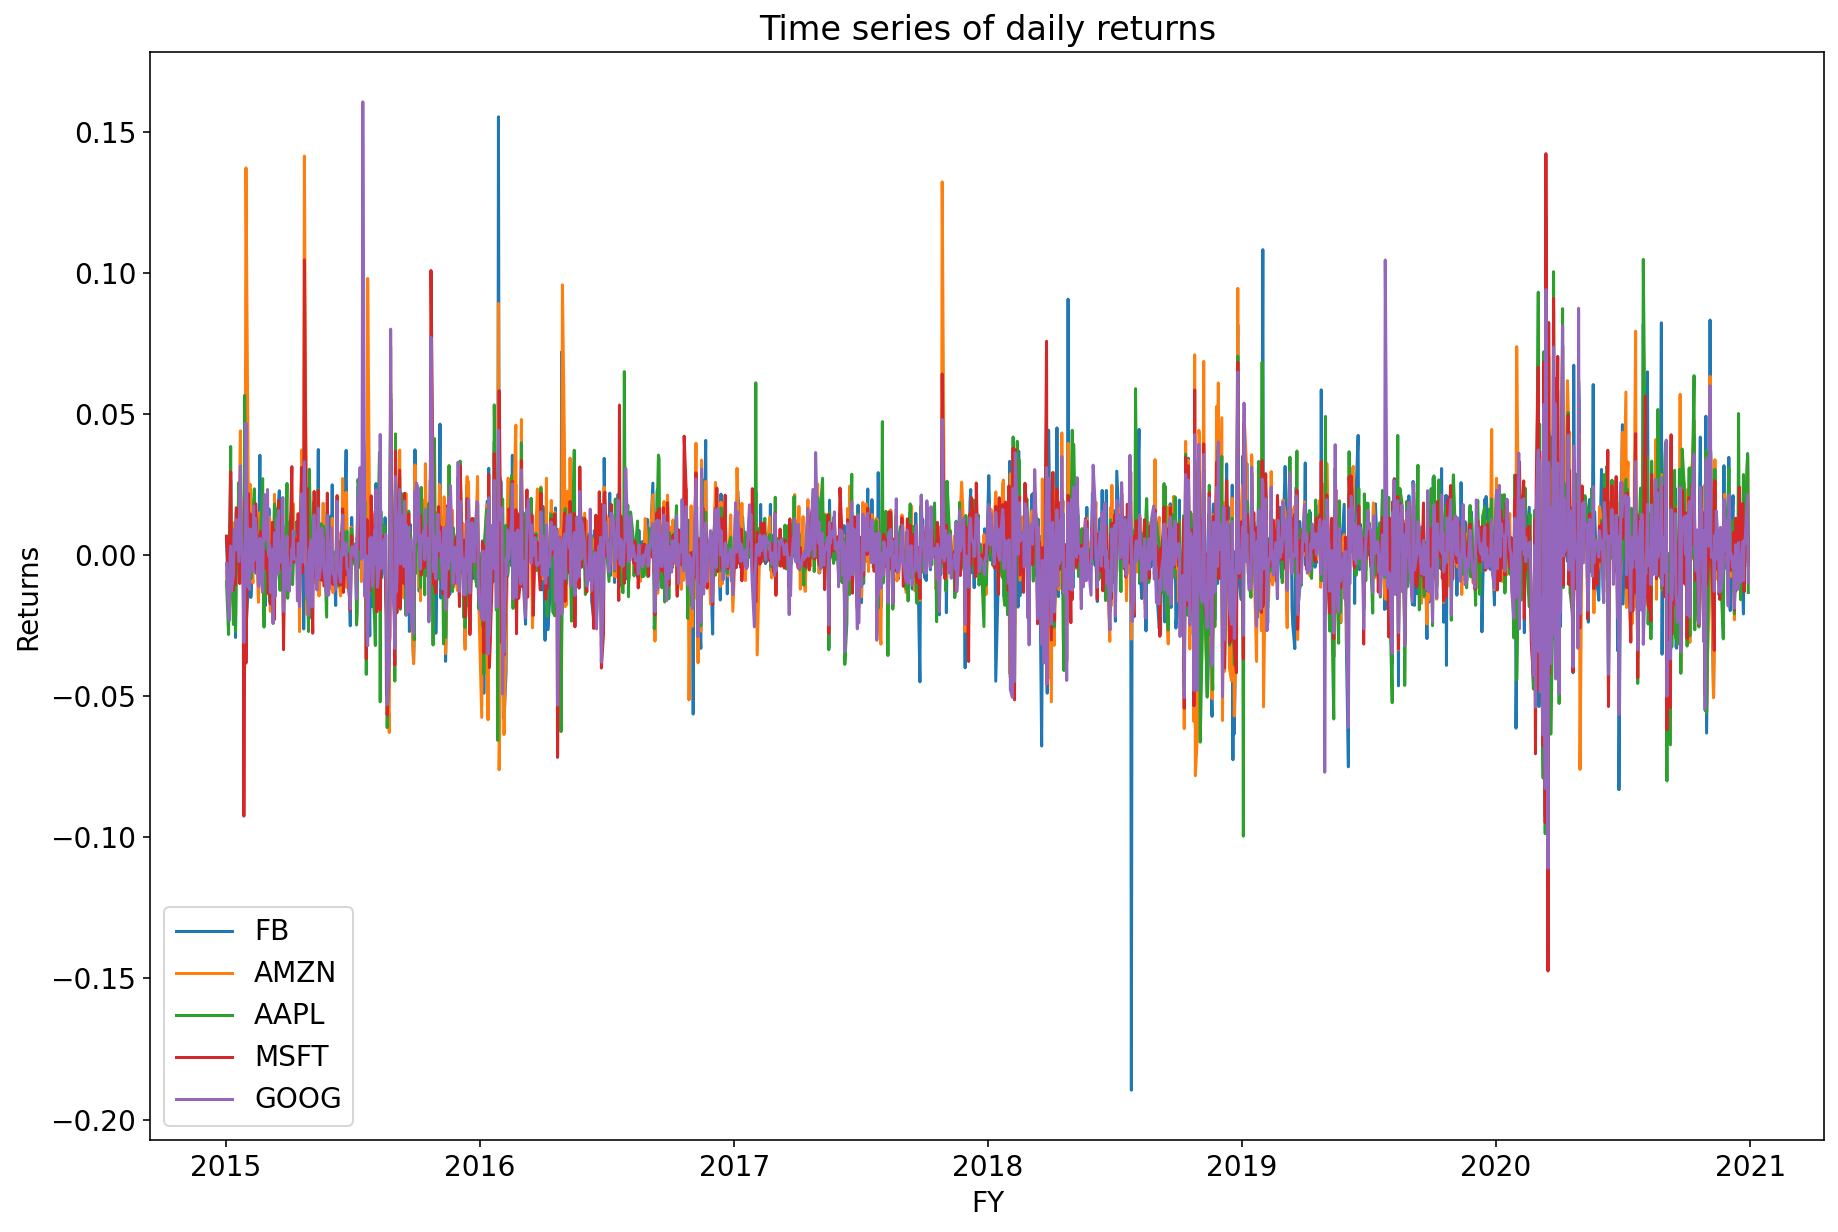

In [7]:
# Preparation
plt.rcParams['figure.figsize'] = [15, 10] 
plt.figure(1)
plt.rc('font', size=14) 
plt.xlabel("FY") 
plt.ylabel("Price ($)") 
plt.title('Time series of closing prices')
plt.figure(2)
plt.rc('font', size=14) 
plt.xlabel("FY") 
plt.ylabel("Returns") 
plt.title('Time series of daily returns')

# Plotting the data and describing properties
for stock in range(0, numberOfStocks):
  printHeader(stockNames[stock])
  print("\nClosing prices:\n{}\n\nReturns:\n{}\n".format(stockClose[stock].describe(),stockReturns[stock].describe()))
  plt.figure(1)
  plt.plot(stockClose[stock], label = stockNames[stock])
  plt.legend()
  plt.figure(2)
  plt.plot(stockReturns[stock], label = stockNames[stock])
  plt.legend()
del stock

**The important feature of returns is that it analyses purely the performance of each stock, regardlesss of price.** Such is an example with [Amazon](https://cliffcore.com/why-is-amazon-stock-so-expensive/#:~:text=the%20past%20decades.-,Why%20Is%20Amazon's%20Stock%20So%20Expensive%3F,total%20amount%20of%20shares%20outstanding.) and [Google](https://financhill.com/blog/investing/why-is-google-stock-so-expensive), which as can be seen are both priced rather high. Contrast this to Apple stock, which is [cheap](https://www.fool.com/investing/2018/01/25/the-real-reason-apple-inc-is-so-cheap-compared-to.aspx) in comparison, despite being one of the highest peforming tech companies in the world. Various other factors come into play, such as the company growth rate and how long it has been established.

## Statistical properties

A more thorough investigation of the statistical properties of the dataset will be conducted. This enables us to observe the characteristics and any possible correlations within the dataset, which may provide a possible explanation for any unforseen issues that may be encountered later on.

### Closing prices

──────────────────────────────────────────────────
FB
──────────────────────────────────────────────────
Closing price distribution:
Skewness: 0.4435596346314308
Q1 = 117.66250038146973
Q2 = 161.94499969482422
Q3 = 186.88000106811523


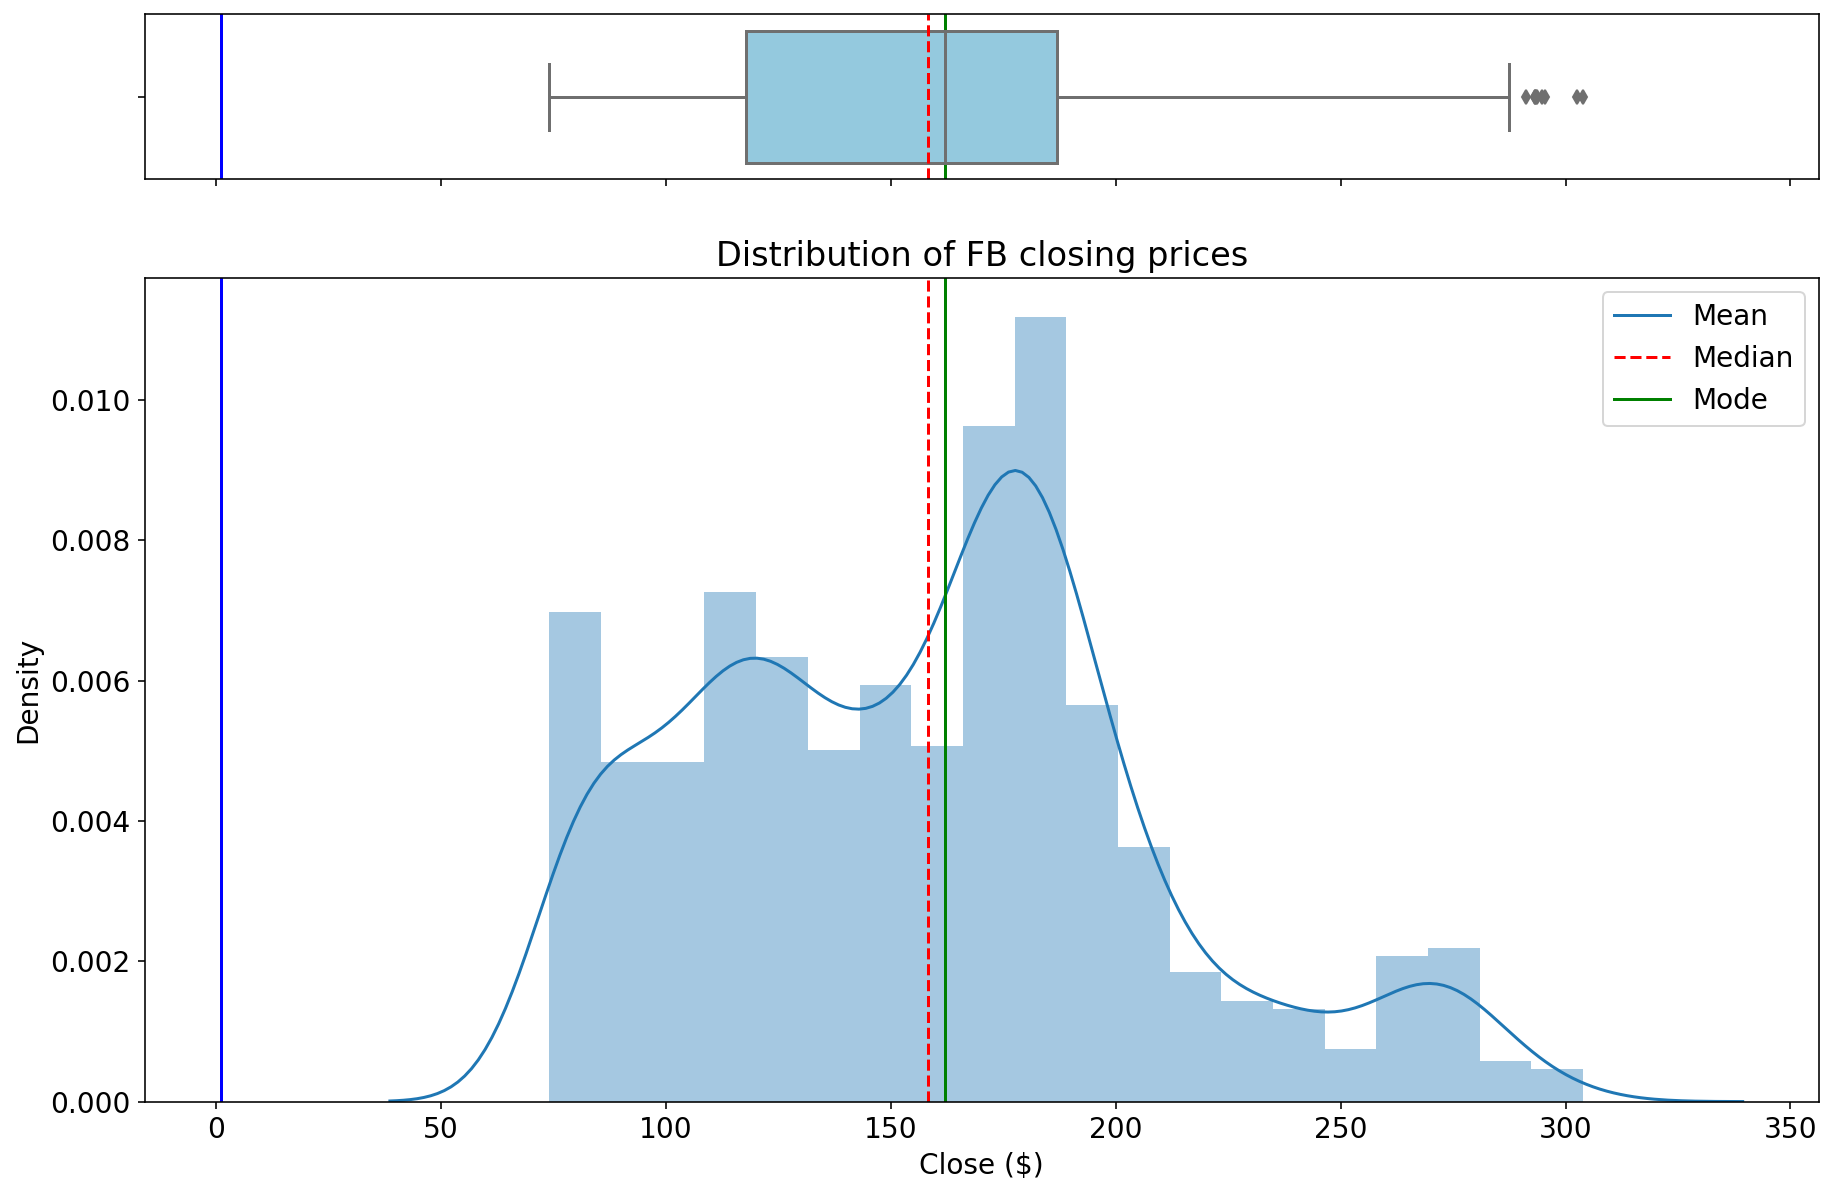

──────────────────────────────────────────────────
AMZN
──────────────────────────────────────────────────
Closing price distribution:
Skewness: 0.7723300591674832
Q1 = 726.9599914550781
Q2 = 1192.0899658203125
Q3 = 1827.3399658203125


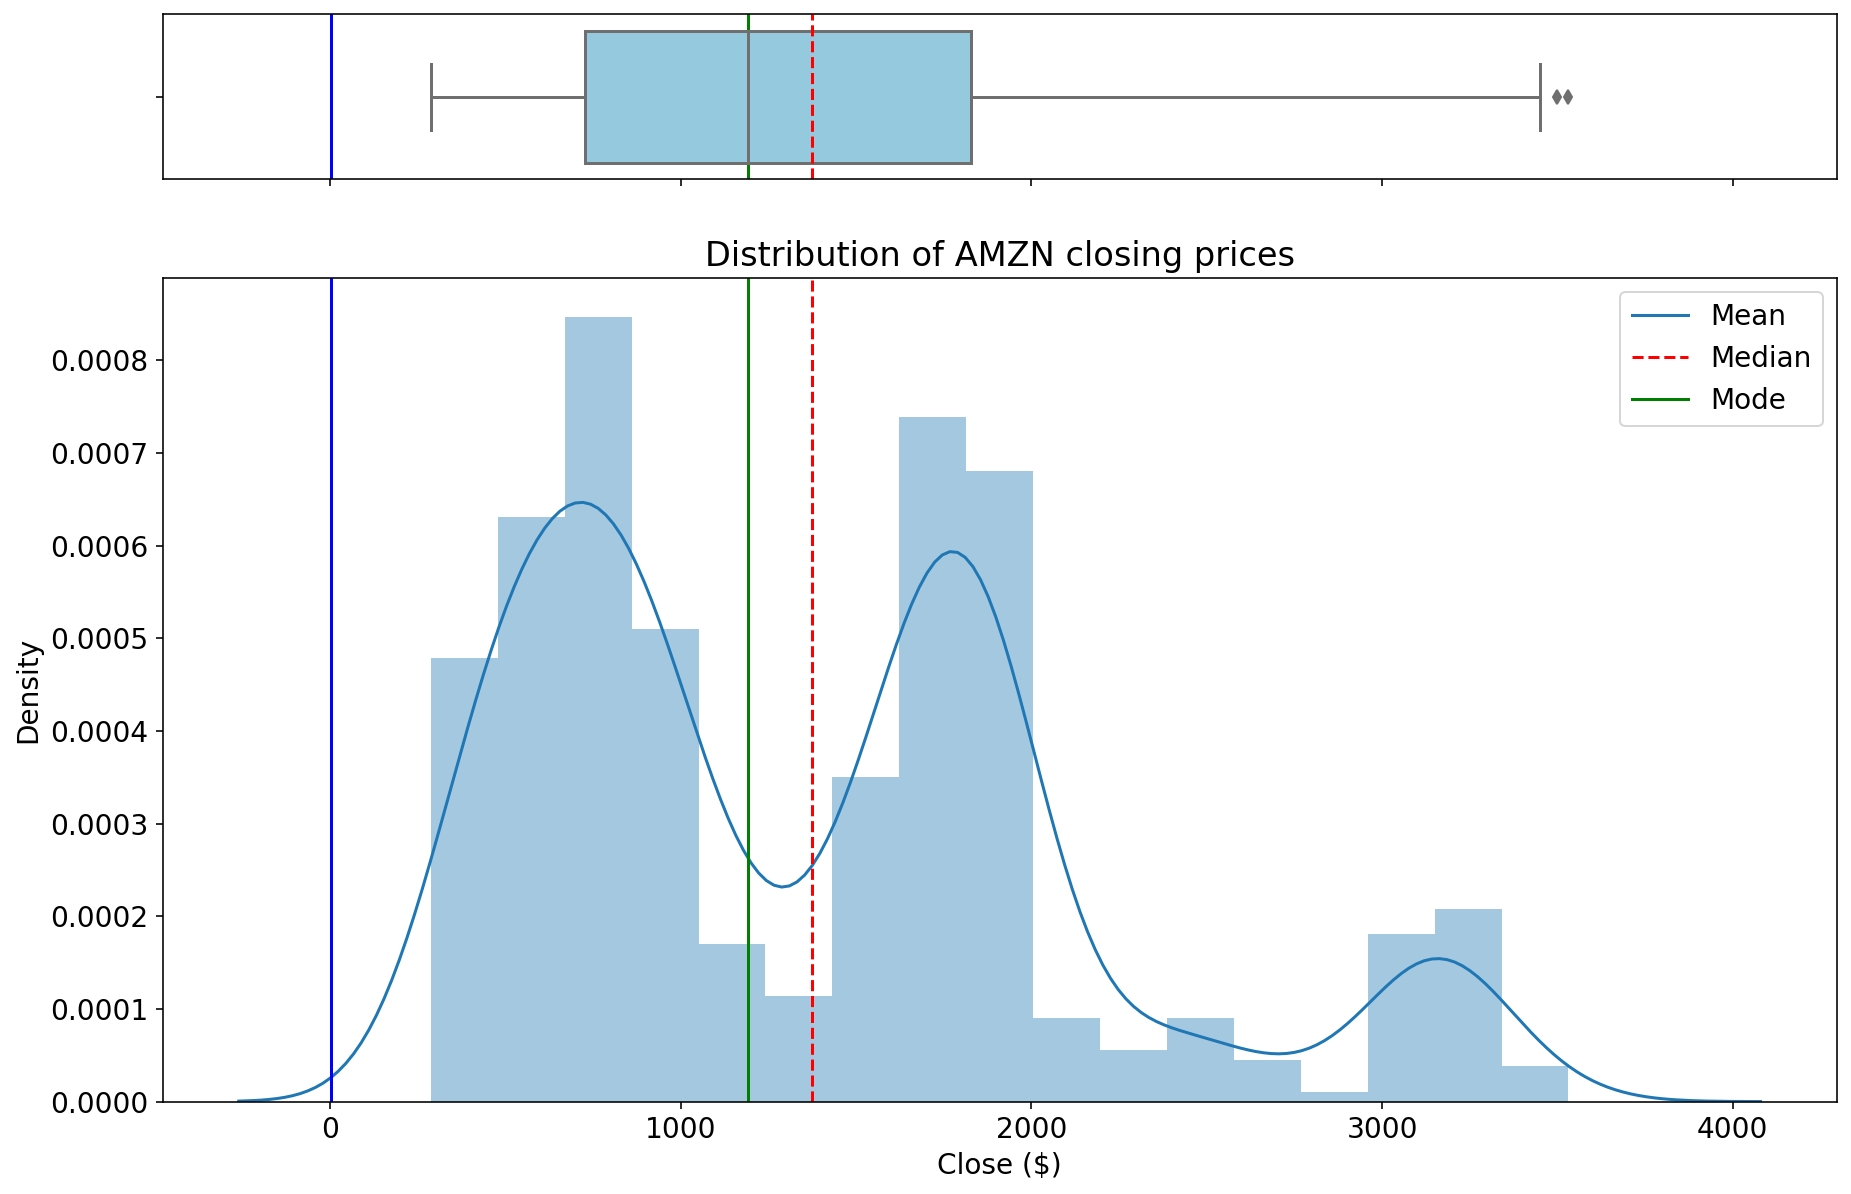

──────────────────────────────────────────────────
AAPL
──────────────────────────────────────────────────
Closing price distribution:
Skewness: 1.6567145698710477
Q1 = 29.786250114440918
Q2 = 41.31125068664551
Q3 = 53.84187602996826


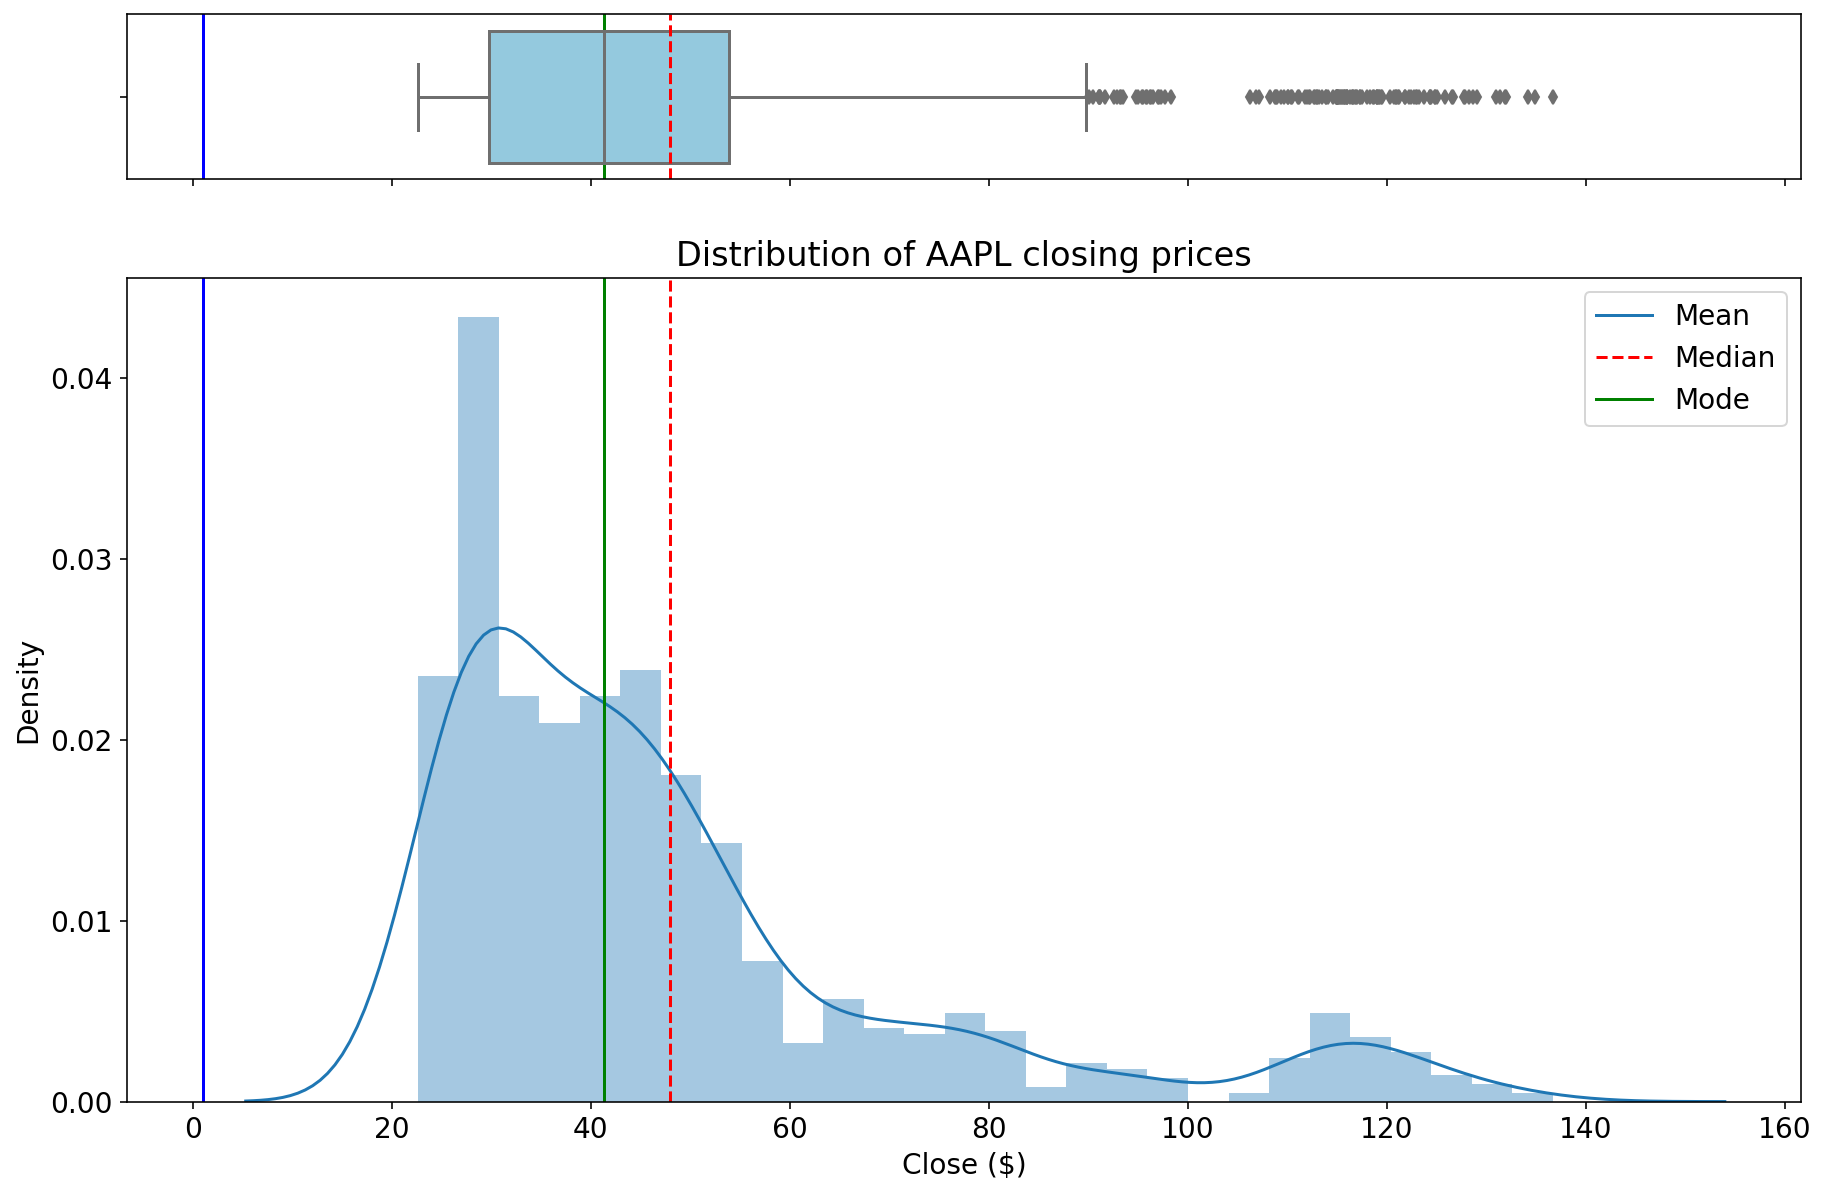

──────────────────────────────────────────────────
MSFT
──────────────────────────────────────────────────
Closing price distribution:
Skewness: 0.8798879056659725
Q1 = 55.67749881744385
Q2 = 85.88999938964844
Q3 = 135.0425033569336


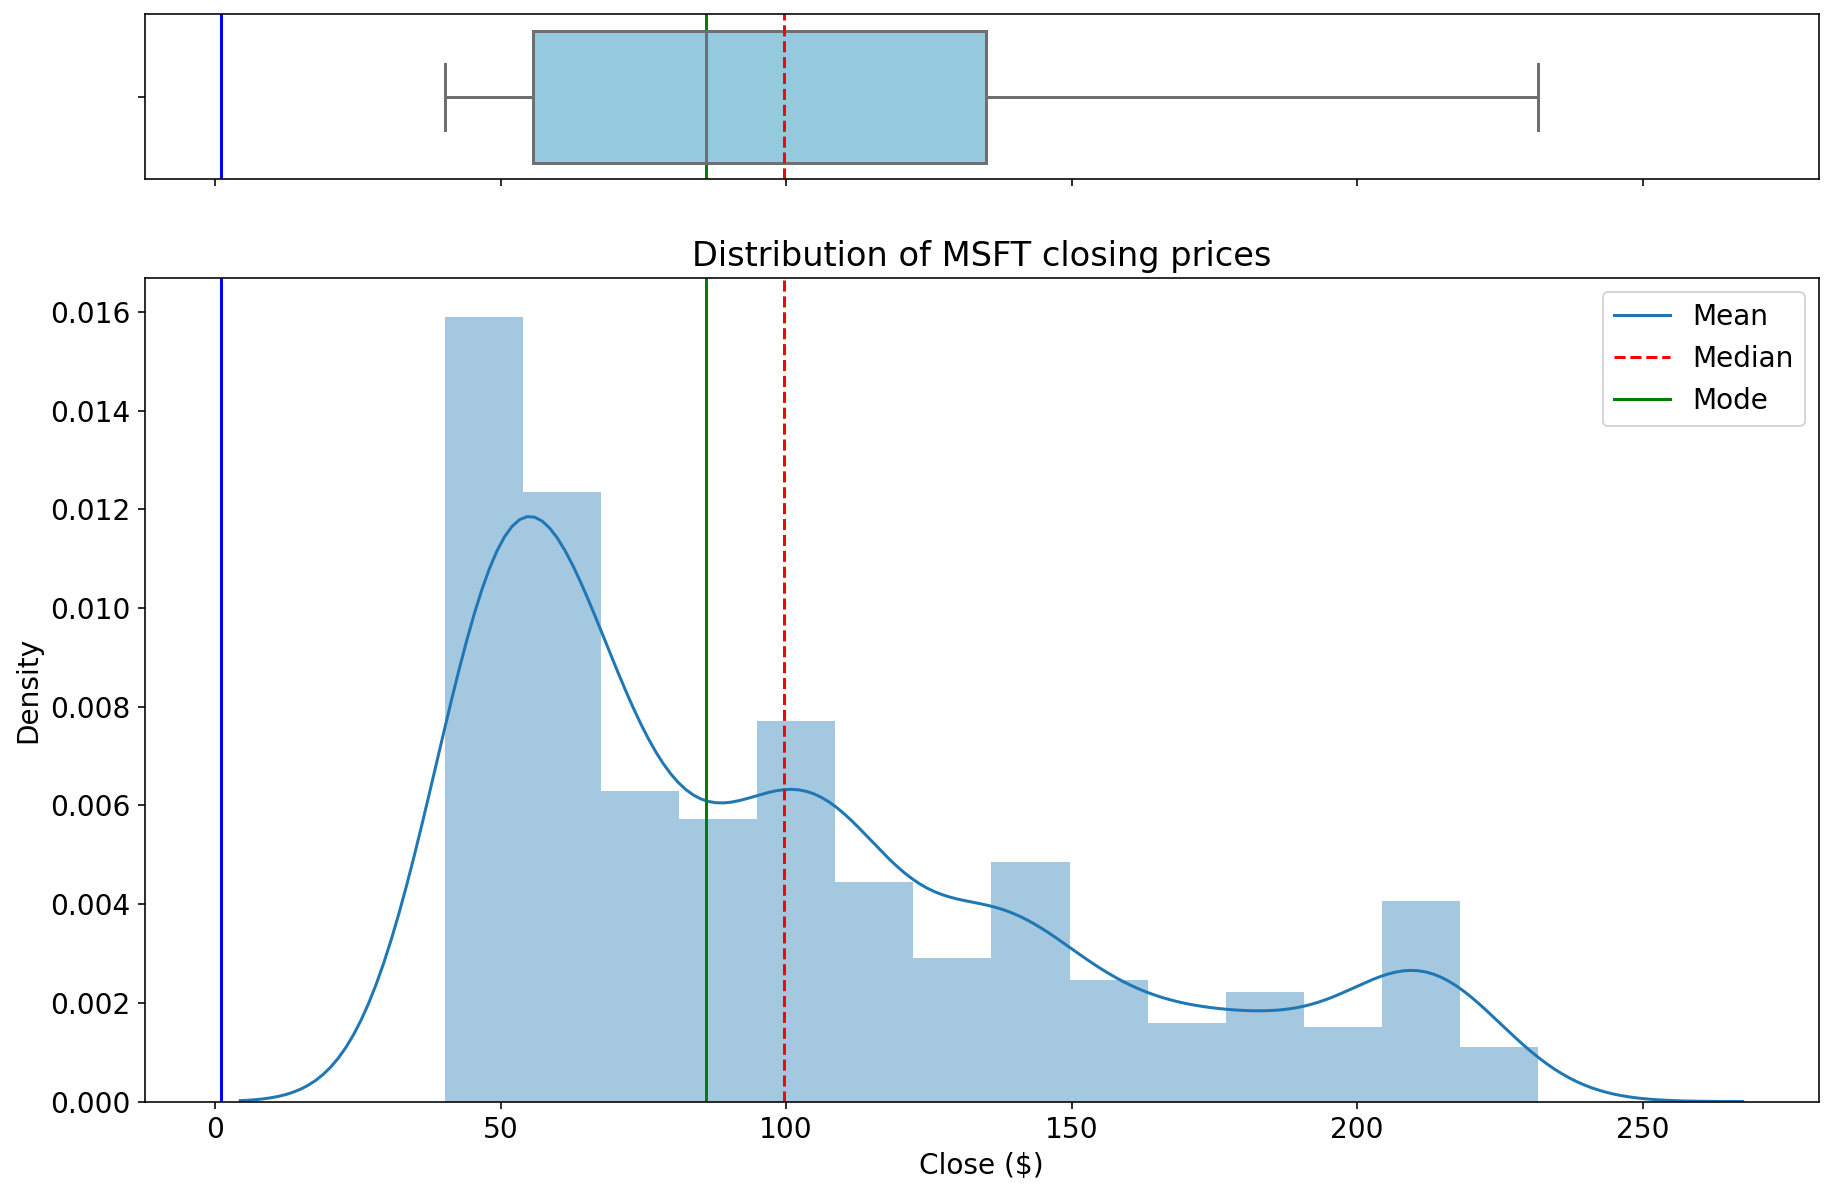

──────────────────────────────────────────────────
GOOG
──────────────────────────────────────────────────
Closing price distribution:
Skewness: 0.3669362824916819
Q1 = 751.6374816894531
Q2 = 1027.9400024414062
Q3 = 1195.7375183105469


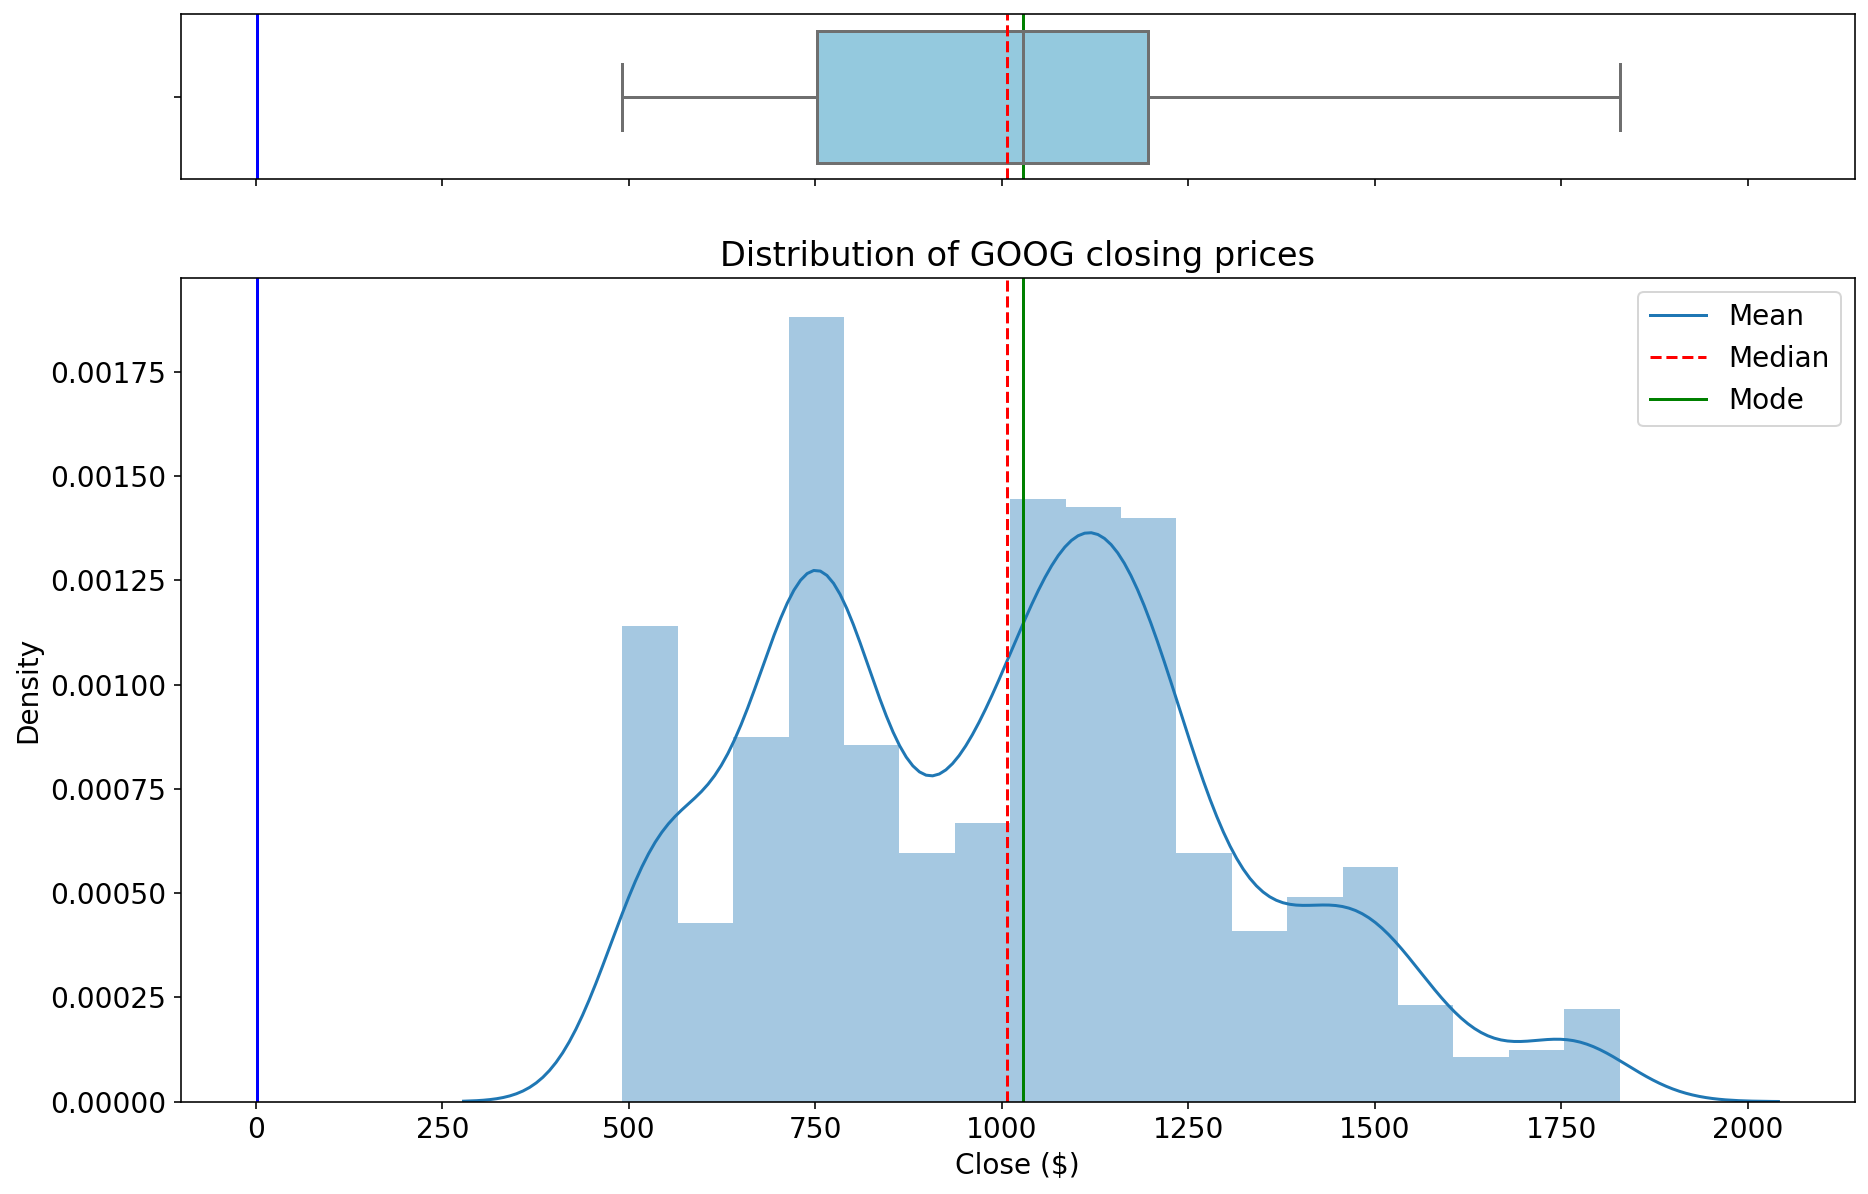

In [8]:
for stock in range(0, numberOfStocks):
  mean = stockClose[stock].mean()
  median = stockClose[stock].median()
  mode = stockClose[stock].mode()[0]

  # Percentiles and skewness
  printHeader(stockNames[stock])
  print('Closing price distribution:\nSkewness: {}'.format(skew(stockClose[stock])))
  for q in range(1,4):
    print('Q{} = {}'.format(q, np.percentile(stockClose[stock], 25*q)))

  # Box plot
  plt.rcParams['figure.figsize'] = [15, 10] 
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})
  sns.boxplot(stockClose[stock], ax=ax_box,color='skyblue')
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle='-')
  ax_box.axvline(mode.any(), color='b', linestyle='-')

  # Plot the PDF
  sns.distplot(stockClose[stock], ax=ax_hist)
  ax_hist.axvline(mean, color='r', linestyle='--')
  ax_hist.axvline(median, color='g', linestyle='-')
  ax_hist.axvline(mode.any(), color='b', linestyle='-')

  # Prepare graphs
  plt.legend({'Mean':mean,'Median':median,'Mode':mode}) 
  ax_hist.set(xlabel='Close ($)') 
  ax_box.set(xlabel='') 
  plt.title("Distribution of {} closing prices".format(stockNames[stock]))
  plt.show() 
del mean, median, mode, stock

Let's get a better look at this data. We can also analyse the nominal return of a stock, which is the forward difference of daily closing prices. This is why we had to remove *NaN* entries earlier: because data would be used outside of our range (i.e. before dateStart) to calculate returns for our first few days!

### Returns

To get a better look at the data, we can analyse the nominal return of the stock closing prices. This is equivalent to the first-order differences of the closing prices, which will be important for ascertaining if the data is suitable for ARIMA modelling. 

──────────────────────────────────────────────────
FB
──────────────────────────────────────────────────
Closing price distribution:
Skewness: -0.3316383068476875
Q1 = -0.00743466758631961
Q2 = 0.0010854313708712482
Q3 = 0.01093955701233762


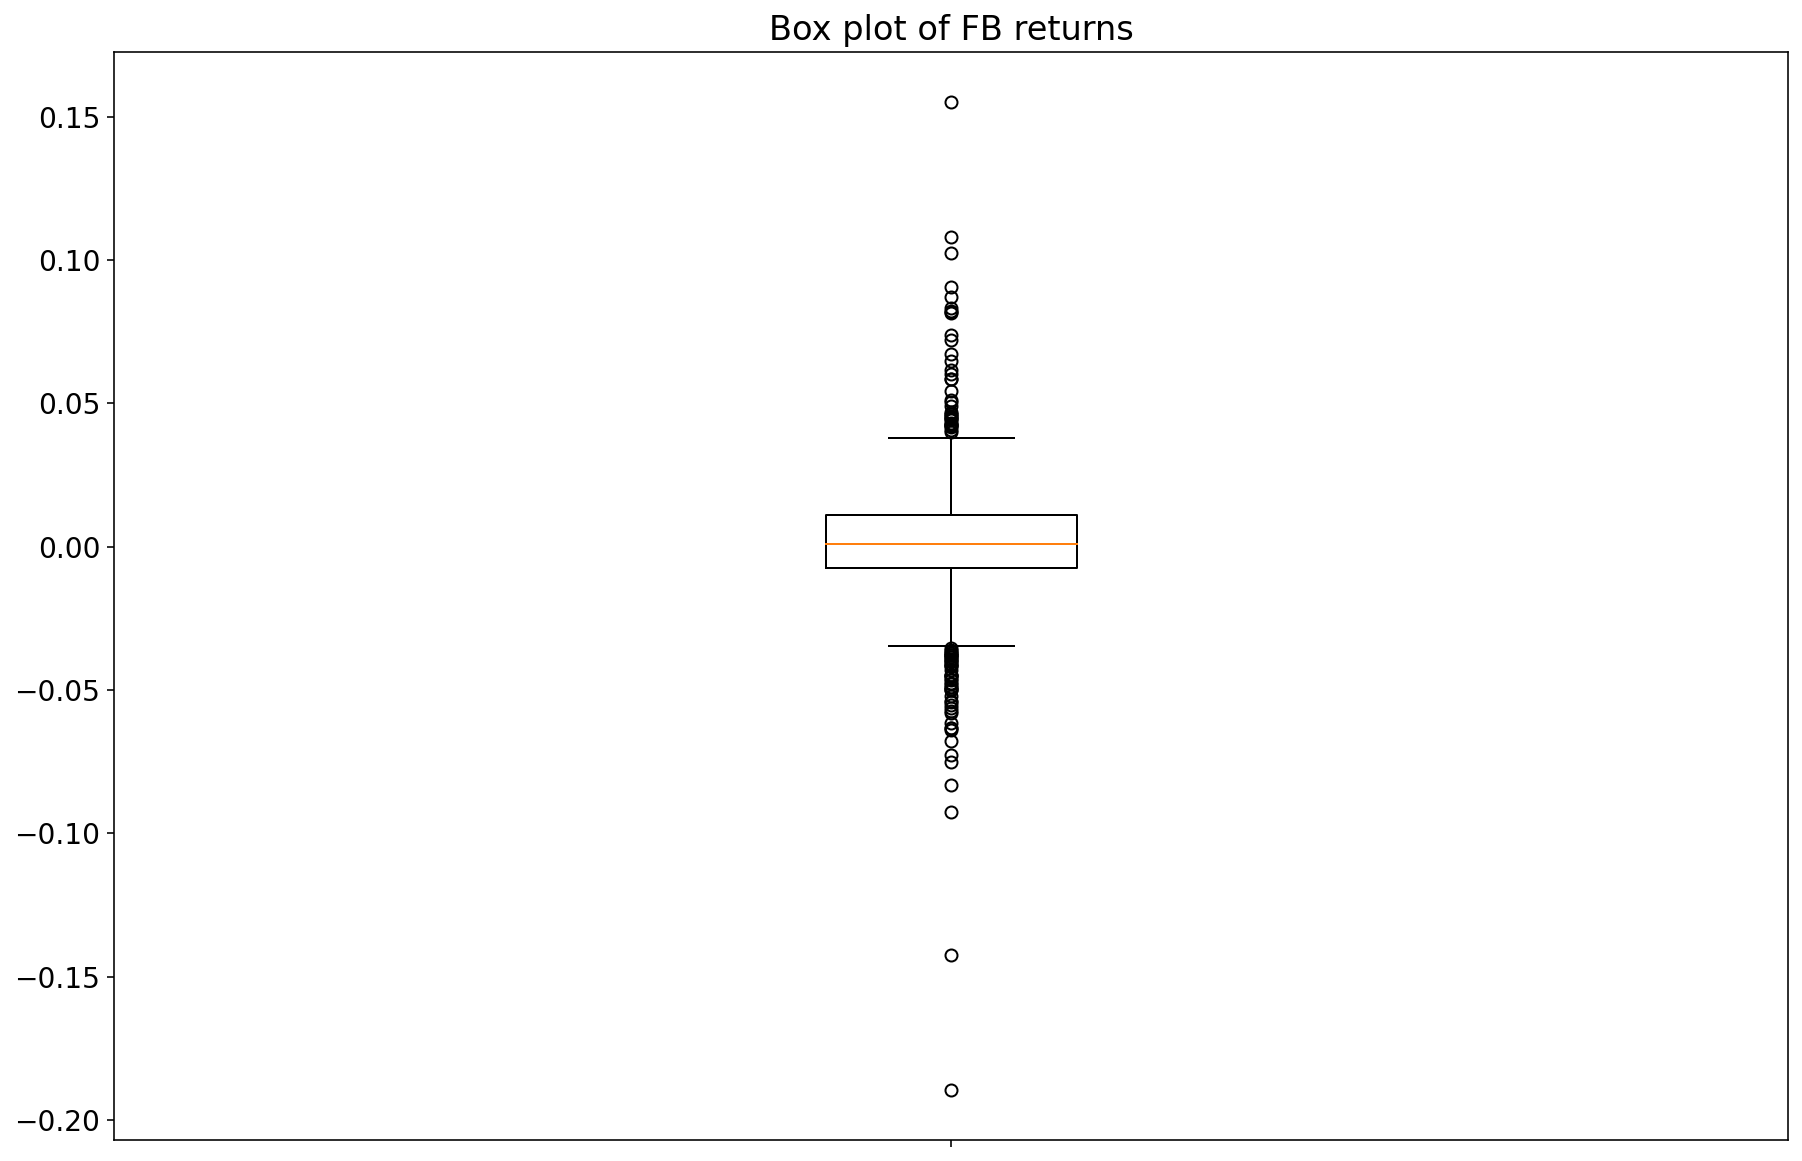

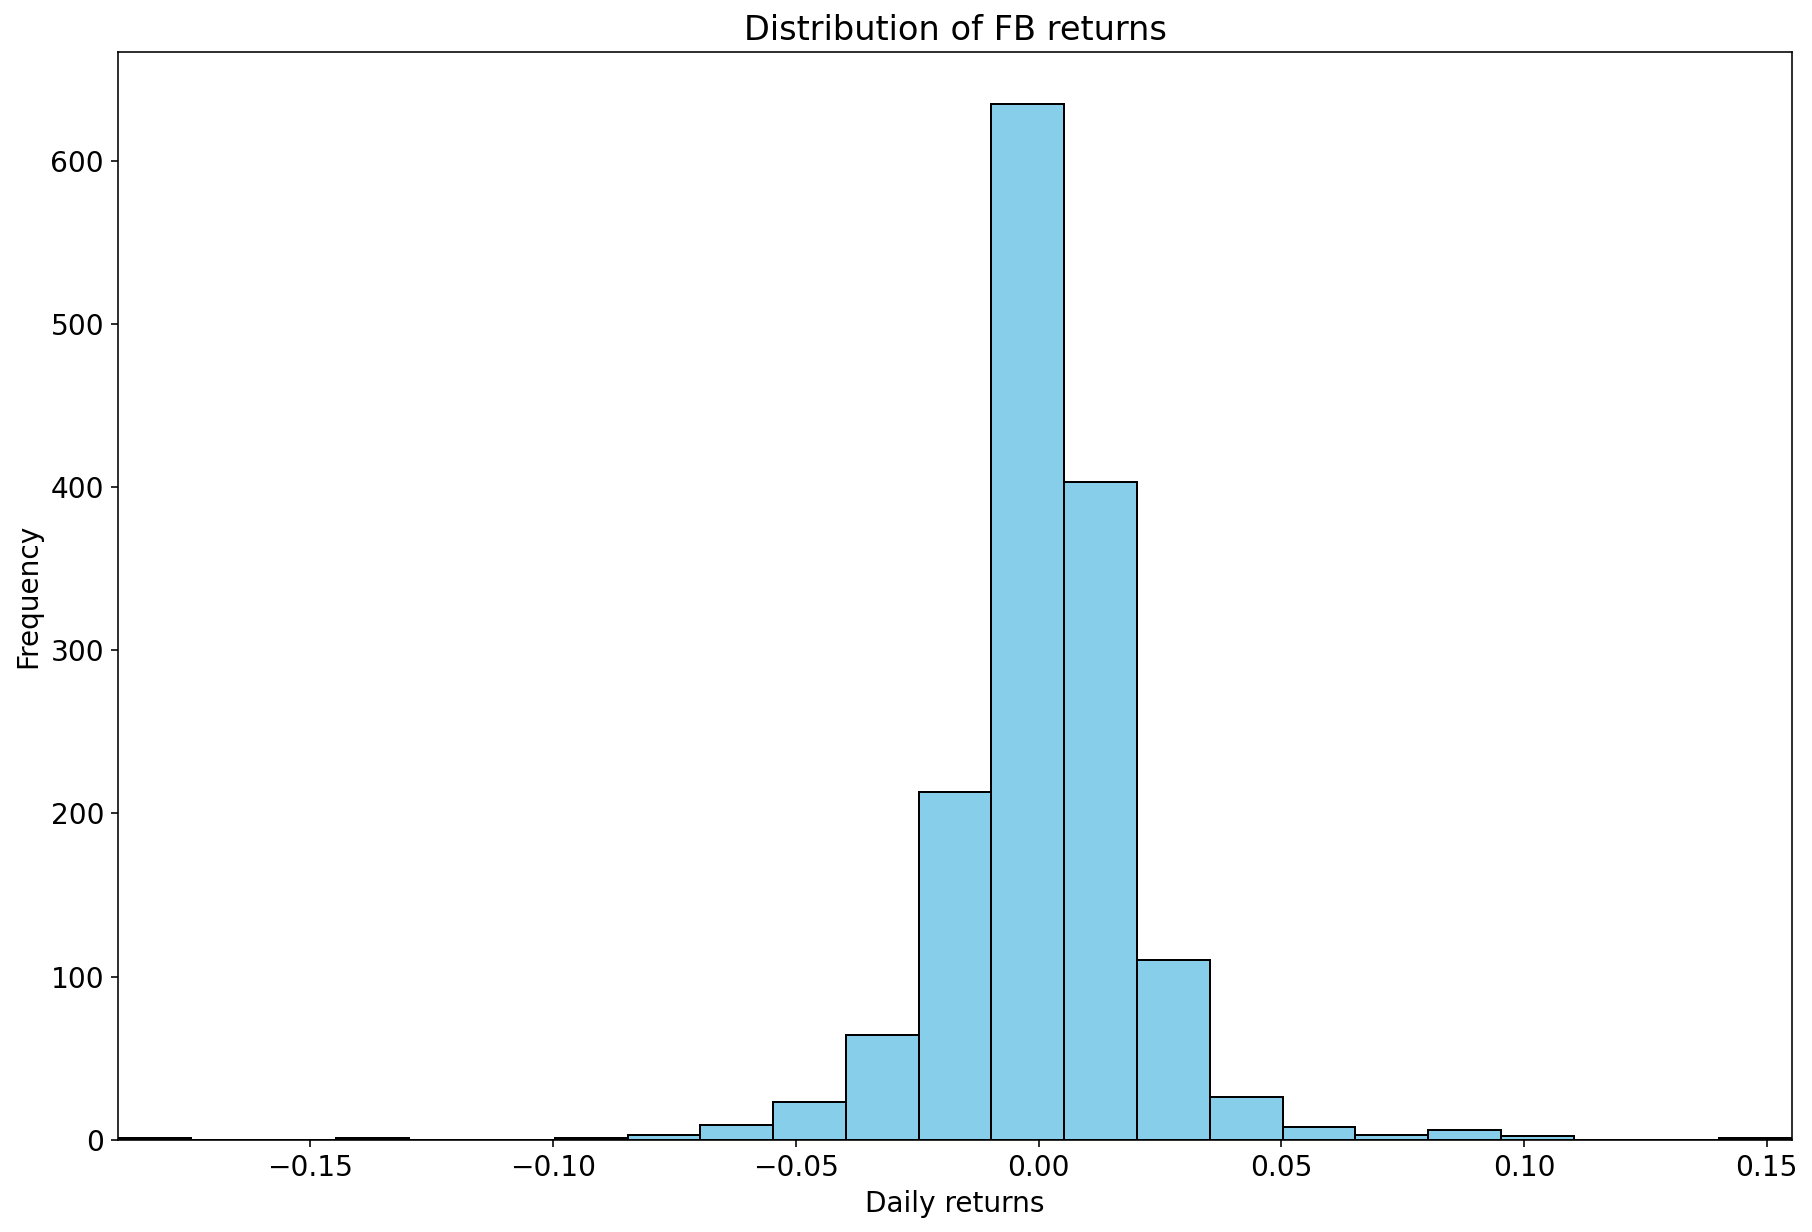

──────────────────────────────────────────────────
AMZN
──────────────────────────────────────────────────
Closing price distribution:
Skewness: 0.7585842949862543
Q1 = -0.00704830451795857
Q2 = 0.0013735967747601219
Q3 = 0.010787235038960619


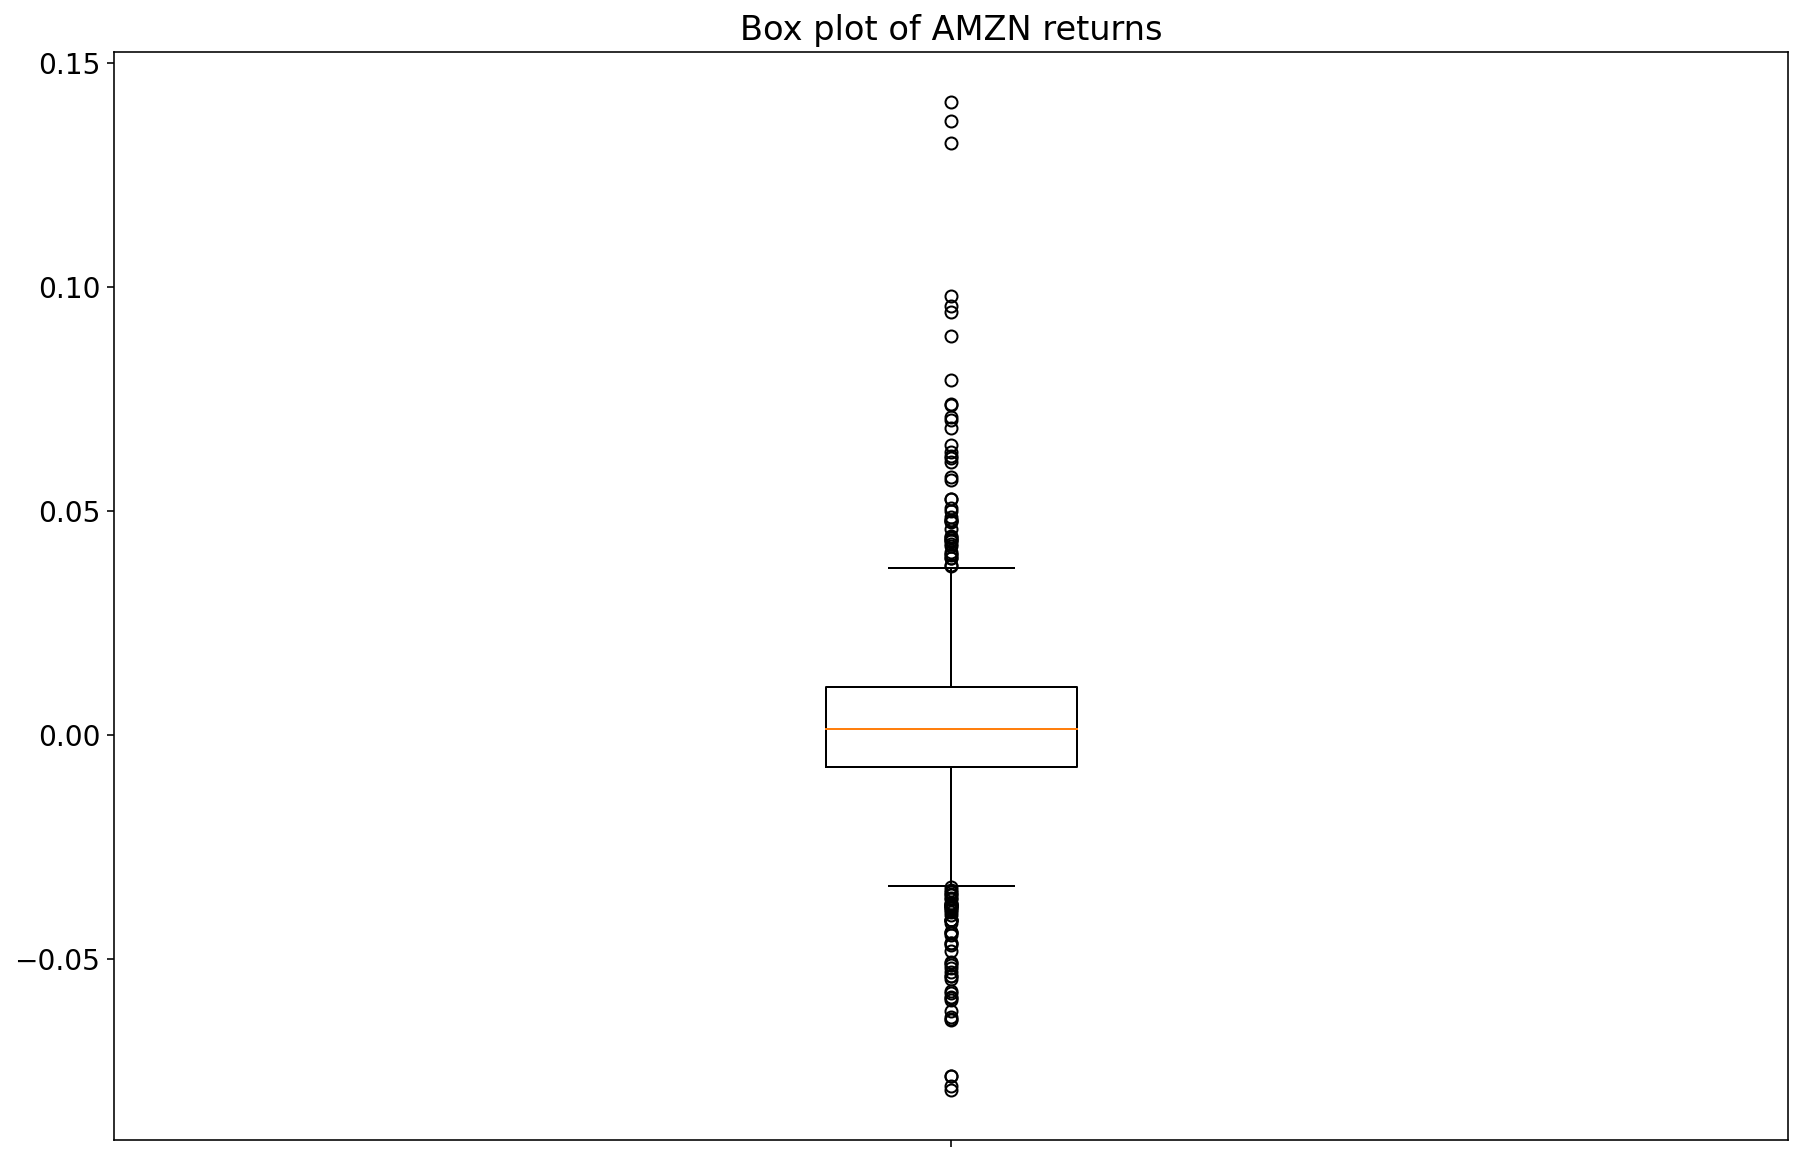

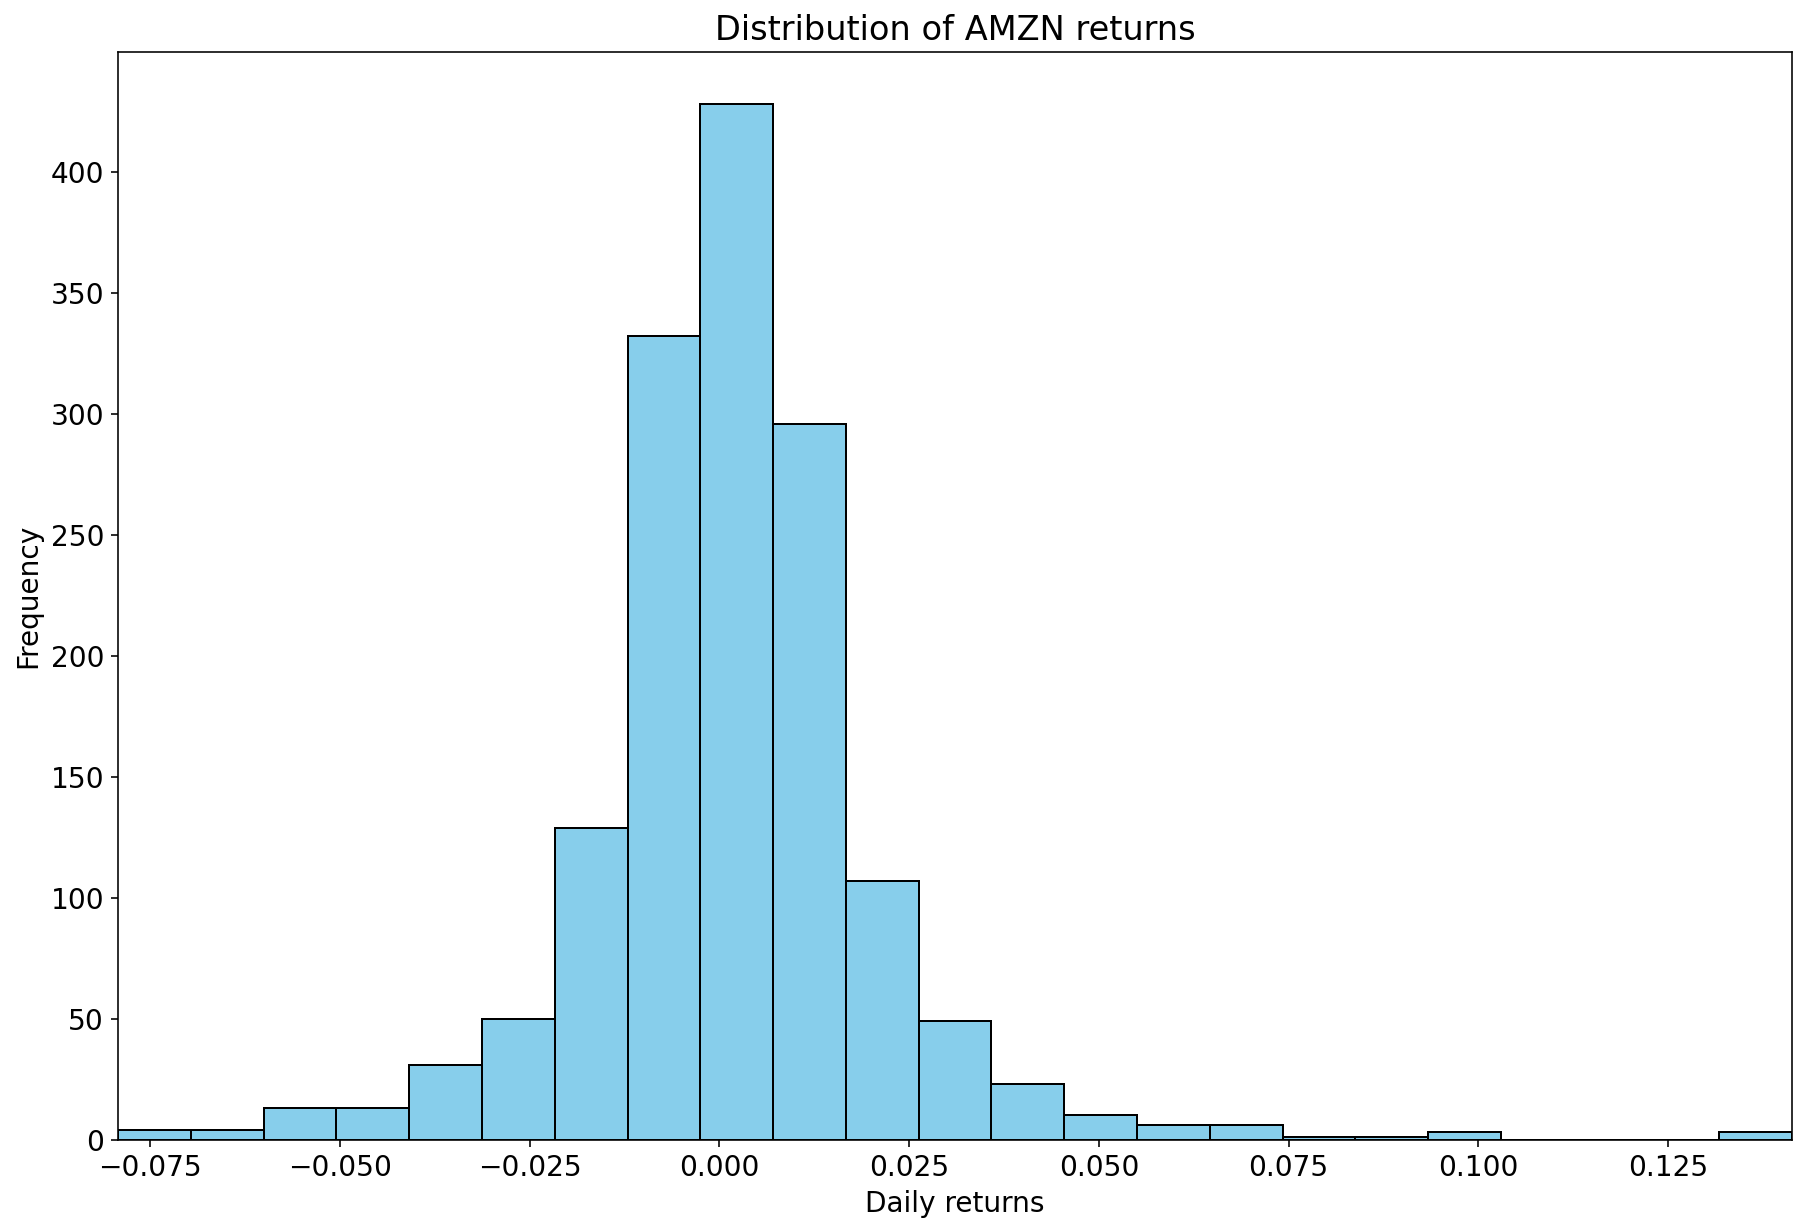

──────────────────────────────────────────────────
AAPL
──────────────────────────────────────────────────
Closing price distribution:
Skewness: -0.07661044145791895
Q1 = -0.006527662745079543
Q2 = 0.0008932908870358247
Q3 = 0.010017037887749991


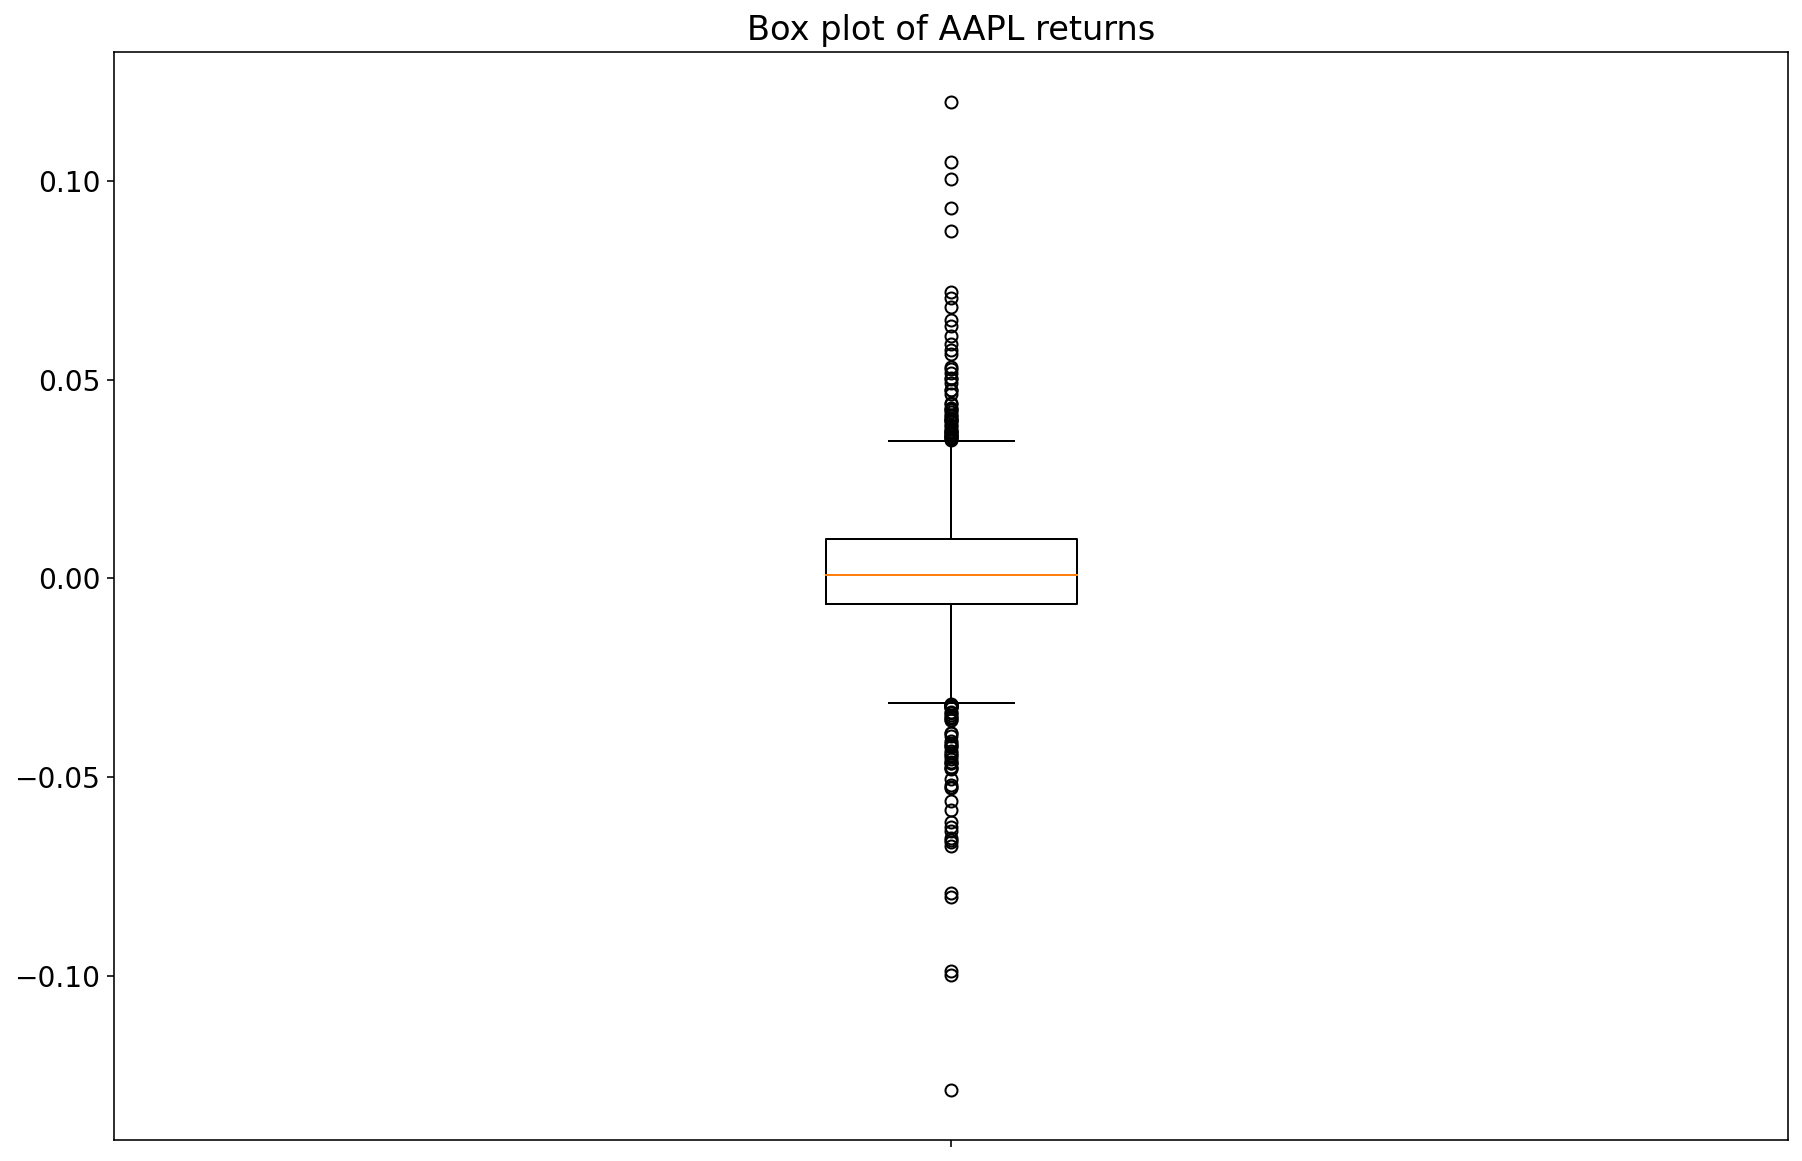

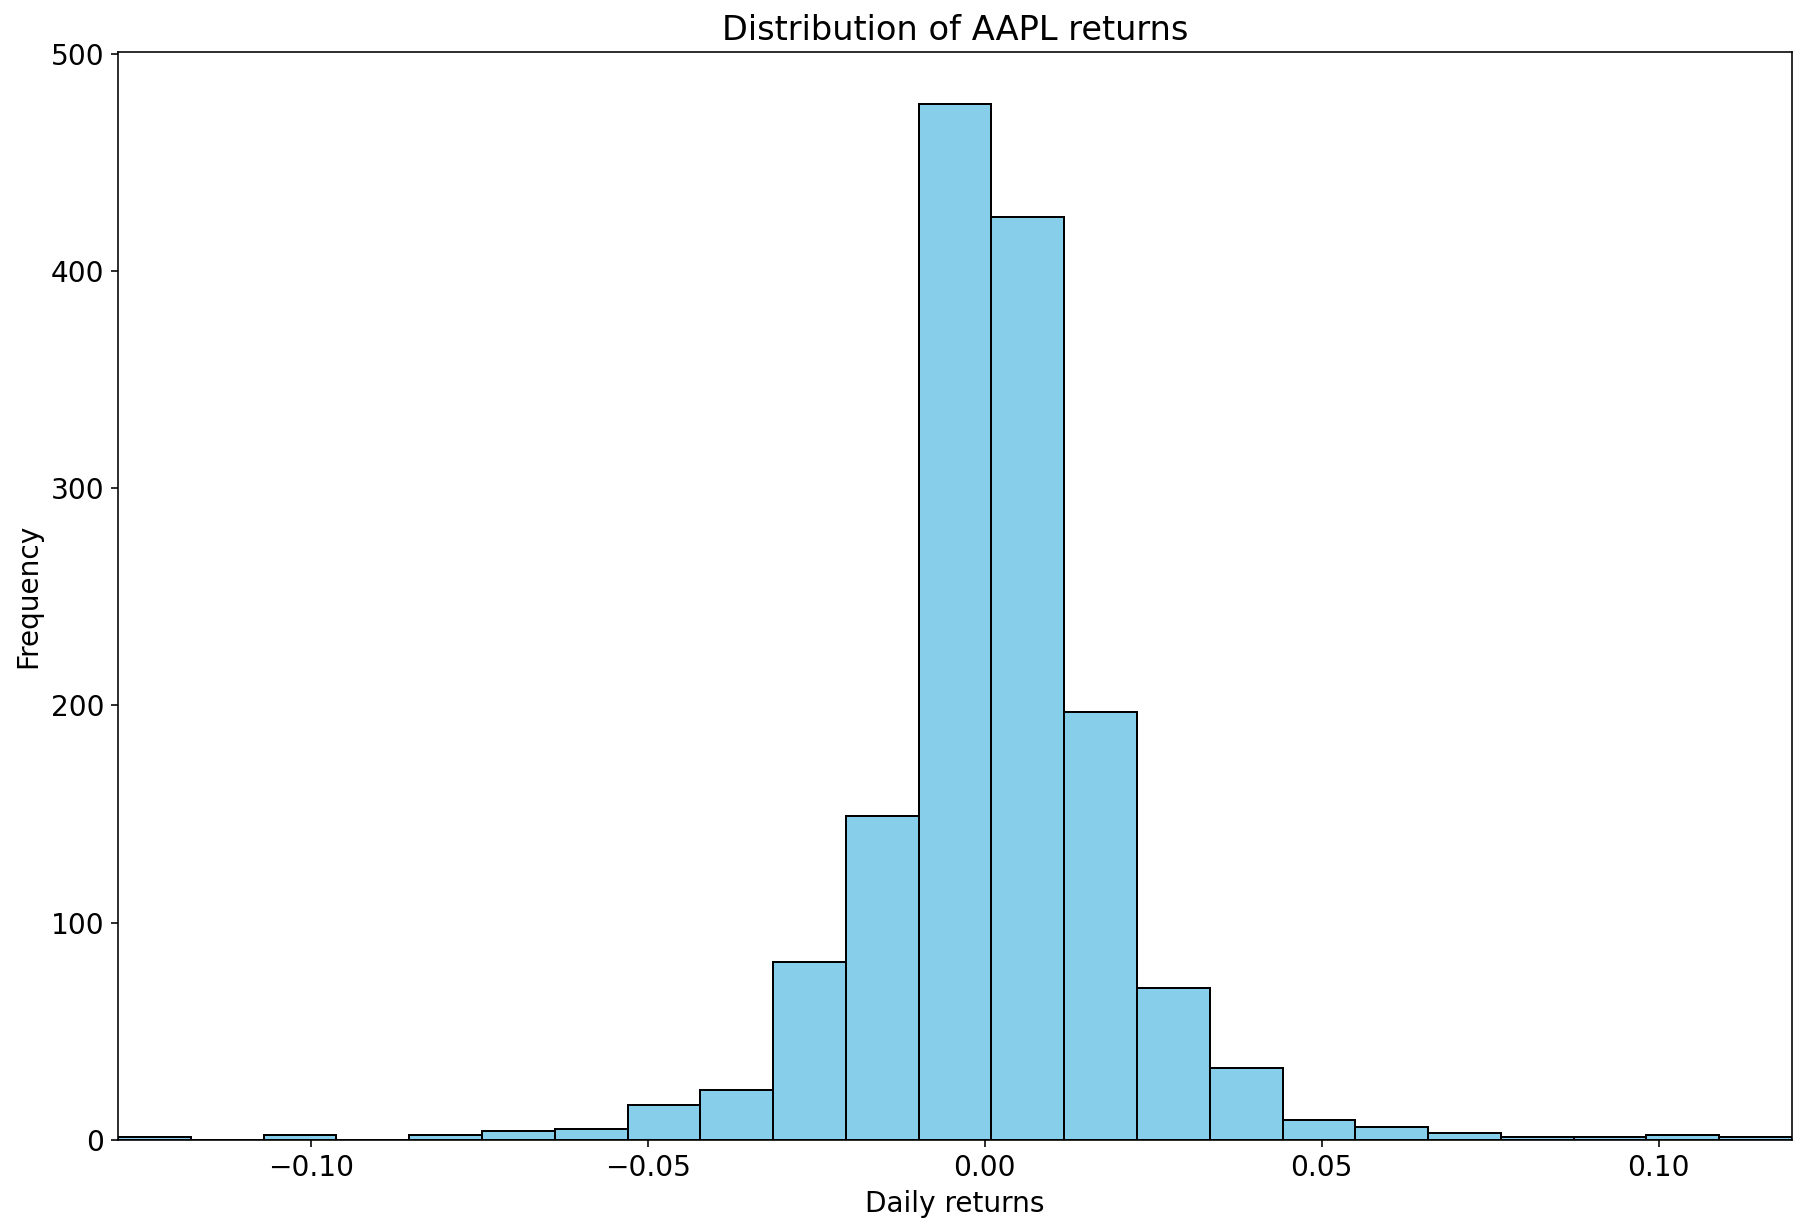

──────────────────────────────────────────────────
MSFT
──────────────────────────────────────────────────
Closing price distribution:
Skewness: 0.12420049220145266
Q1 = -0.006078221371958903
Q2 = 0.0009587032516726879
Q3 = 0.008926868752231032


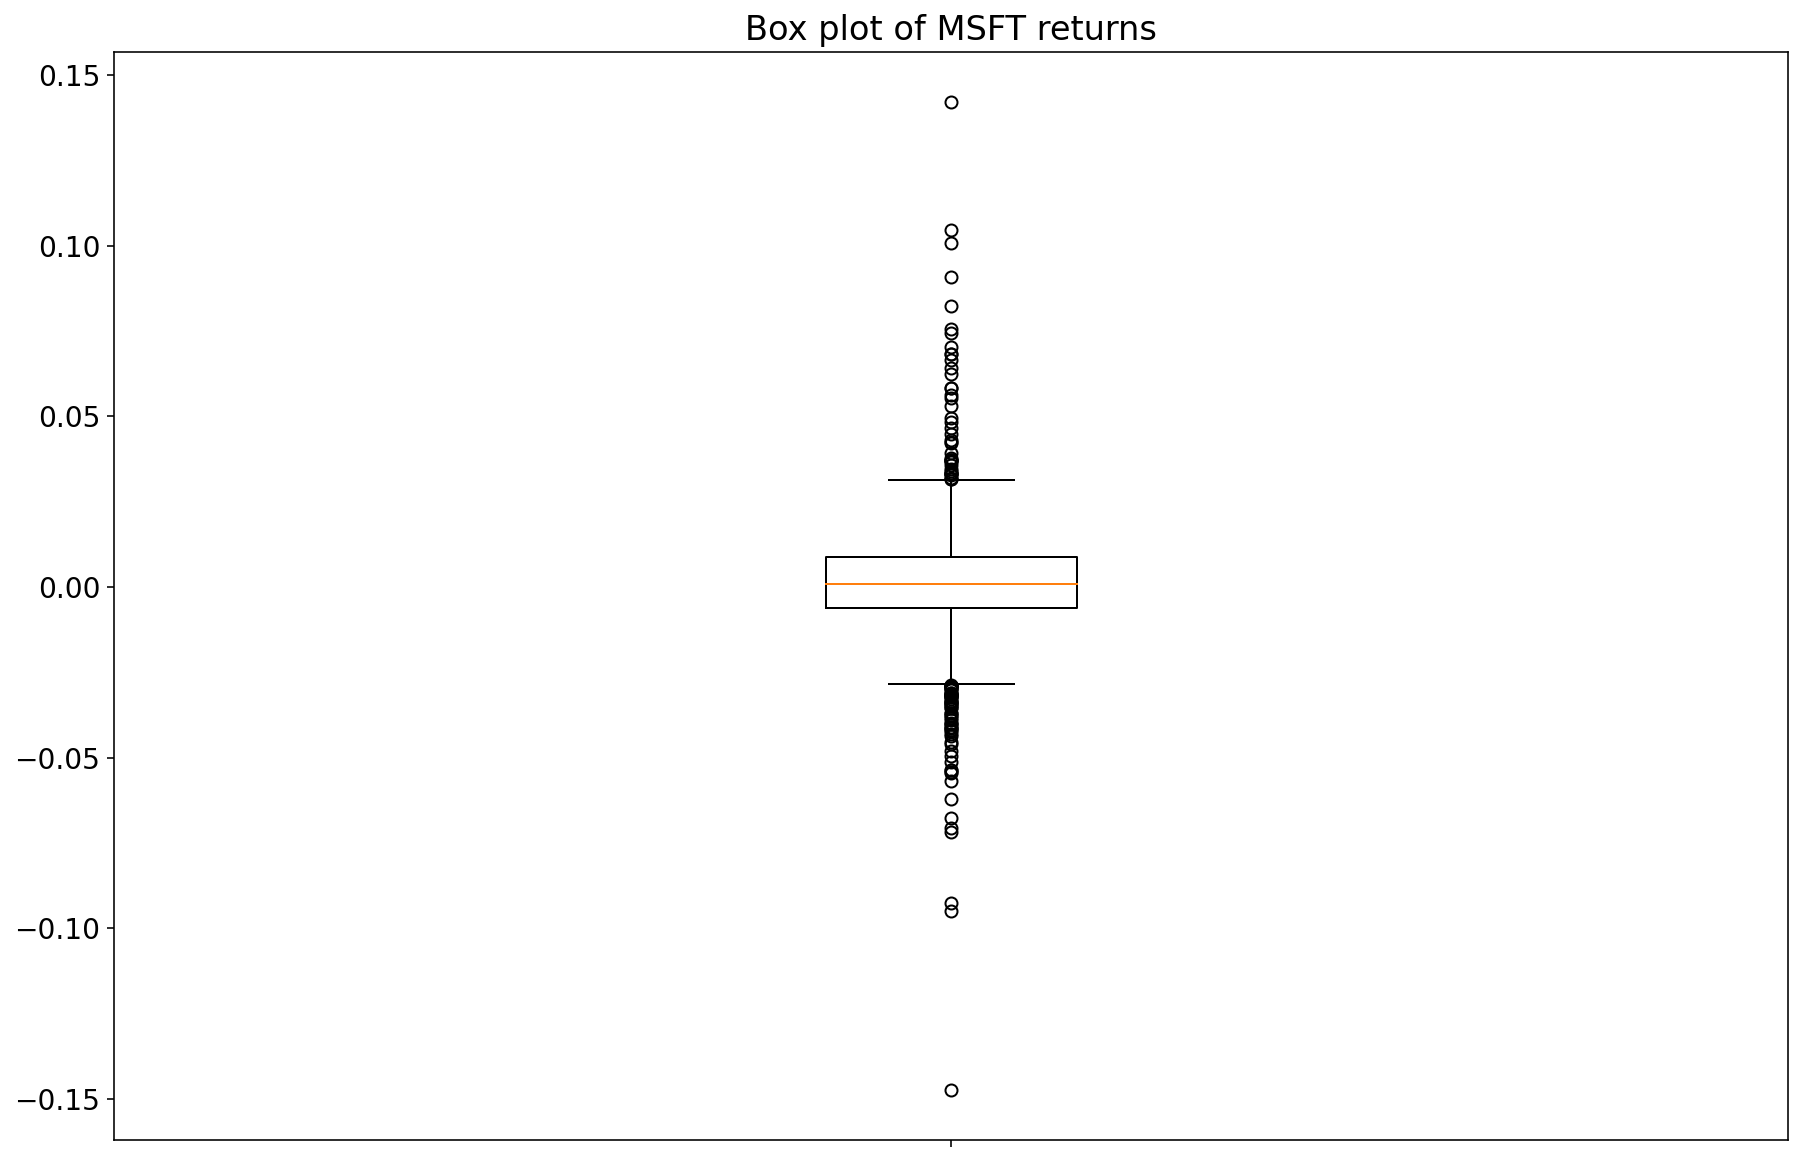

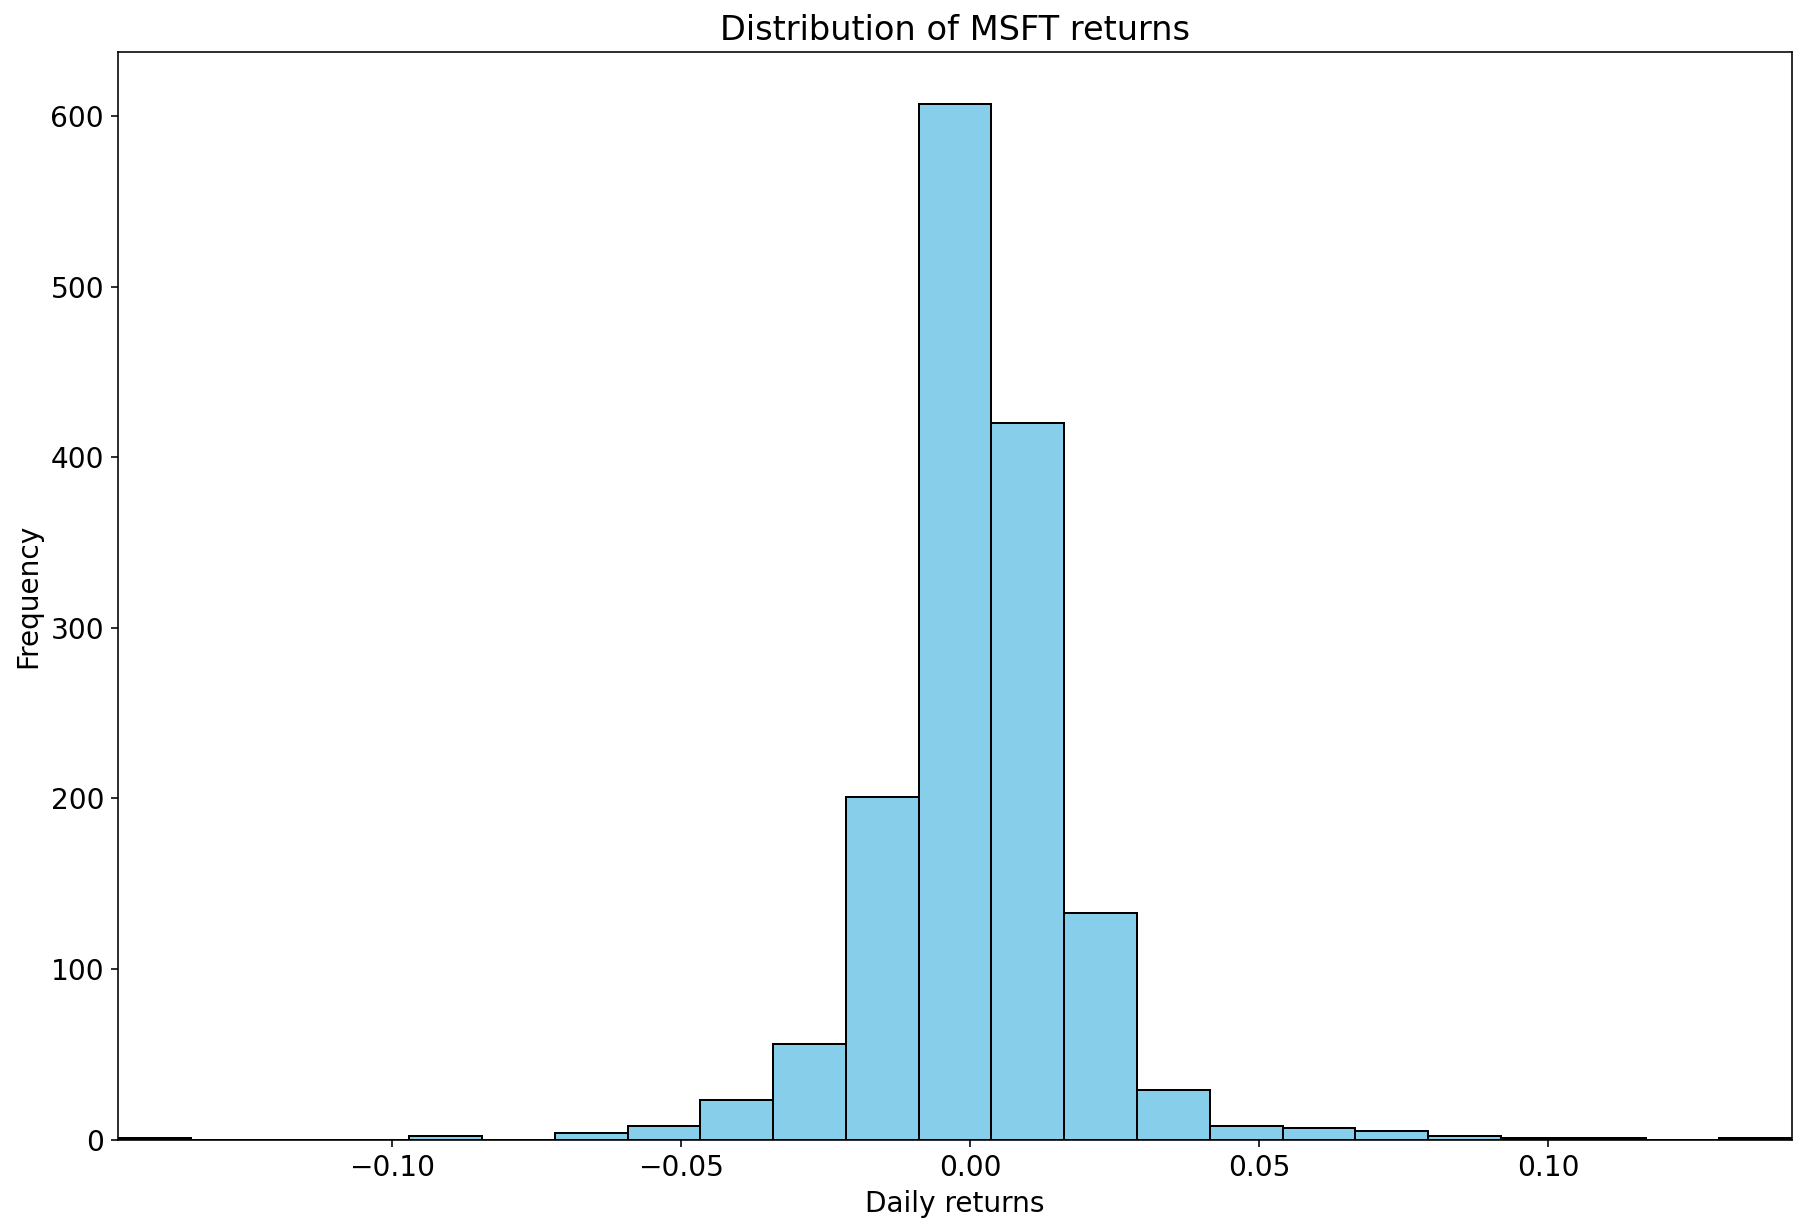

──────────────────────────────────────────────────
GOOG
──────────────────────────────────────────────────
Closing price distribution:
Skewness: 0.5168344263577908
Q1 = -0.006170410682982741
Q2 = 0.0009666538707406858
Q3 = 0.008858322682012032


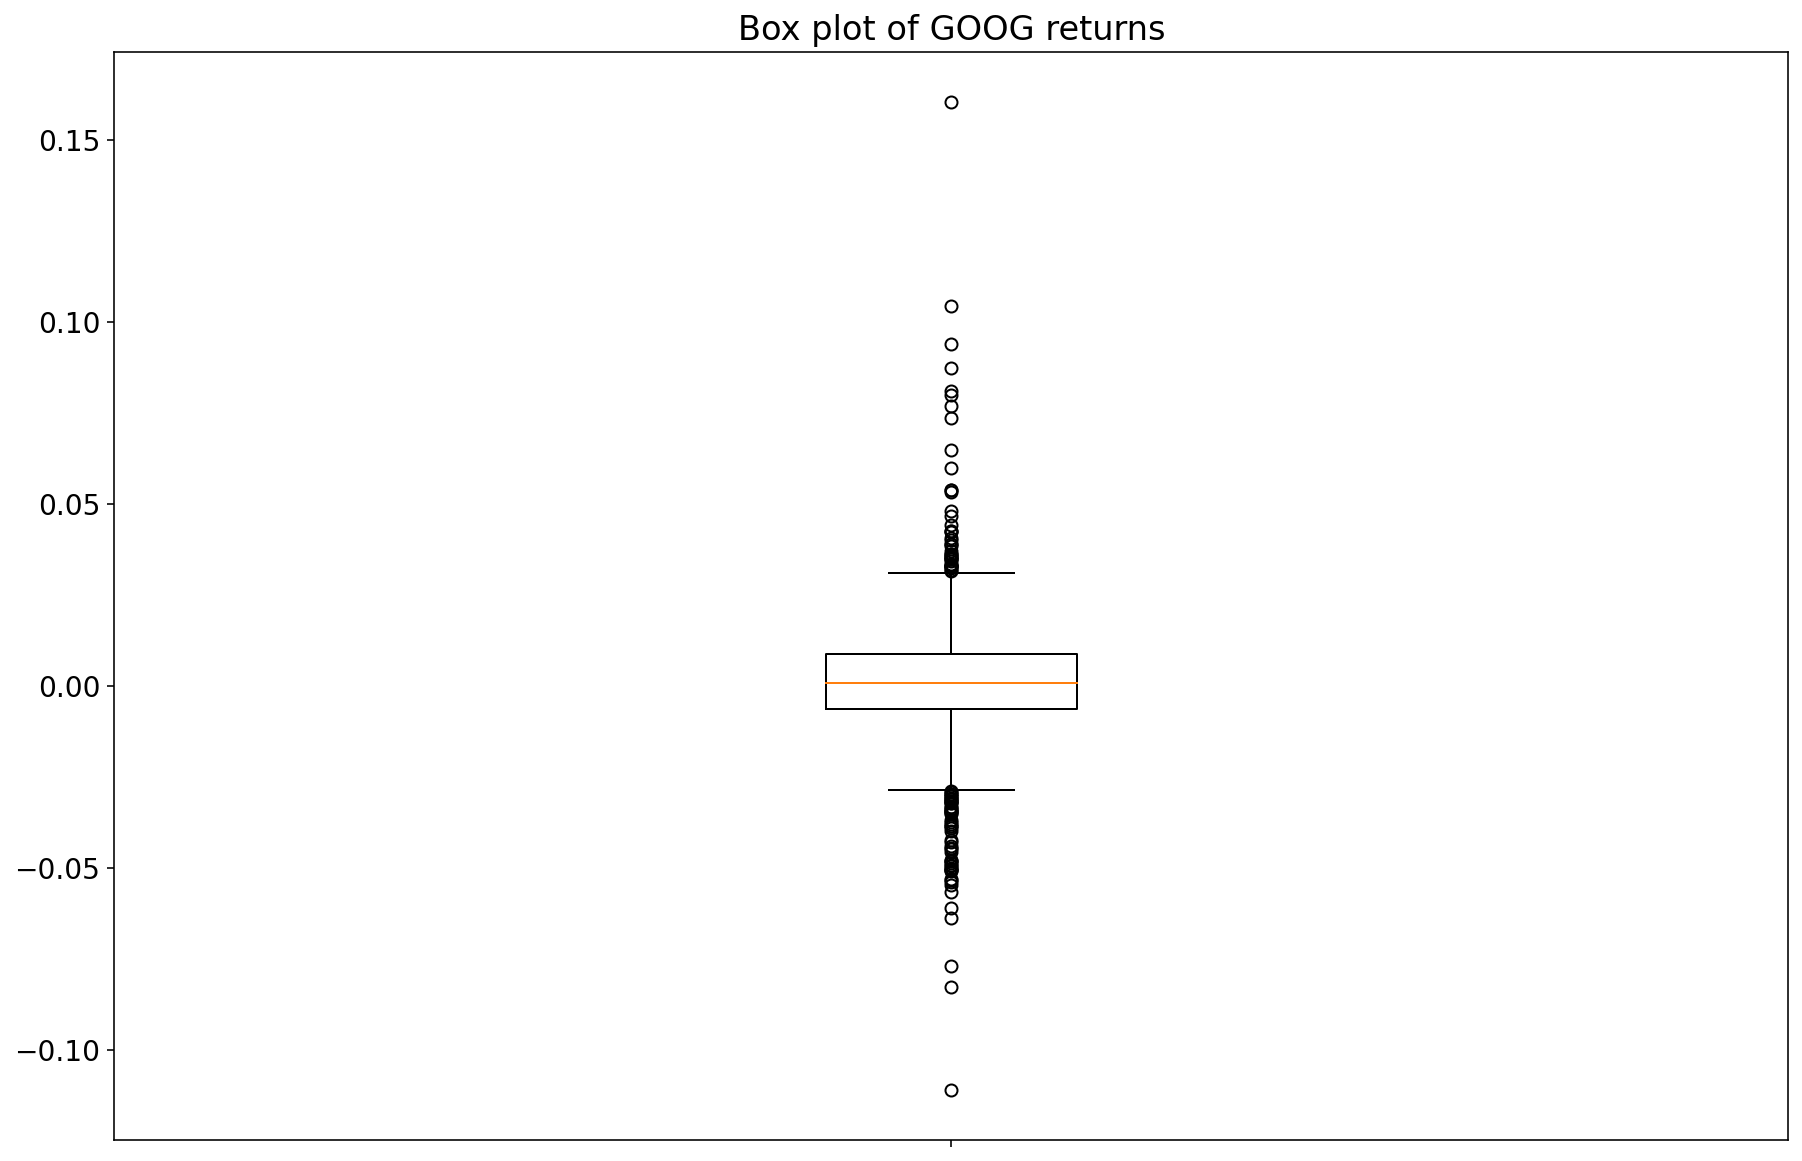

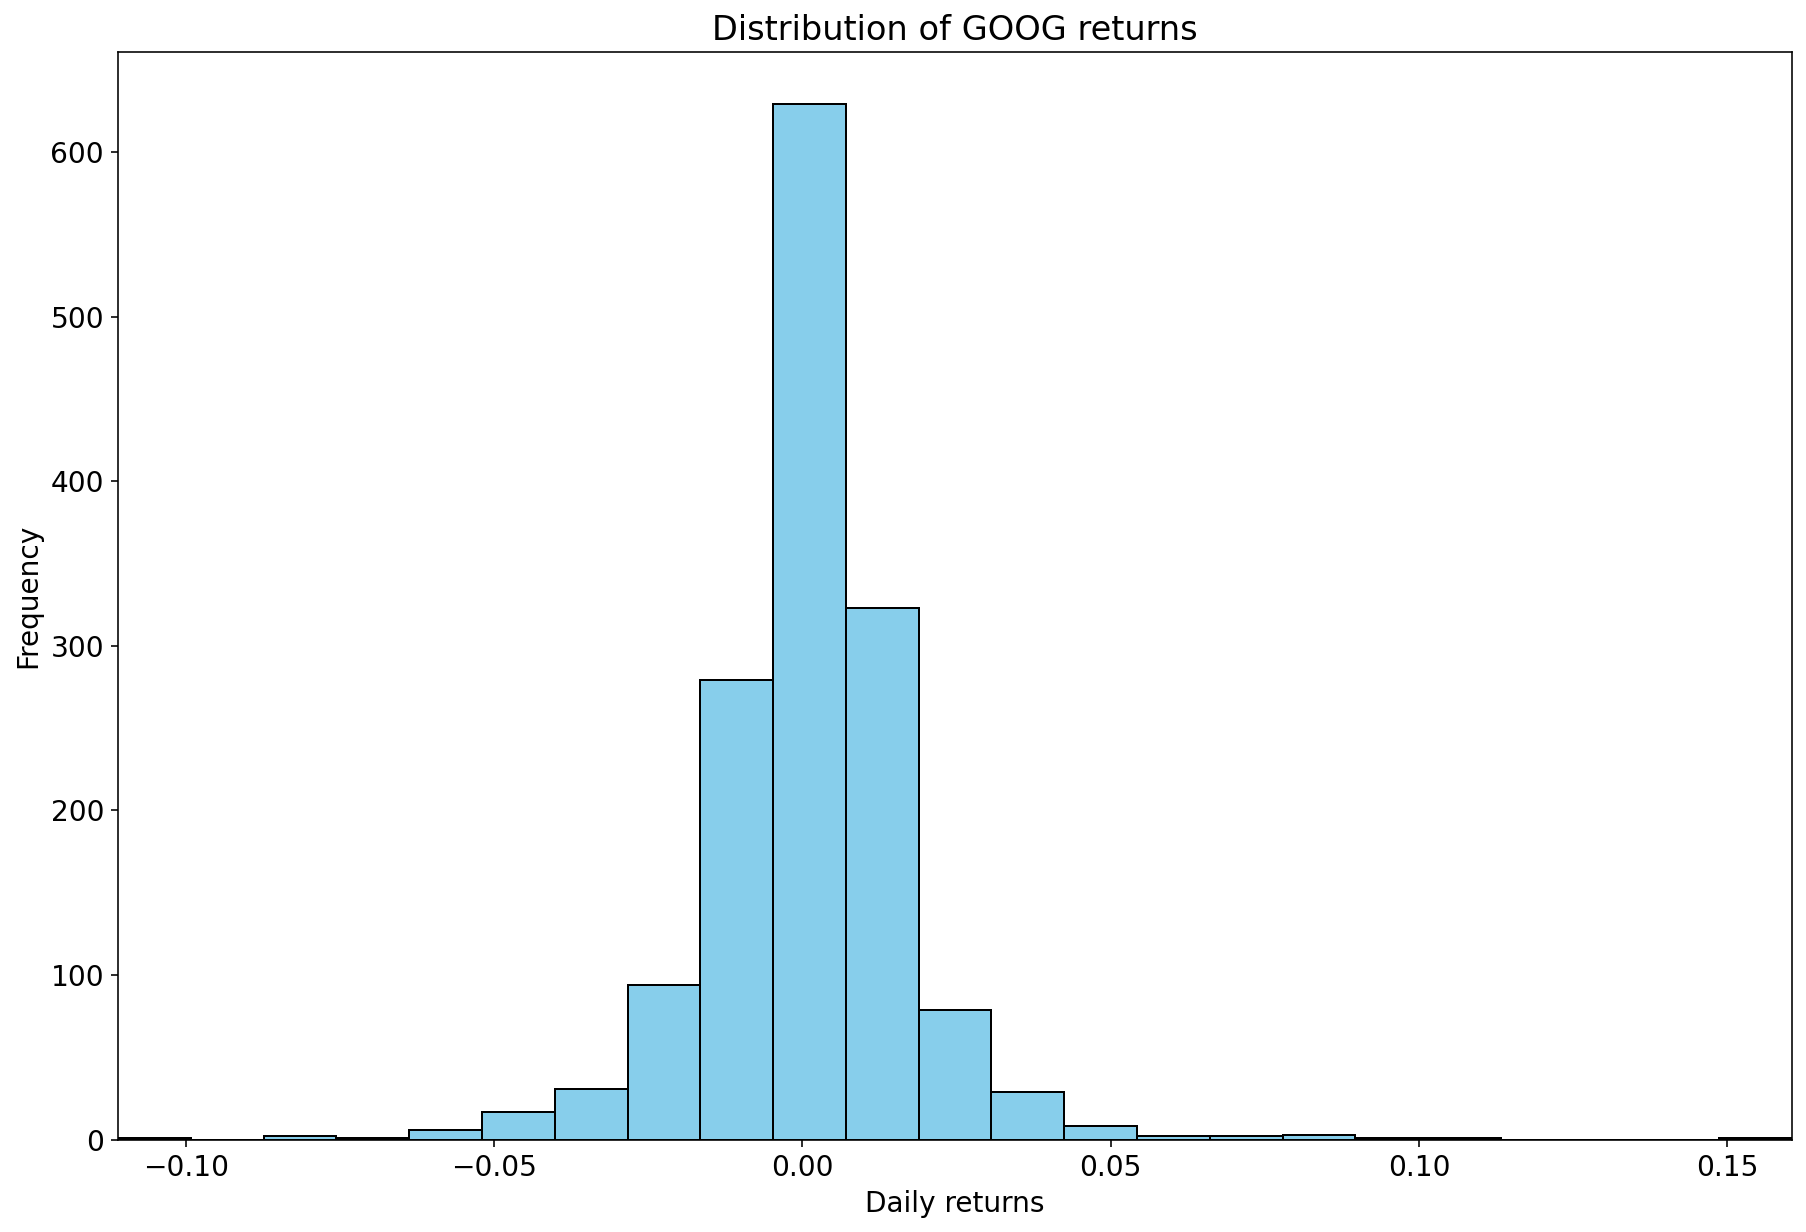

In [9]:
for stock in range(0, numberOfStocks):
  mean    = stockReturns[stock].mean()
  median  = stockReturns[stock].median()
  mode    = stockReturns[stock].mode()[0]

  # Percentiles and skewness
  printHeader(stockNames[stock])
  print('Closing price distribution:\nSkewness: {}'.format(skew(stockReturns[stock])))
  for q in range(1,4):
    print('Q{} = {}'.format(q, np.percentile(stockReturns[stock], 25*q)))

  # Box plot
  plt.rcParams['figure.figsize'] = [15, 10] 
  plt.boxplot(stockReturns[stock],labels=[""])
  plt.title("Box plot of {} returns".format(stockNames[stock]))
  plt.show()

  # Histogram
  plt.hist(stockReturns[stock],bins="rice",label="Daily returns", color="skyblue", edgecolor='black')
  plt.xlim(xmin=stockReturns[stock].min(), xmax=stockReturns[stock].max())
  plt.title("Distribution of {} returns".format(stockNames[stock]))
  plt.ylabel("Frequency")
  plt.xlabel("Daily returns")
  plt.show()
del mean, median, mode, stock

The returns data appears normally distributed. This would imply that the forward differences of the closing prices has a normal distribution about zero. However, the box plots suggest several outliers outside of the IQR, so we will further investigate the distribution with a QQ plot.

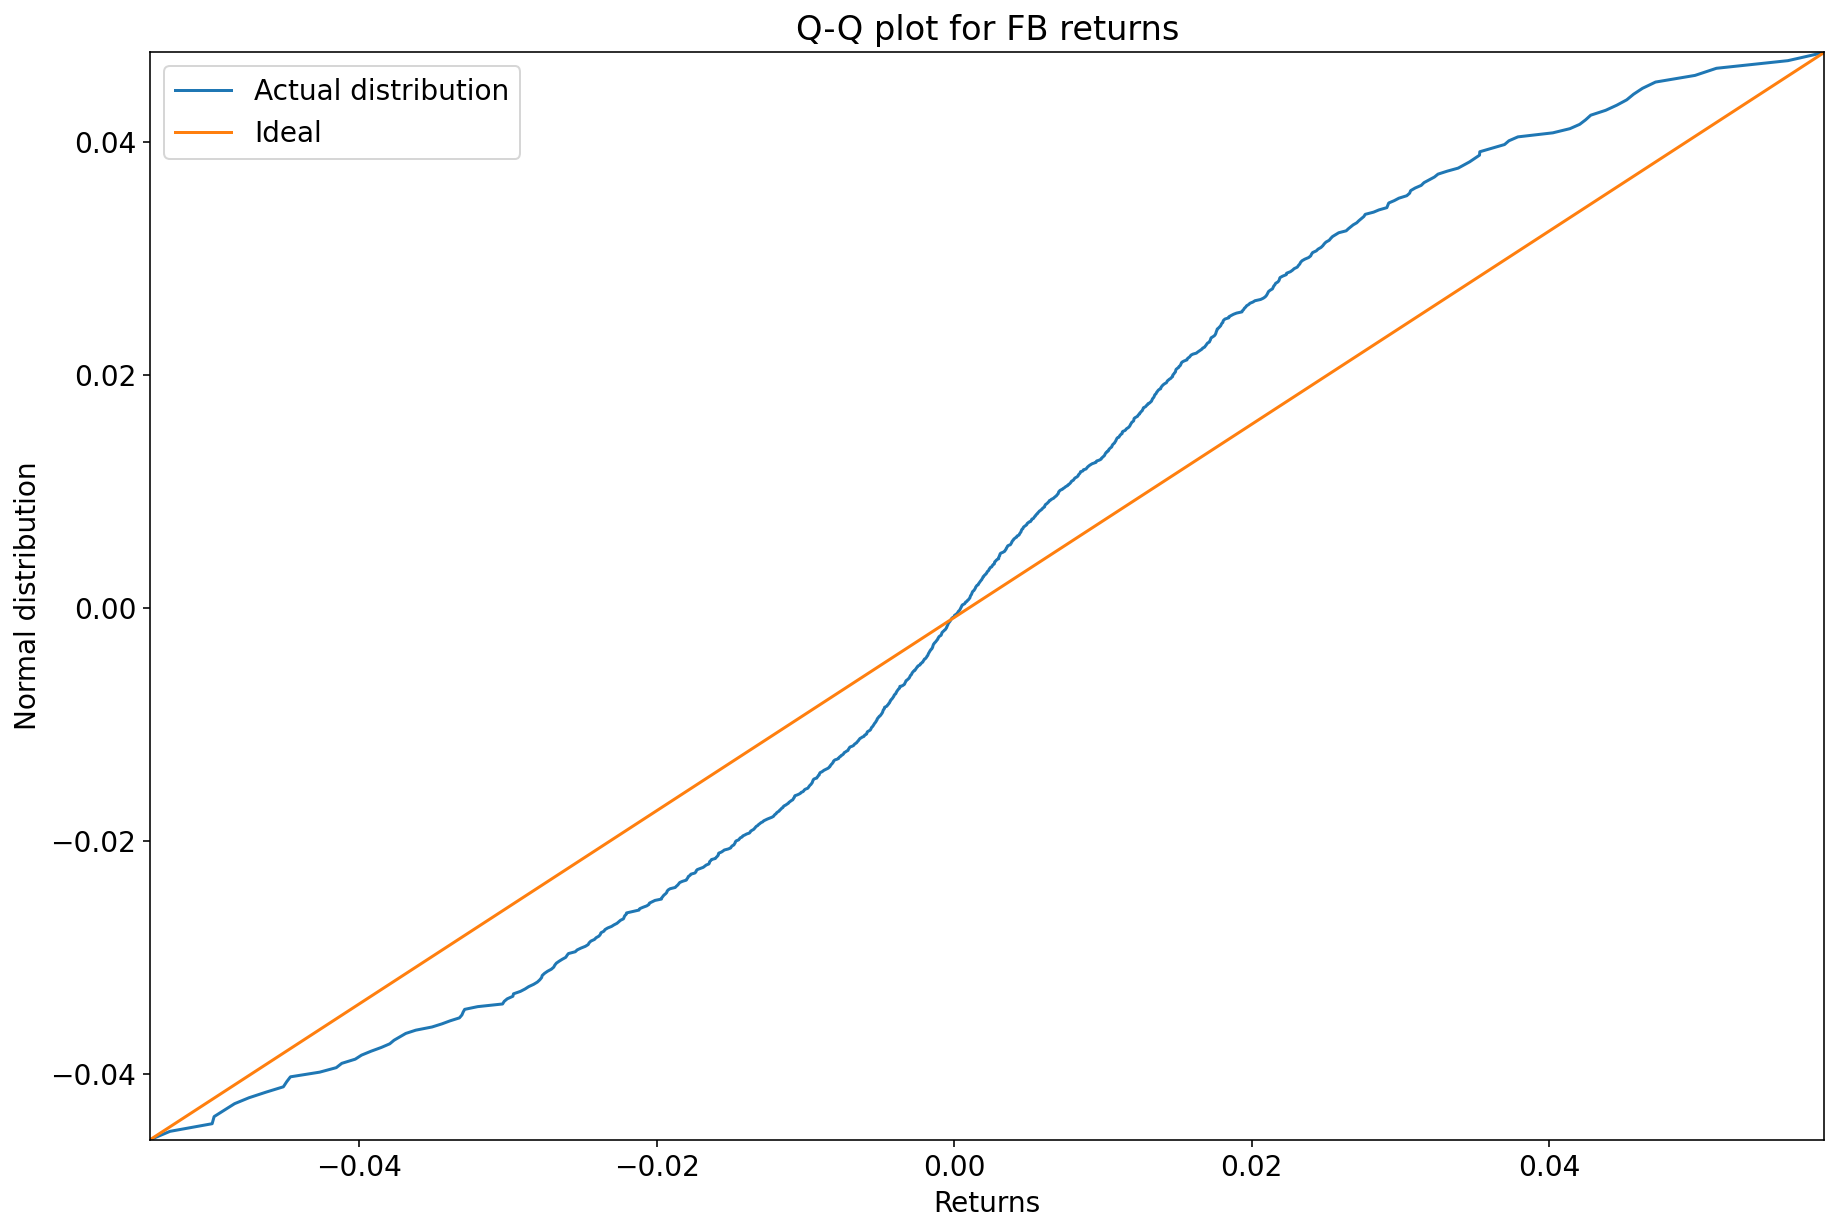

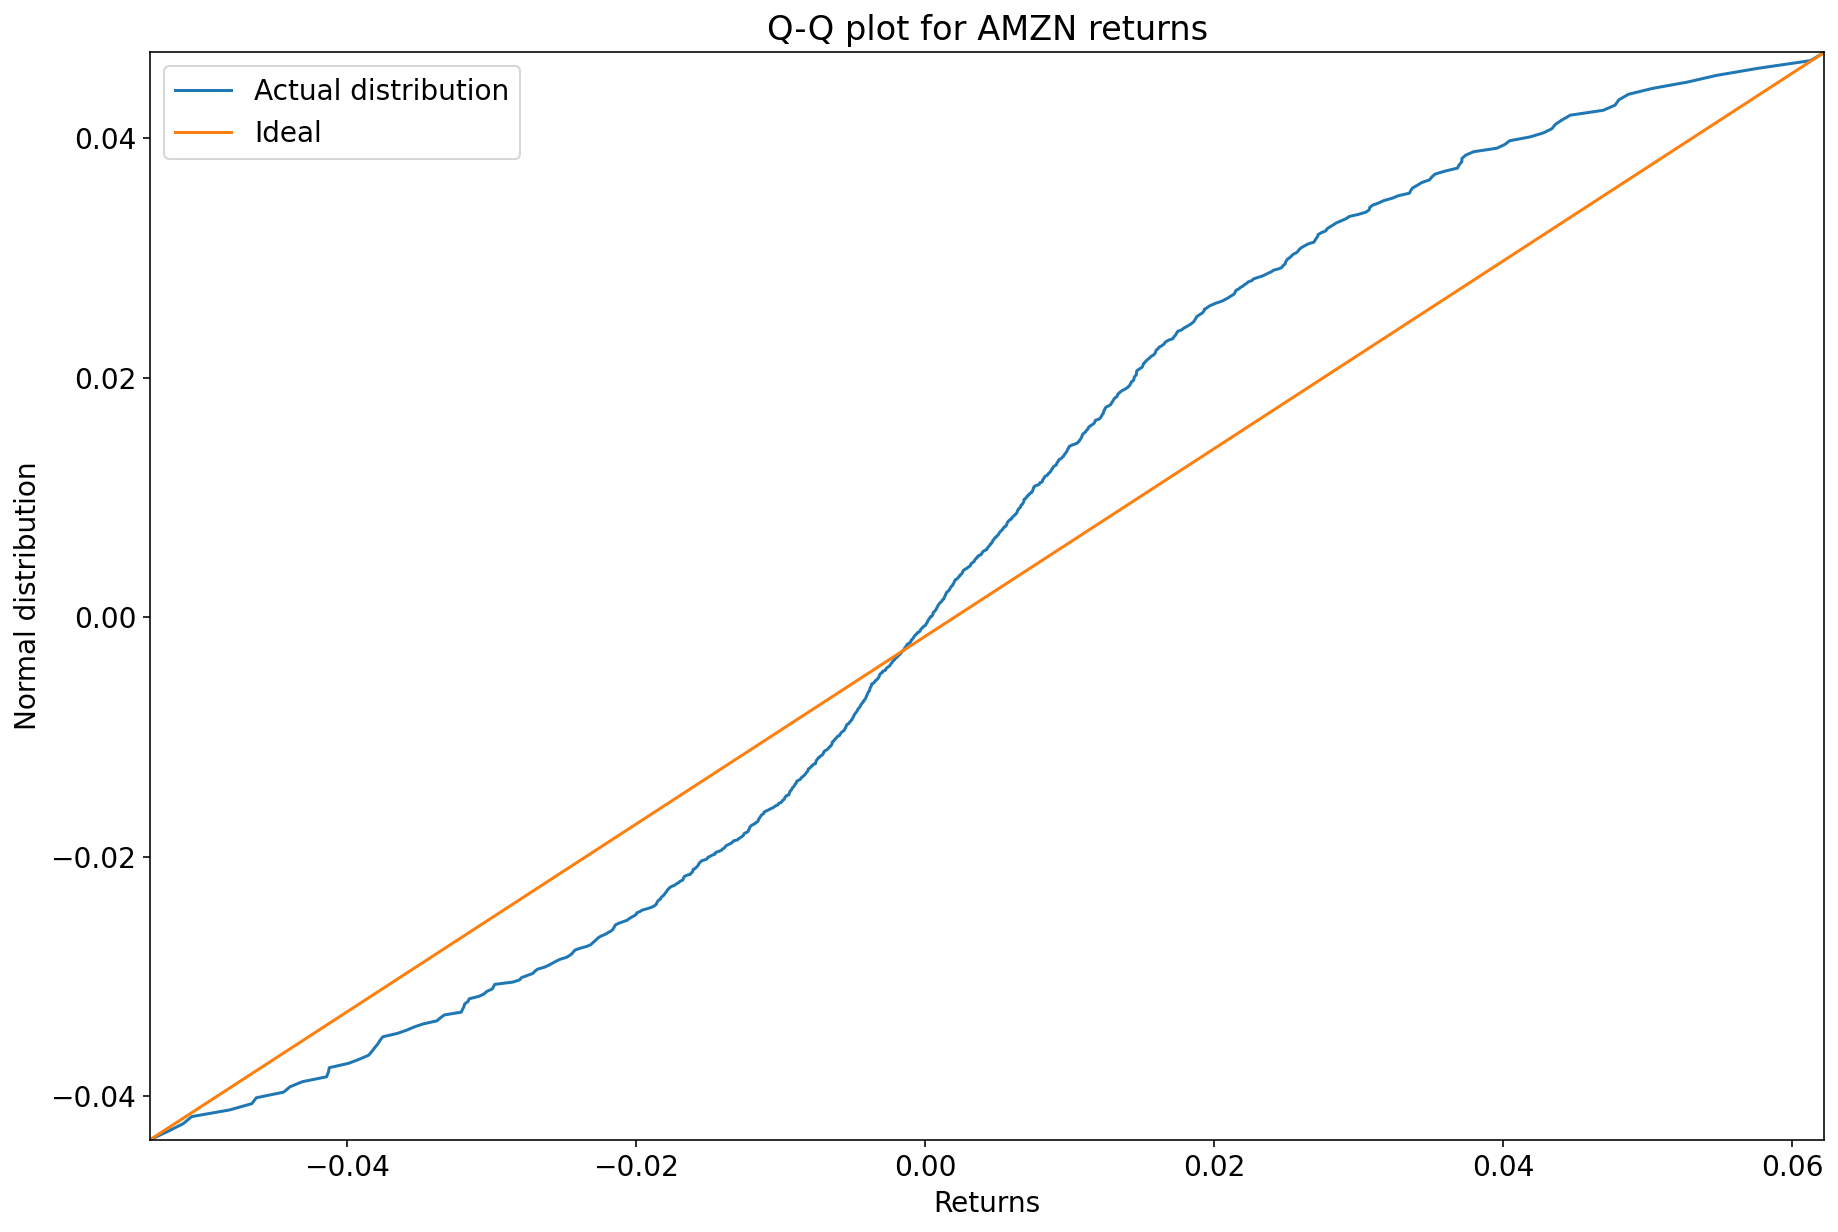

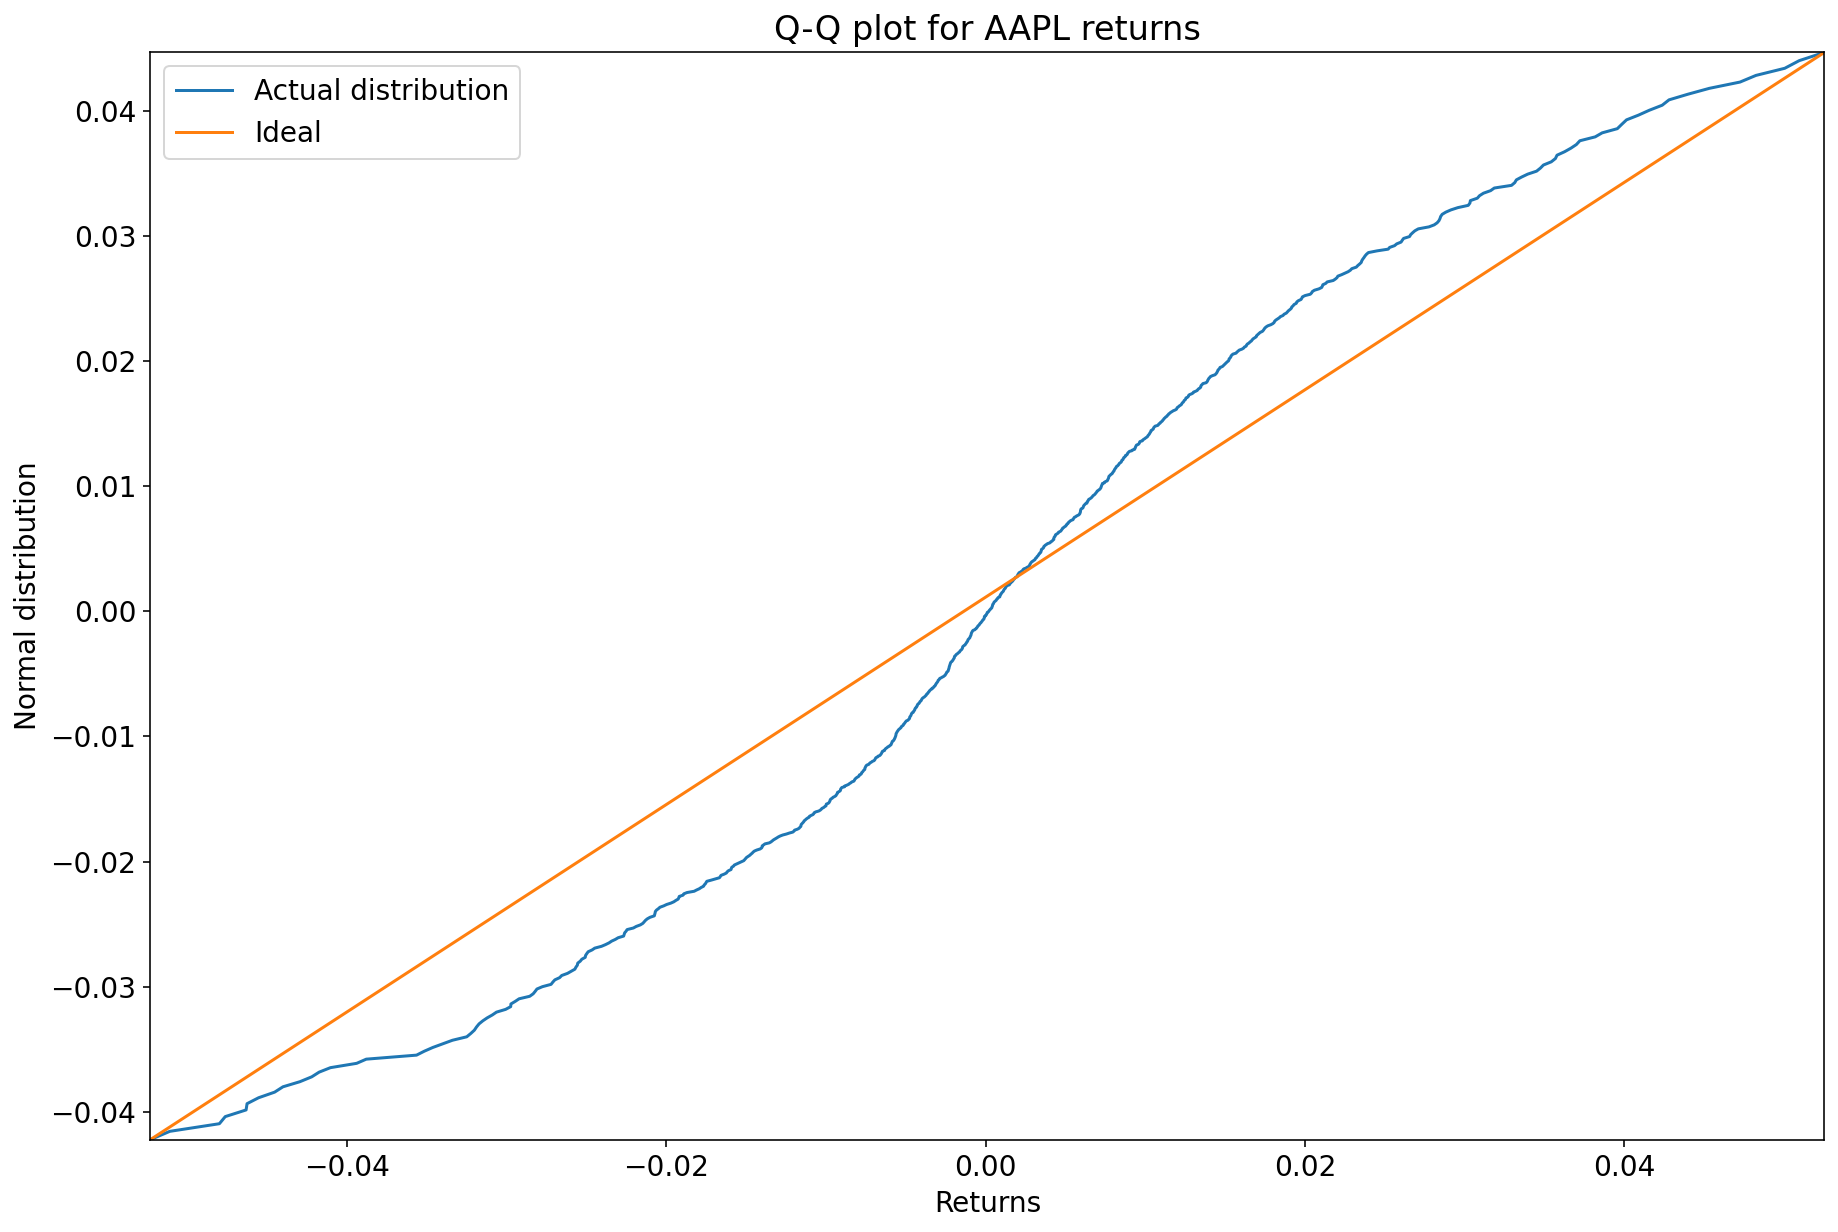

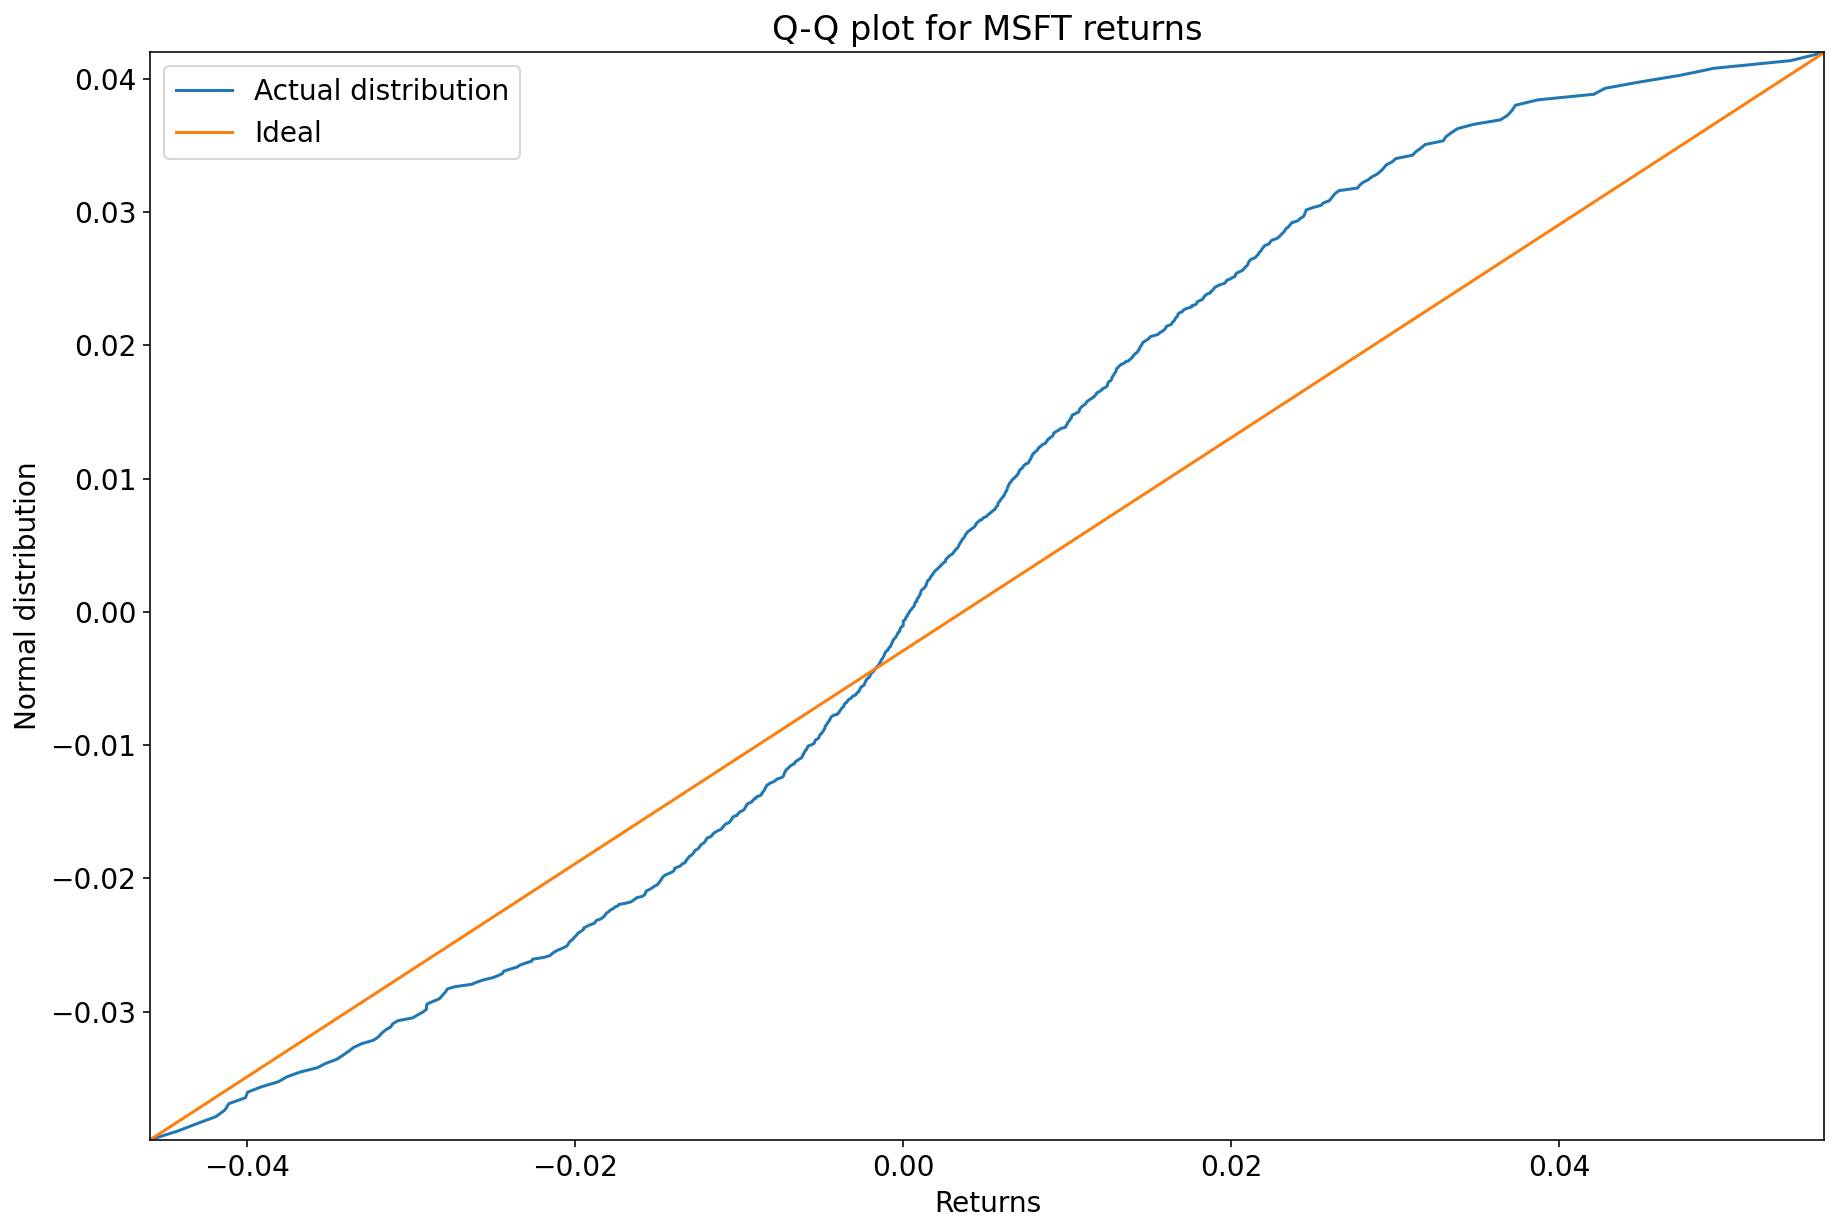

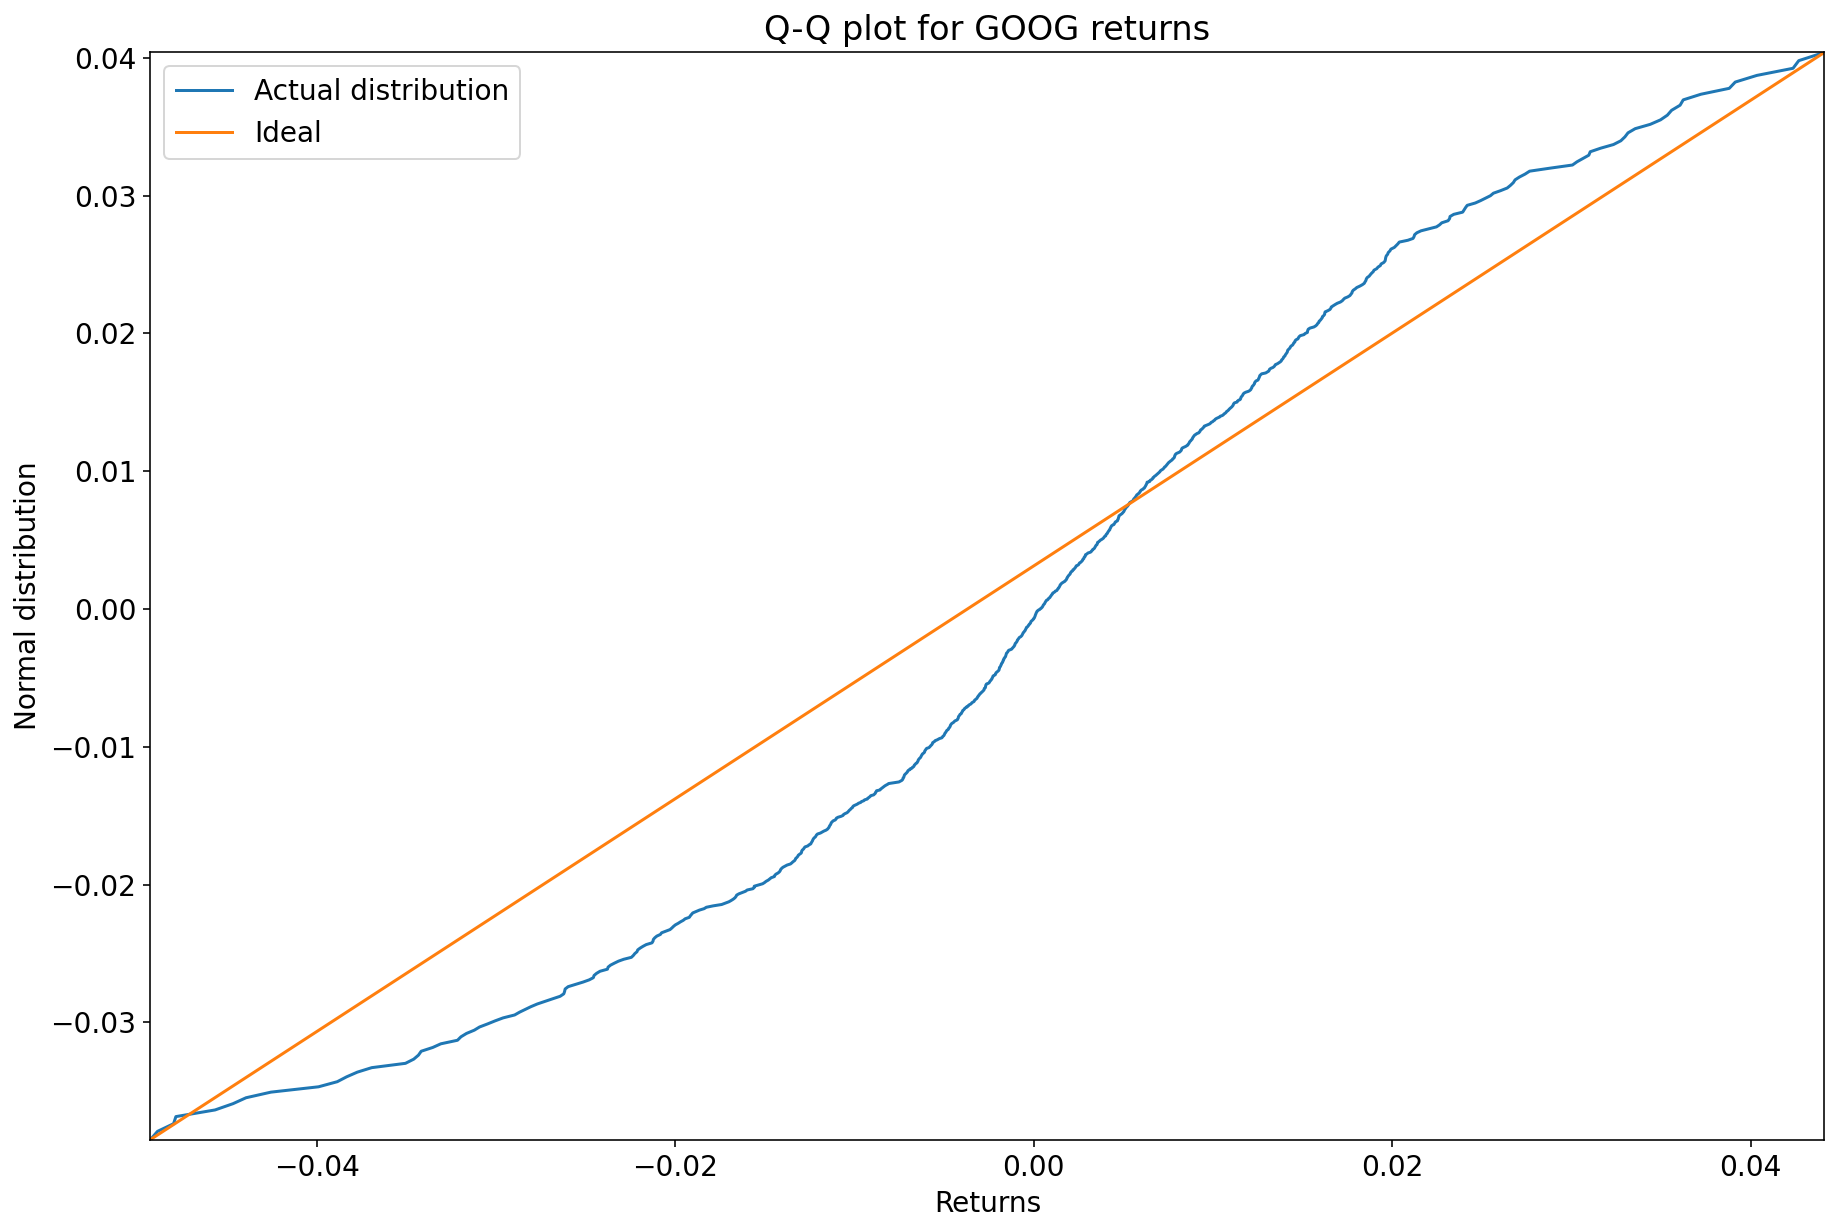

In [10]:
for stock in range(0, numberOfStocks):
  y = np.linspace(0.01,0.99,1000)
  q1 = np.quantile(stockReturns[stock],y)
  q2 = norm.ppf(y,loc=np.mean(stockReturns[stock]), scale=np.std(stockReturns[stock]))
  plt.rcParams['figure.figsize'] = [15, 10] 
  plt.plot(q1,q2, label='Actual distribution') # Plot returns distribution
  plt.plot([min(q1),max(q1)],[min(q2),max(q2)], label='Ideal') # Plot normal distribution
  plt.xlim((min(q1),max(q1))) 
  plt.ylim((min(q2),max(q2)))  
  plt.xlabel("Returns") 
  plt.ylabel("Normal distribution") 
  plt.title("Q-Q plot for {} returns".format(stockNames[stock]))
  plt.legend()
  plt.show()
del stock, q1, q2

The returns are *not* normally distributed, as is clear from the diagram. However, we must still have a look at the standard deviation (SD) for returns i.e. the 30 days rolling standard deviation. This is to investigate the [volatility](https://www.investopedia.com/terms/v/volatility.asp#:~:text=Volatility%20is%20a%20statistical%20measure,given%20security%20or%20market%20index.&text=For%20example%2C%20when%20the%20stock,factor%20when%20pricing%20options%20contracts.) of the stock returns; how *risky* it is for potential investors.

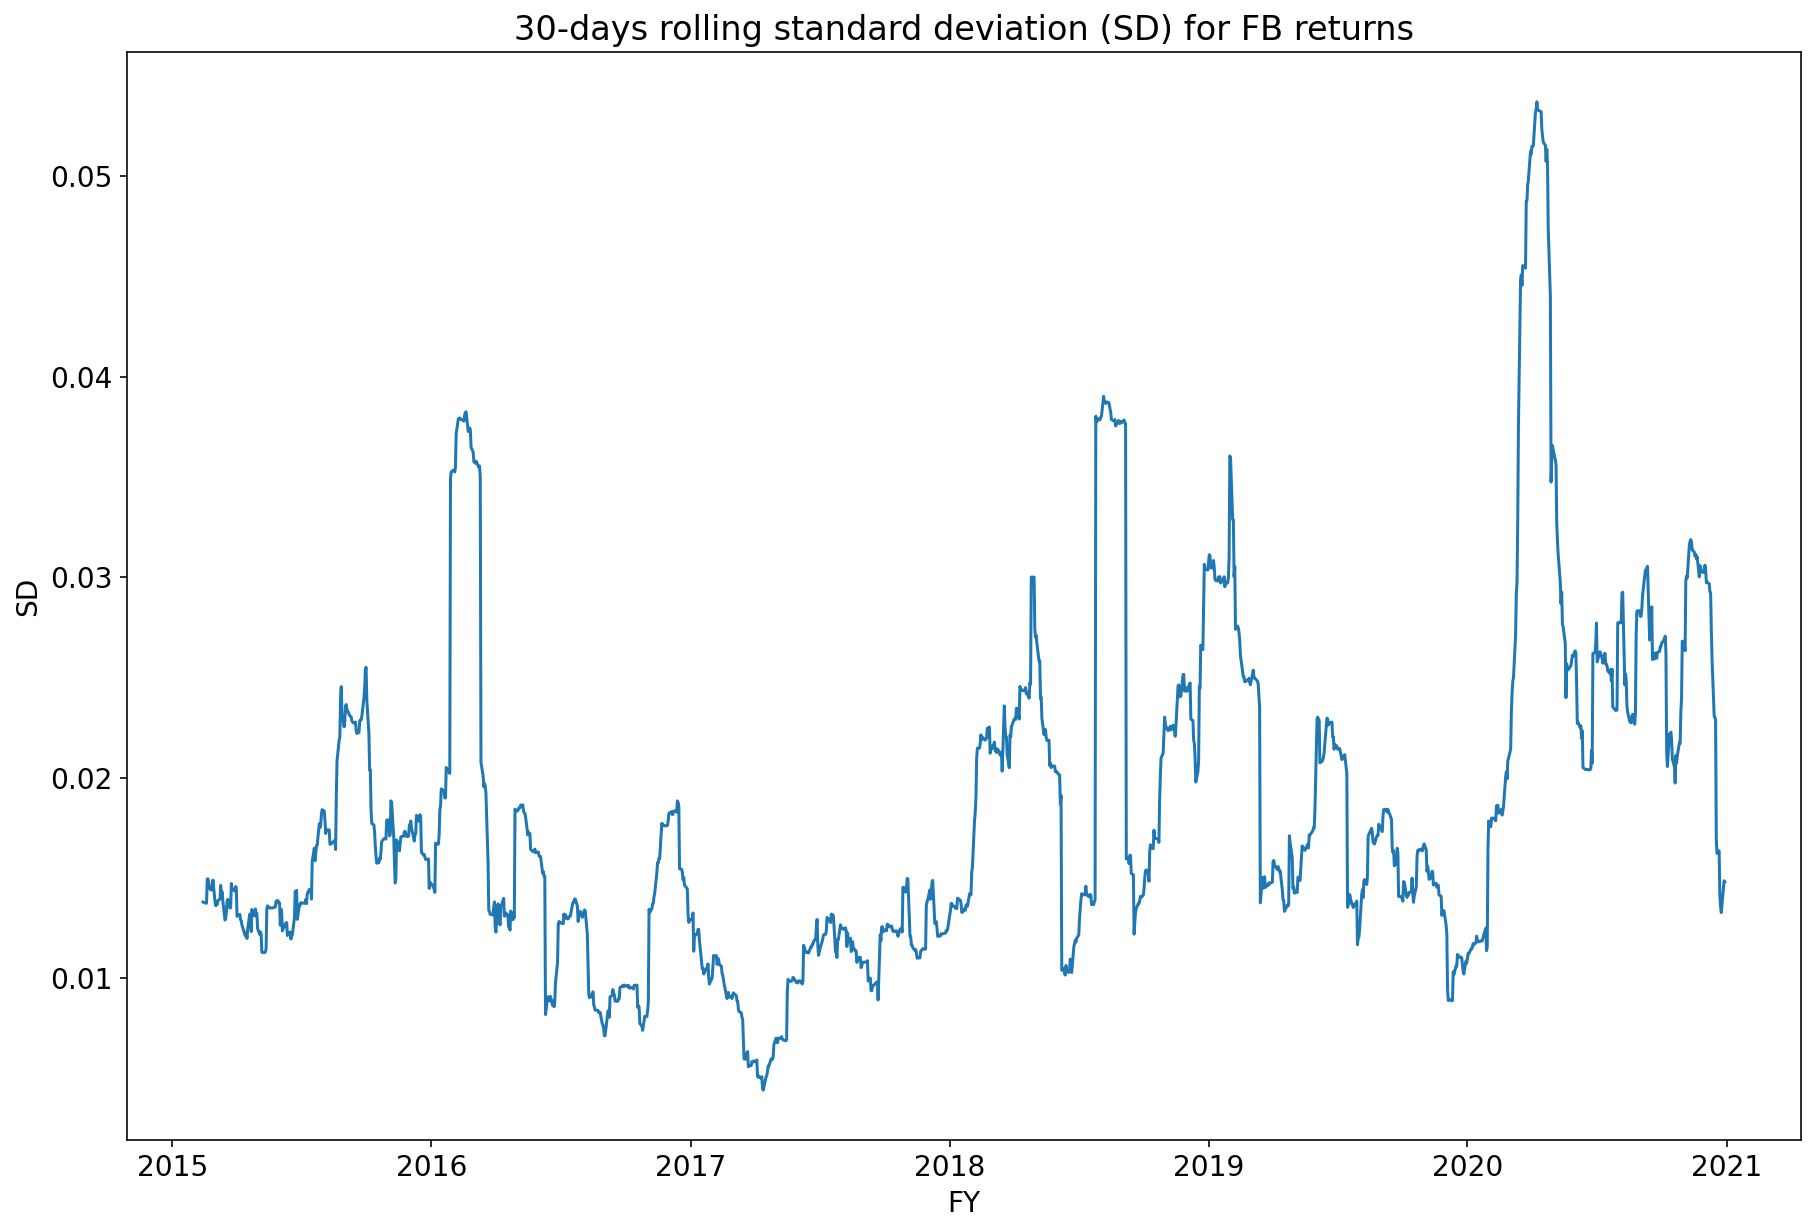

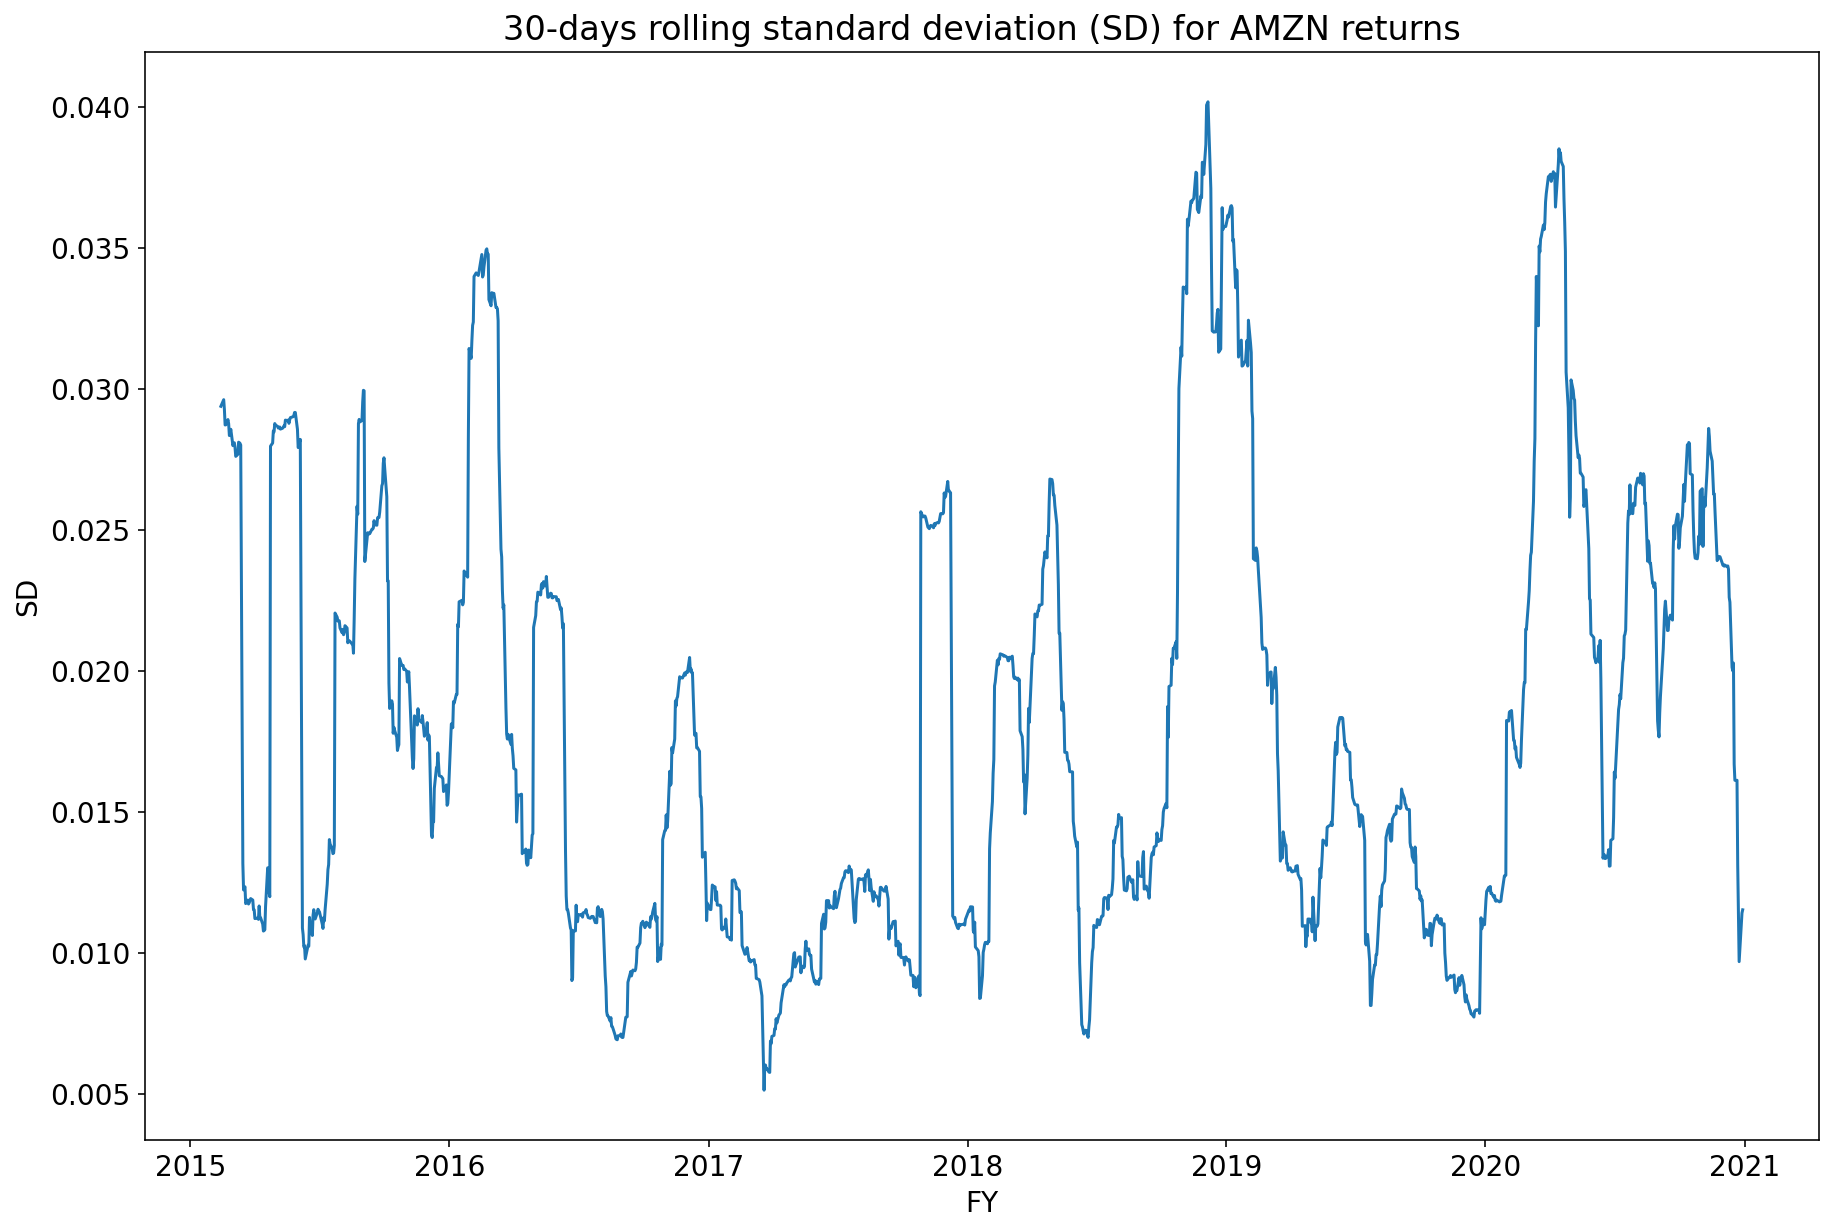

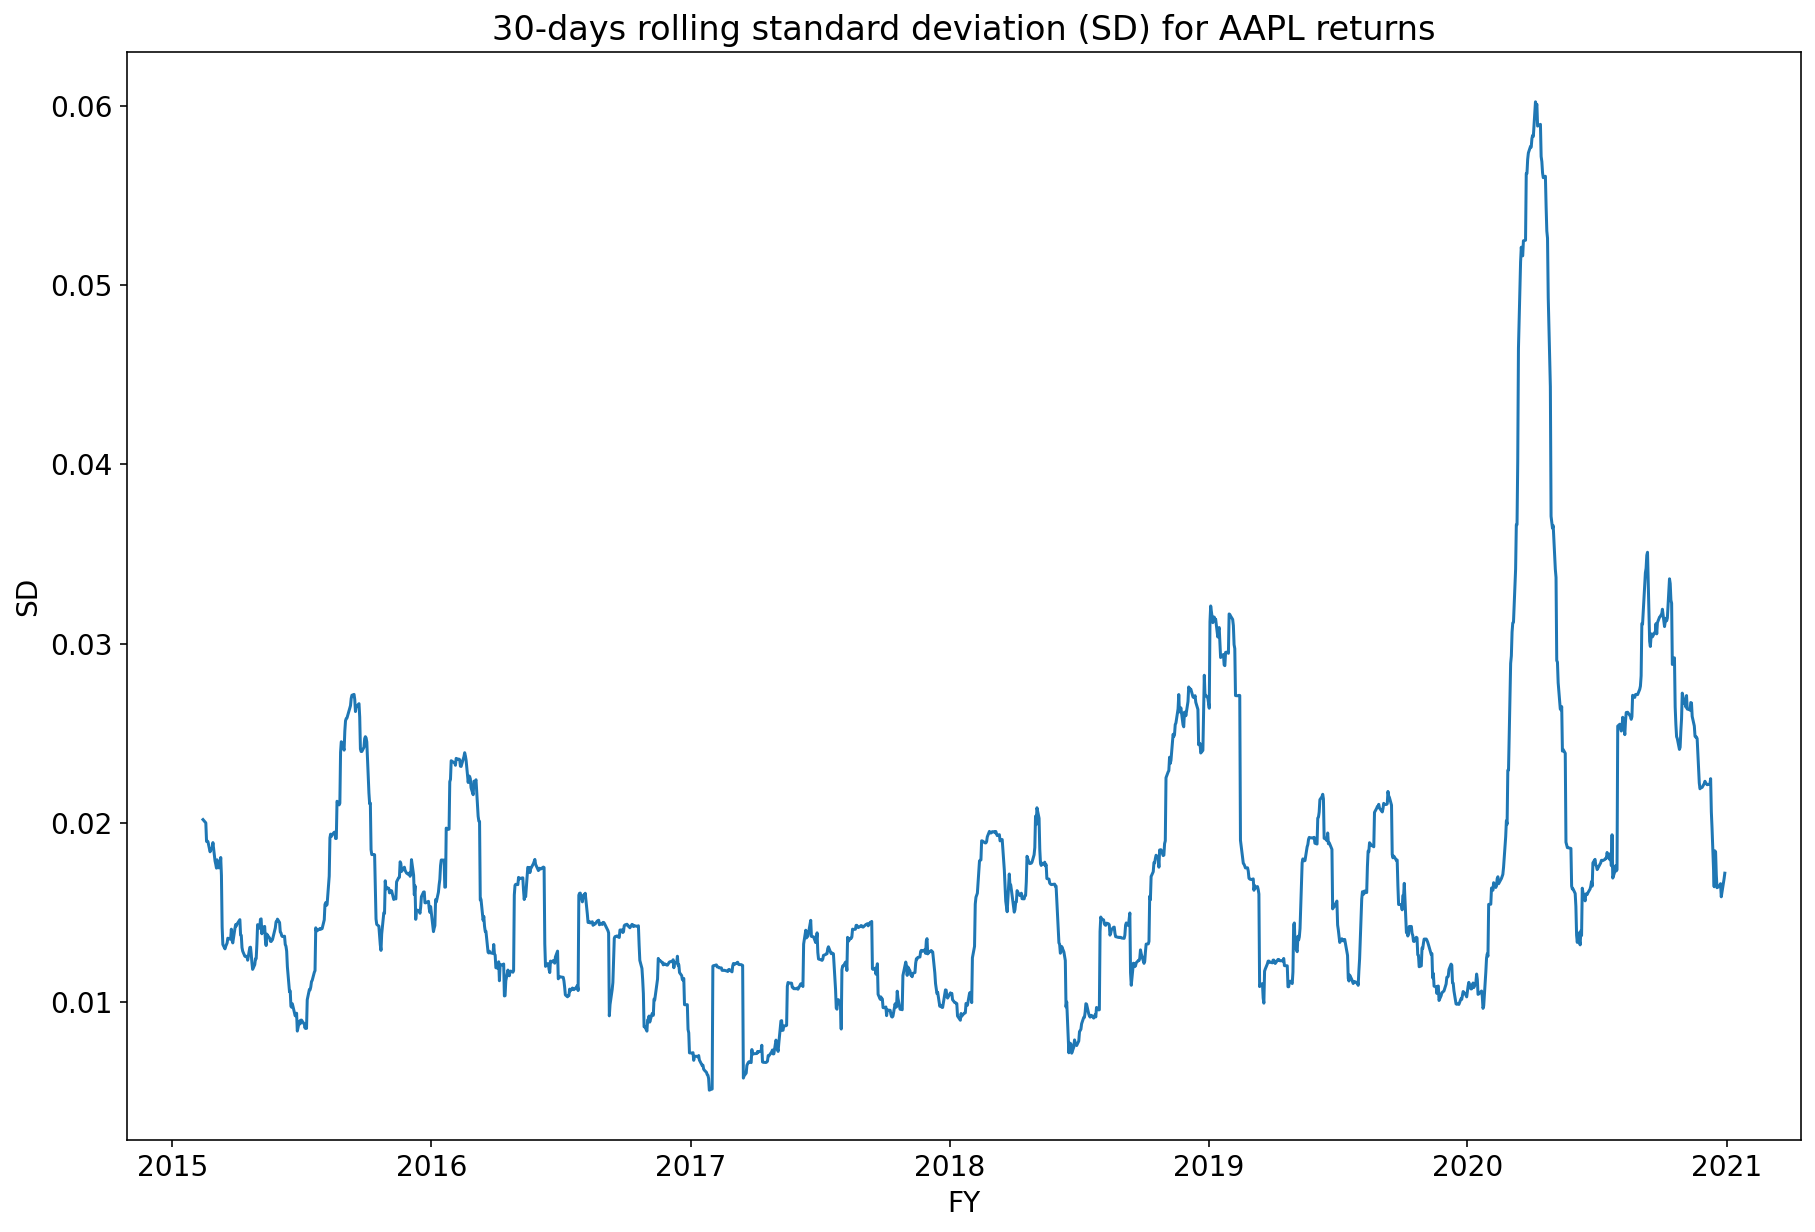

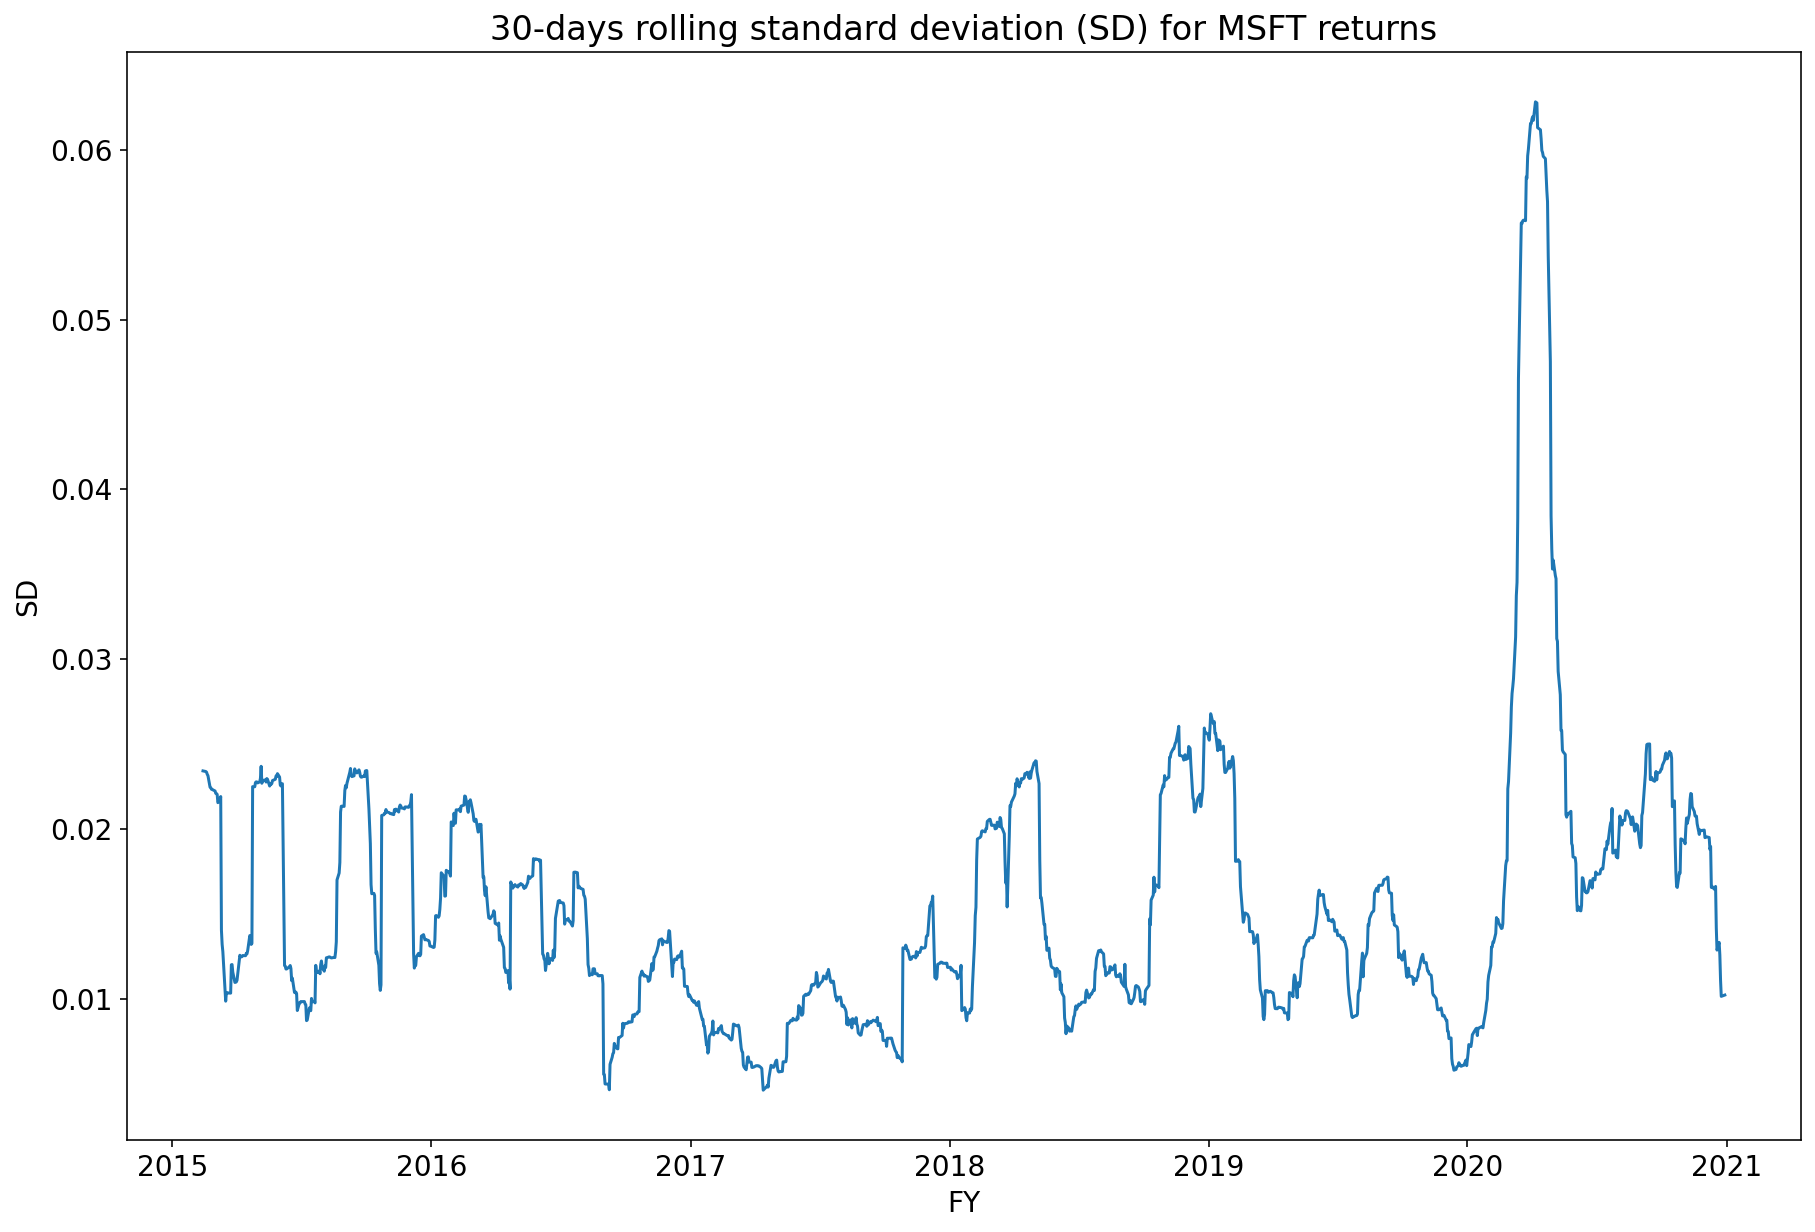

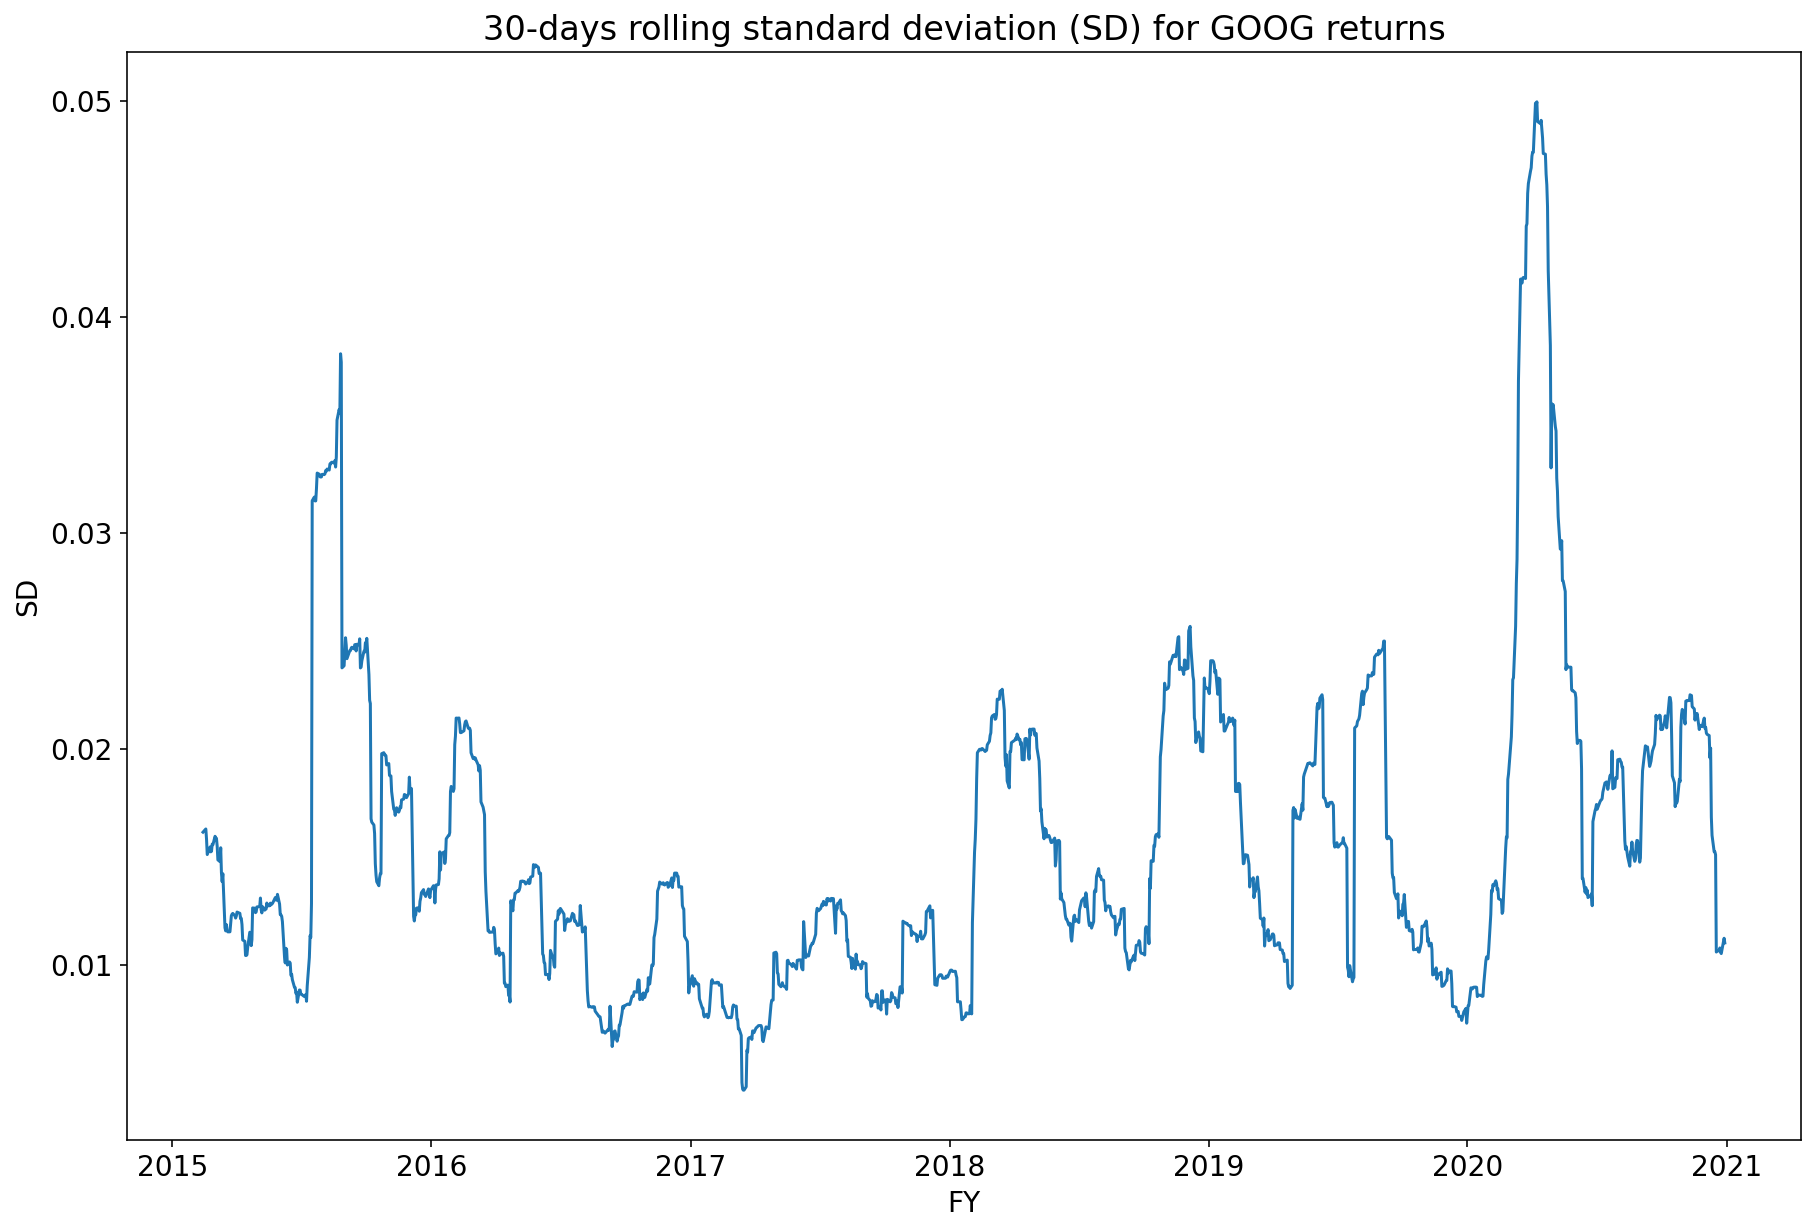

In [11]:
for stock in range(0, numberOfStocks):
  plt.rcParams['figure.figsize'] = [15, 10] 
  plt.plot(stockReturns[stock].rolling(30).std()) 
  plt.xlabel("FY") 
  plt.ylabel("SD") 
  plt.title("30-days rolling standard deviation (SD) for {} returns".format(stockNames[stock])) 
  plt.show()

There is certainly some seasonality at play here; certain times around a year show repeated increase in variance which indicates a higher fluctuation of value in the stocks. This could be due to the festive season. It is interesting to note that at the beginning of FY2020, all stocks reach their peak in variance. This may be due to the economic impact of the [2020 coronavirus pandemic](https://www.worldbank.org/en/news/feature/2020/06/08/the-global-economic-outlook-during-the-covid-19-pandemic-a-changed-world) which significantly affected markets worldwide.

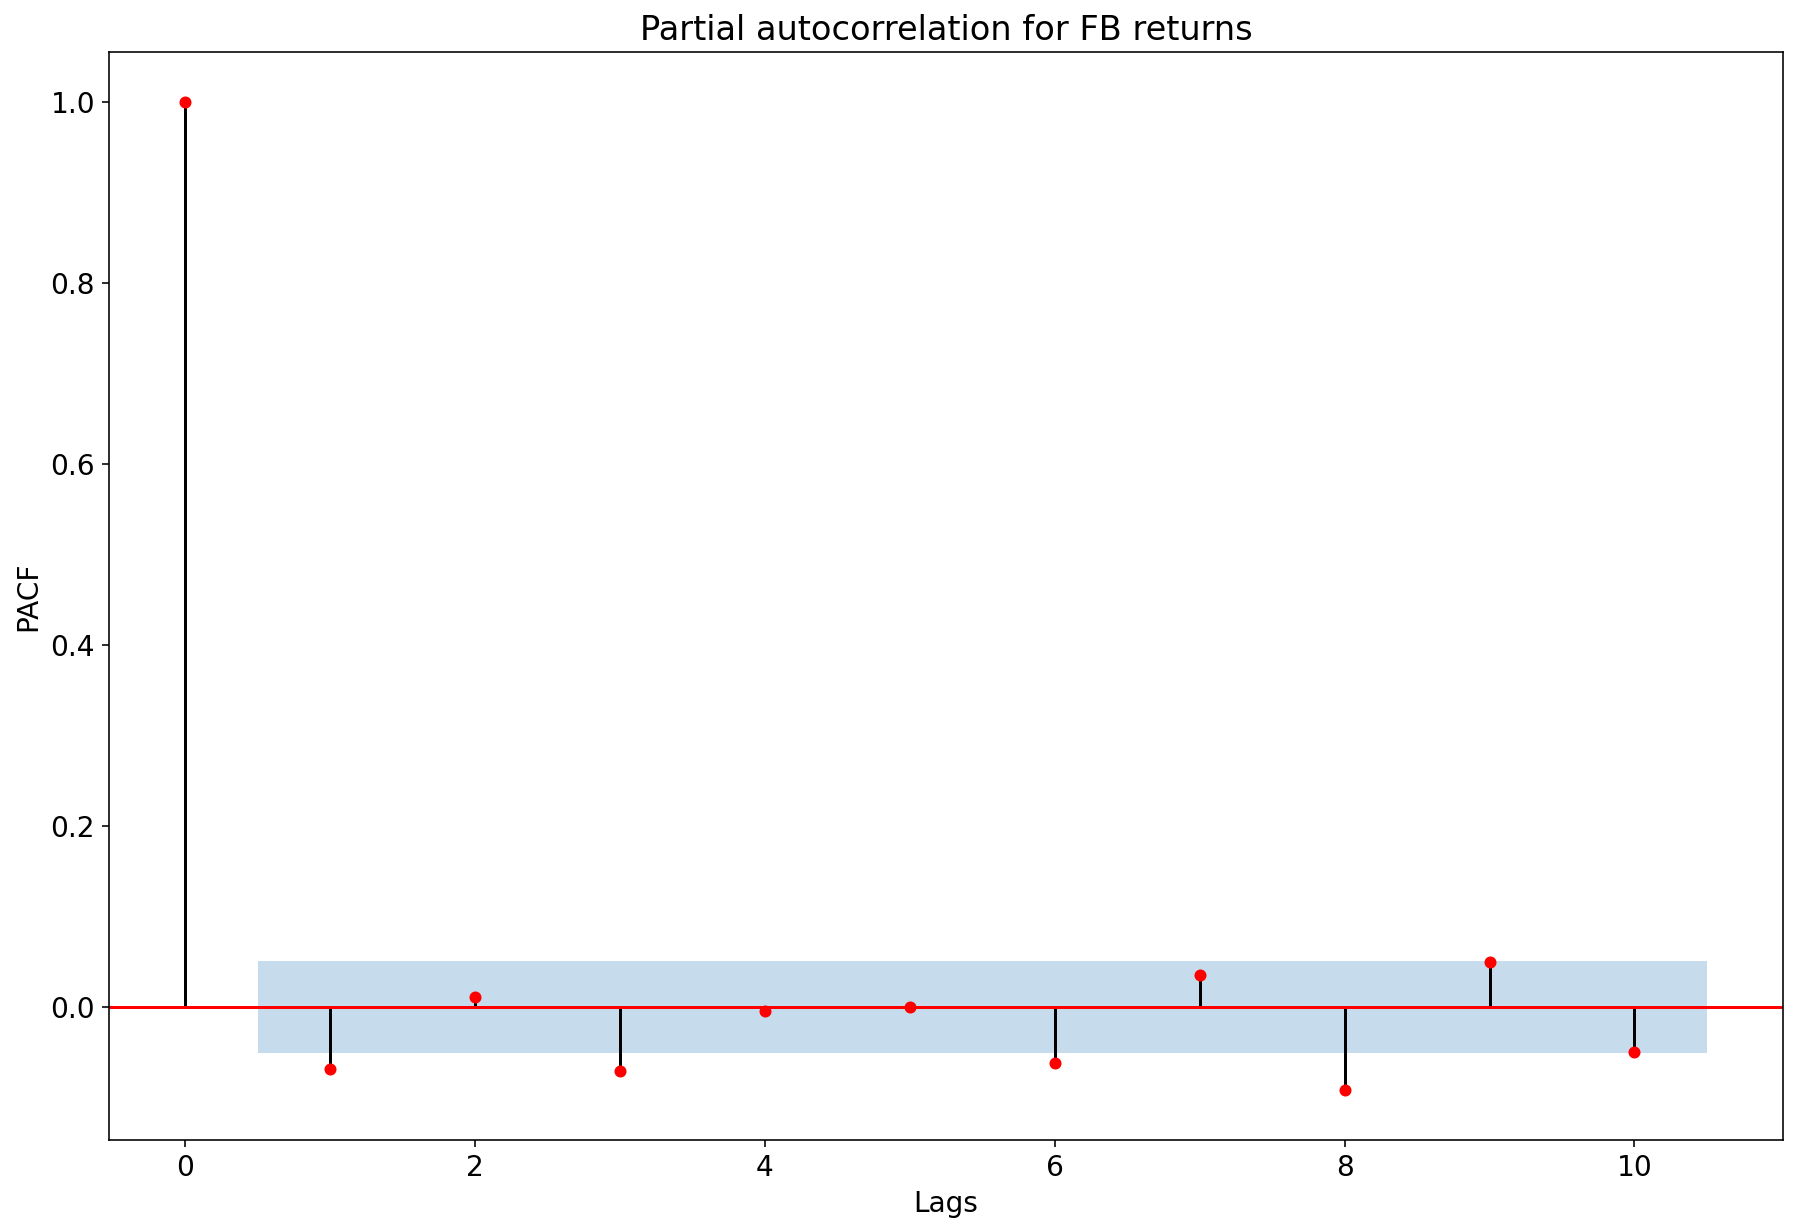

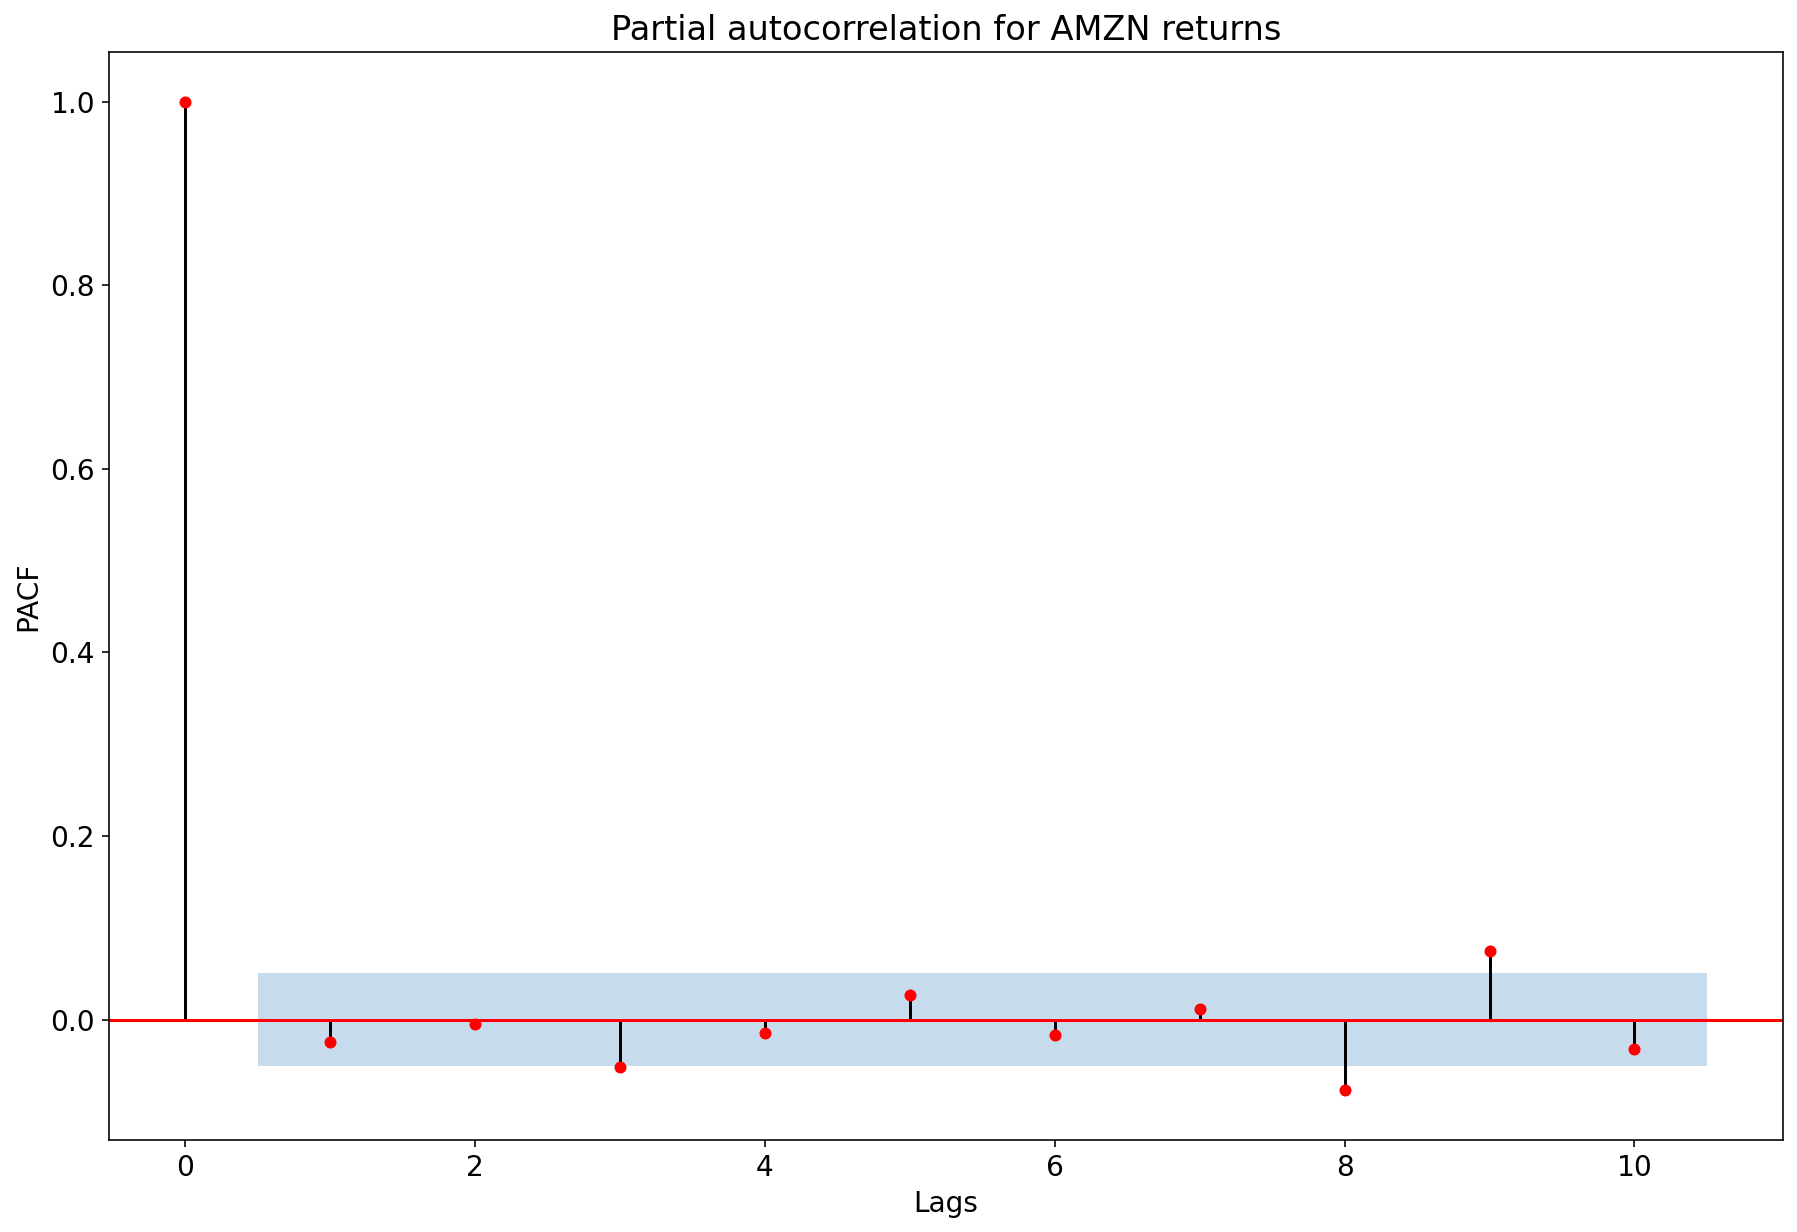

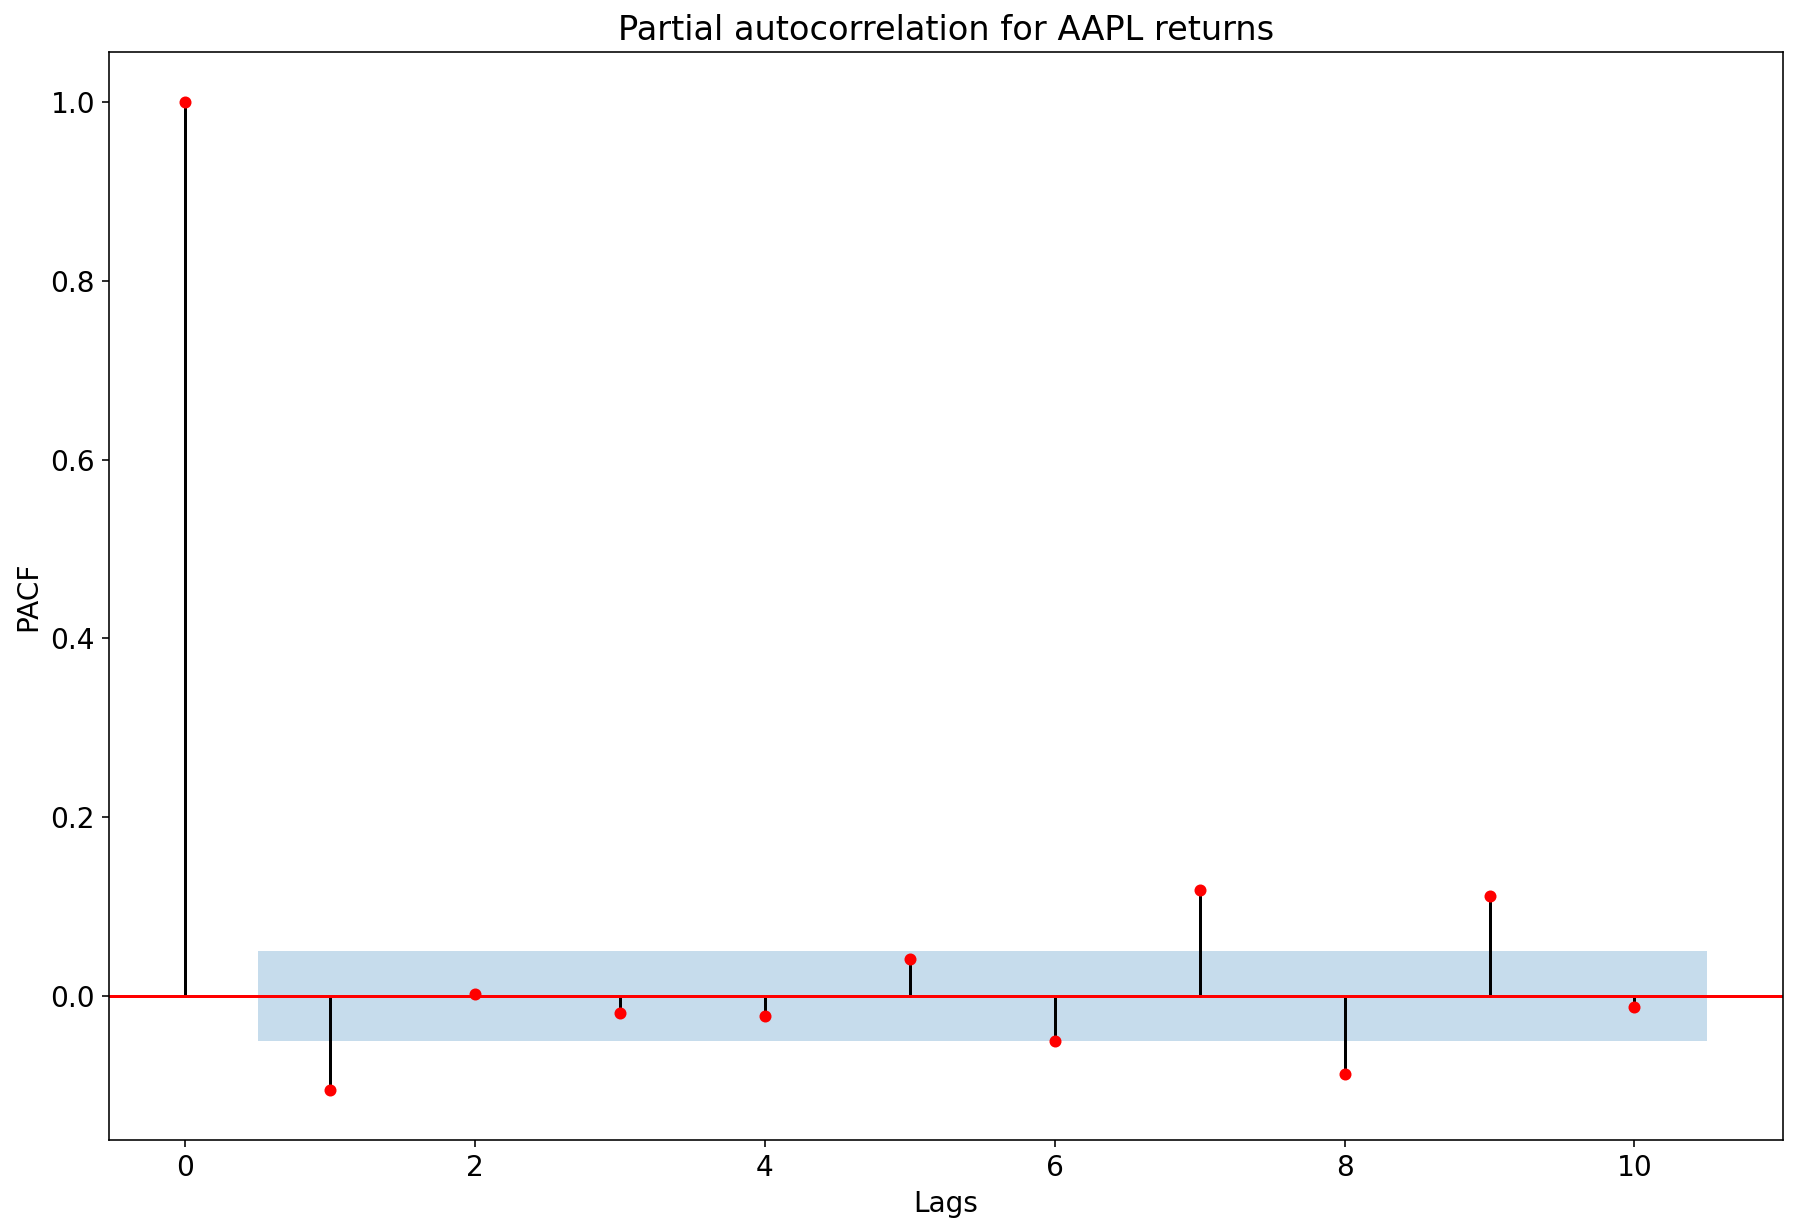

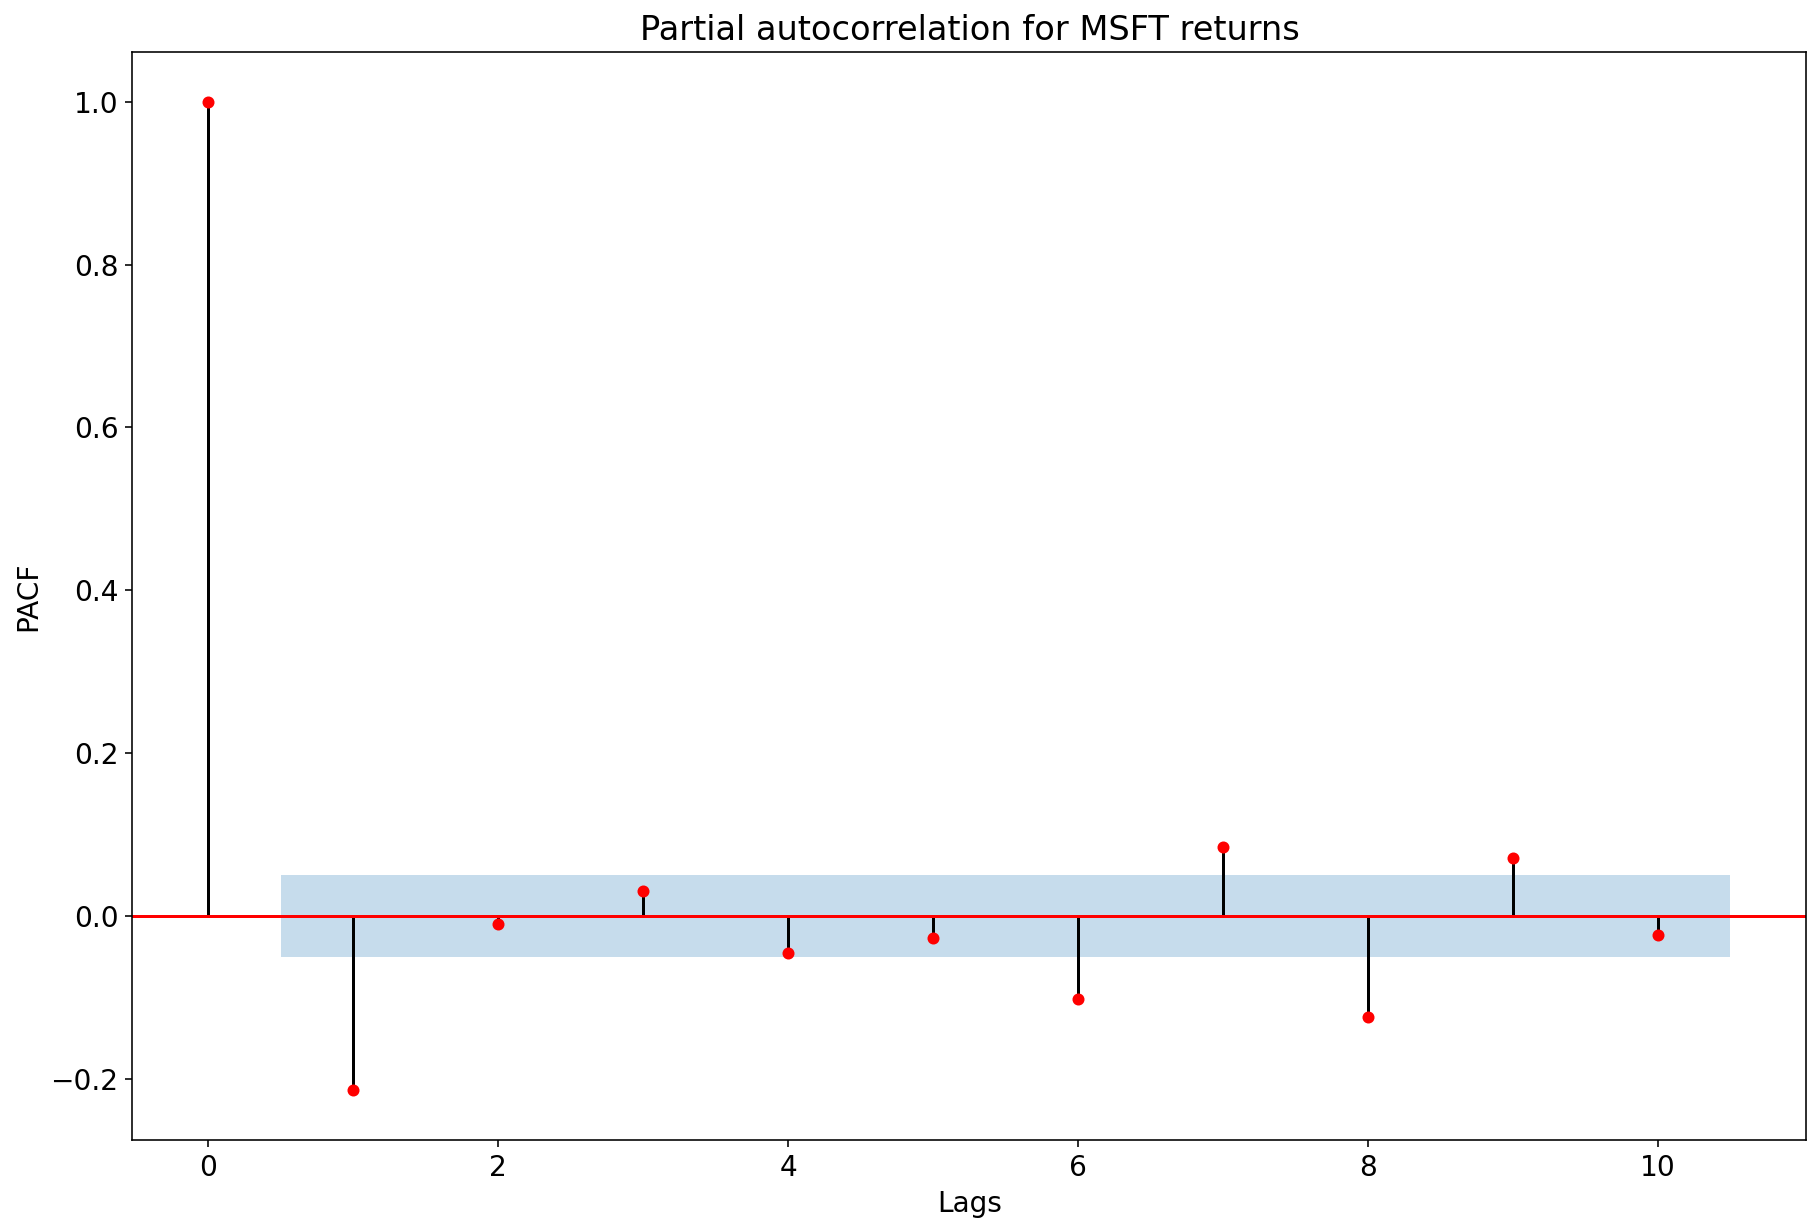

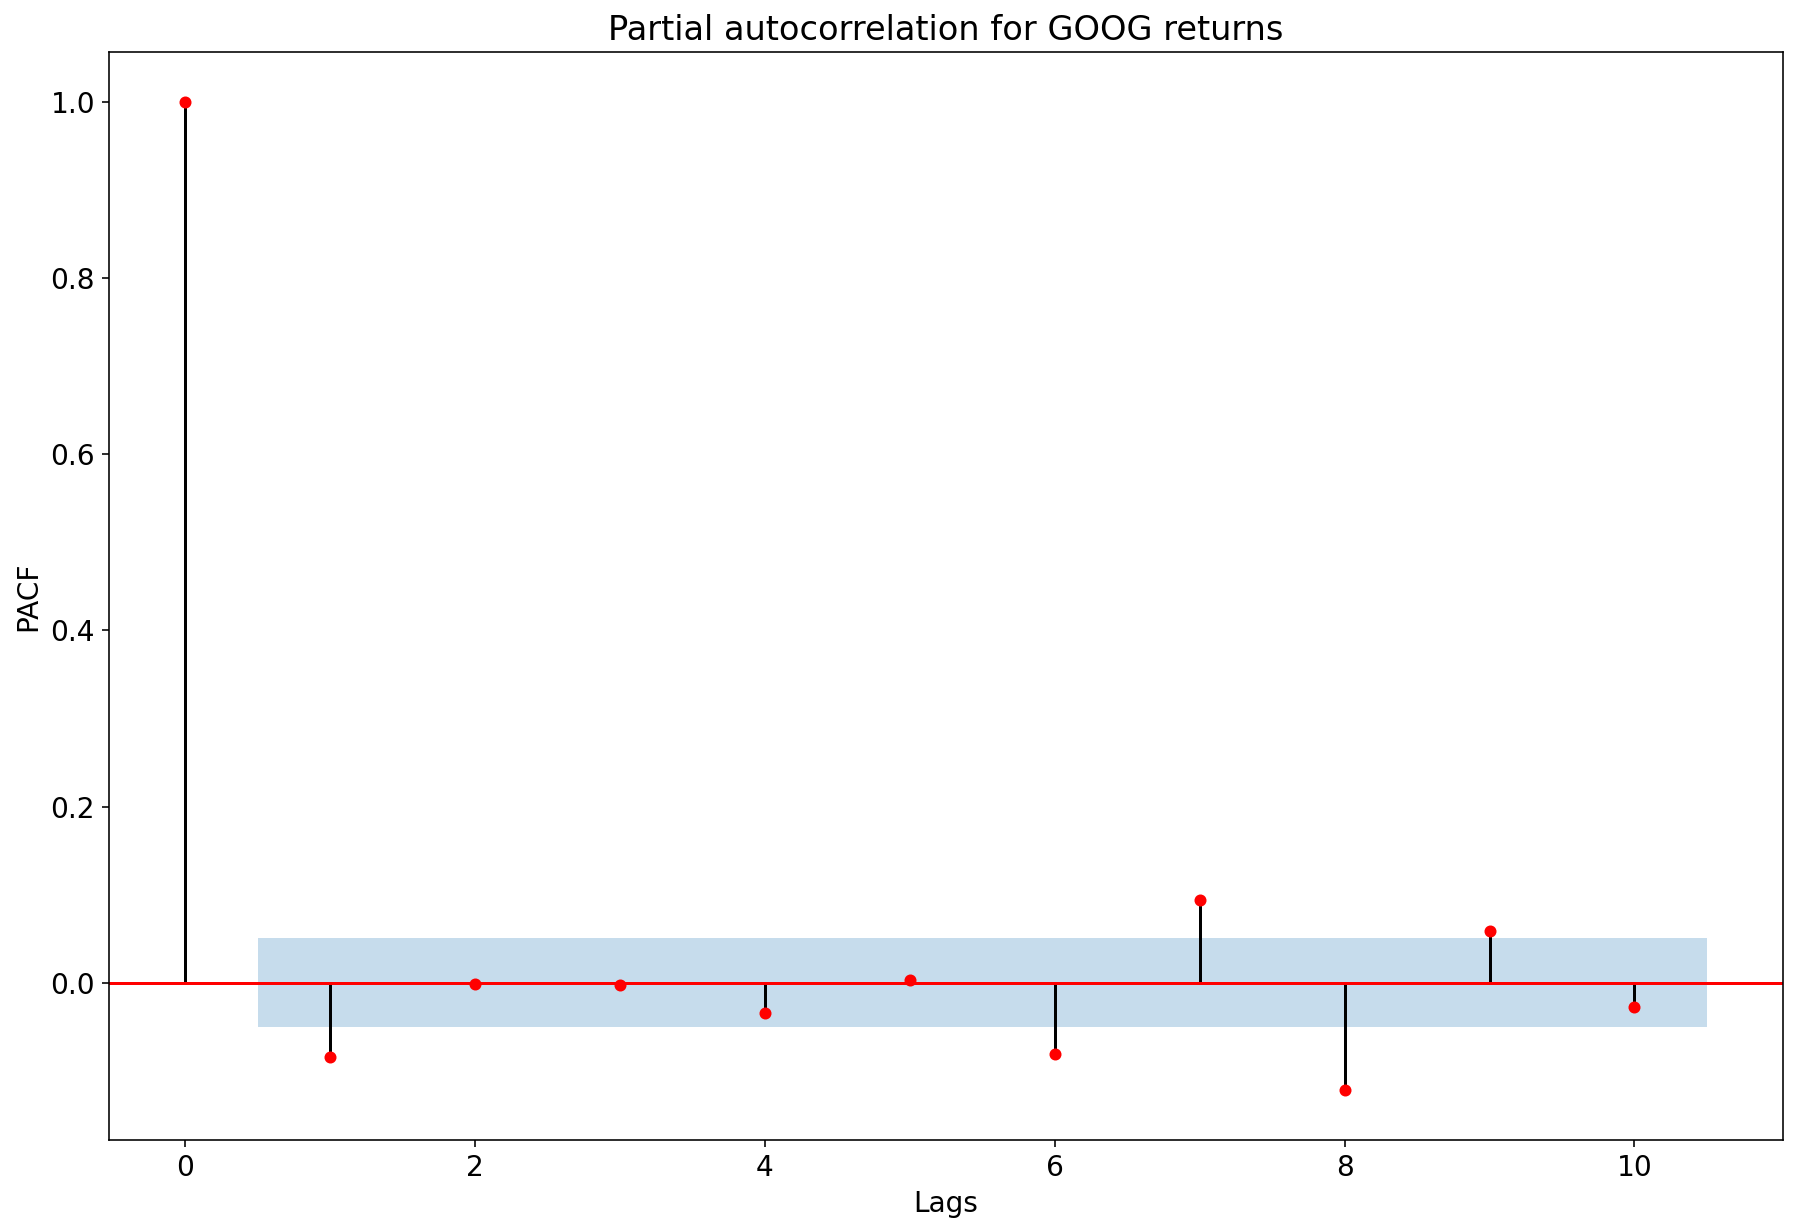

In [12]:
for stock in range(0, numberOfStocks):
  plot_pacf(stockReturns[stock],lags=10,color="red") # First 10 lags should be enough
  plt.title("Partial autocorrelation for {} returns".format(stockNames[stock])) 
  plt.xlabel("Lags") 
  plt.ylabel("PACF") 
  plt.show()

Finally, we observe the partial autocorrelation plots (PACF) of returns. This is important for determining if the data contains an [autoregressive](https://www.investopedia.com/terms/a/autoregressive.asp) term. The figures tell us that there are significant correlations between the first lags of the data (order of difference), followed by insignificant ones (most are within the shaded 5% significance limit). We conclude that there is an autoregressive term of [order 1](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/time-series/how-to/partial-autocorrelation/interpret-the-results/partial-autocorrelation-function-pacf/) in the data. This confirms its suitability for ARIMA modelling.

# ARIMA

We will be using the **auto_arima** model, which automatically finds optimum values of hyperparameters p, d, q such that the AIC is minimised.

## Data preprocessing

Order of differences and checking for stationarity.

In [13]:
def ARIMA_n_diffs(data):
  kpss_diffs = ndiffs(data, test='kpss')
  adf_diffs = ndiffs(data, test='adf')
  return max(adf_diffs, kpss_diffs) # Return most relevant of two
  
def ARIMA_isStationary(data):
  if ARIMA_n_diffs(data) < 1:
    return True
  else:
    return False

Split data into a time series. 

In [14]:
def ARIMA_splitData(data, split):
  train, val, test, b1, b2, b3 = splitData(data, split)
  train = train.transpose().squeeze() 
  val = val.transpose().squeeze()
  test = test.transpose().squeeze()
  return train, val, test, b1, b2, b3

Check for seasonality and remove it from the data. We use log returns for this method, since there are a range of [benefits](https://investmentcache.com/magic-of-log-returns-concept-part-1/) over using simple returns.

In [15]:
def ARIMA_logReturns(closePrices): # Data must be a time series
  global n_diffs # Important for building model later
  n_diffs = ARIMA_n_diffs(closePrices)
  closePriceLog = closePrices.apply(lambda x : np.log(x))
  logReturns = (closePrices - closePrices.shift(n_diffs)).dropna()
  return logReturns

## Model implementation

Building an **auto_arima** model.

In [16]:
def ARIMA_build(data):
  global arimaModel
  arimaModel = auto_arima(
    data,
    start_p = 0,
    start_q = 0,
    test = "adf",
    max_p = 3,
    max_q = 3, 
    m = 1, # Period for seasonal differencing
    d = n_diffs,
    seasonal = False, # Already removed it
    trace = True, # Spam
    stepwise = True,
    n_jobs = 1      
  )
  return arimaModel

Run the model on a dataset and output the predictions and associated error.

In [17]:
def ARIMA_runModel(train, test):
  train = train.values
  history = [x for x in train]
  predictions = []

  # For every timestep t in the test set
  for t in range(0, len(test)):
    model = ARIMA(history, order=arimaModel.order) # Invoke ARIMA model
    modelOutput = (model.fit(disp=0)).forecast() # Output from model fitting
    predVal = modelOutput[0]
    predictions.append(predVal) # Add prediction to list 
    history.append(test[t]) # Mark this timestep as done

  # Get metrics
  mae = MAE(test, predictions)
  mse = MSE(test, predictions)
  rmse = RMSE(test, predictions)
  mape = MAPE(test, predictions)  
  return mae, mse, rmse, mape, predictions

Plotting function.

In [18]:
def ARIMA_plot(train, test, pred): # Zoom in on test set and show predictions vs. actual data
  daysAfterSplit = np.arange(0, len(test))
  dateOfSplit = train.index[(len(train)) - 1]
  plt.rcParams['figure.figsize'] = [15, 10]
  plt.xlabel('Days since date of split, {}'.format(dateOfSplit.strftime("%d/%m/%Y")))
  plt.ylabel('Closing price ($)')
  plt.plot(daysAfterSplit, test, label = 'True data')
  plt.plot(daysAfterSplit, pred, label = 'ARIMA prediction')
  plt.legend()
  plt.show()

## Performance experiment

### Single stock

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6942.283, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=6792.194, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6940.284, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=6207.580, Time=0.25 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=6127.899, Time=0.41 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=6125.901, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=6205.582, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=1.98 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=1.01 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 9.725 seconds


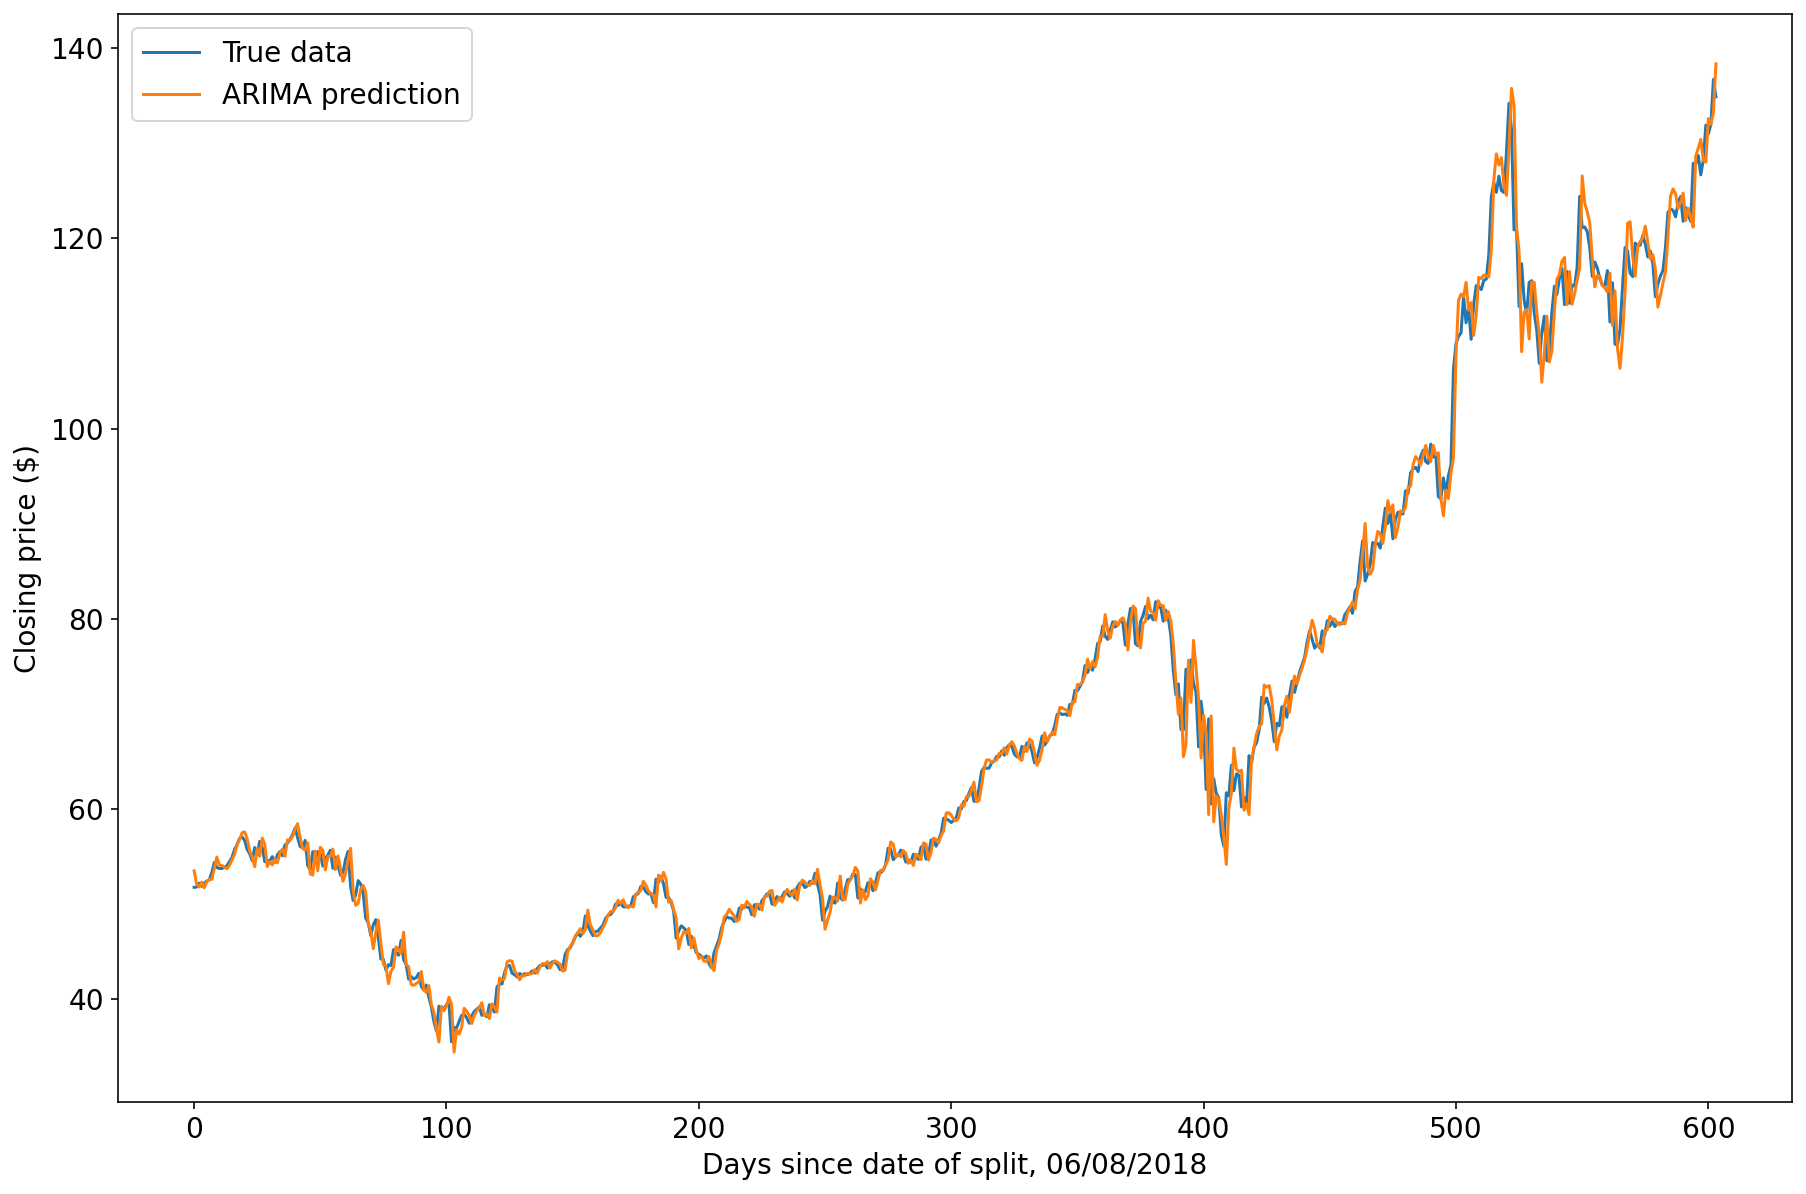

MAE=1.3182, MSE=4.2378, RMSE=2.0586, MAPE=0.01830%, execTime=102.98s


In [20]:
# Parameters
trainSplit = 0.6 # 60% training split
splitRatio = [trainSplit, 0, 1-trainSplit] # 0% validation, 40% test
stock = 2 # Chosen stock, will be an iteration variable later
timeStart = time.time() # Important for measuring computation time

# Implementation
timeStart = time.time() # Important for performance
logReturns = ARIMA_logReturns(stockClose[stock]) # Dataset to run model with
train, val, test, b1, b2, b3 = ARIMA_splitData(stockClose[stock], splitRatio) 
arimaModel = ARIMA_build(logReturns) # Build model
mae, mse, rmse, mape, predictions = ARIMA_runModel(train, test) # Run model 

# Viewing the fit and showing metrics
ARIMA_plot(train, test, predictions)
execTime = time.time() - timeStart

print("MAE={:.4f}, MSE={:.4f}, RMSE={:.4f}, MAPE={:.5f}%, execTime={:.2f}s".format(mae, mse, rmse, mape, execTime))

### All stocks

──────────────────────────────────────────────────
FB
──────────────────────────────────────────────────
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9264.942, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8732.518, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9262.942, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8616.192, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8474.003, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=8472.005, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8614.194, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=1.45 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=1.03 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 8.987 seconds


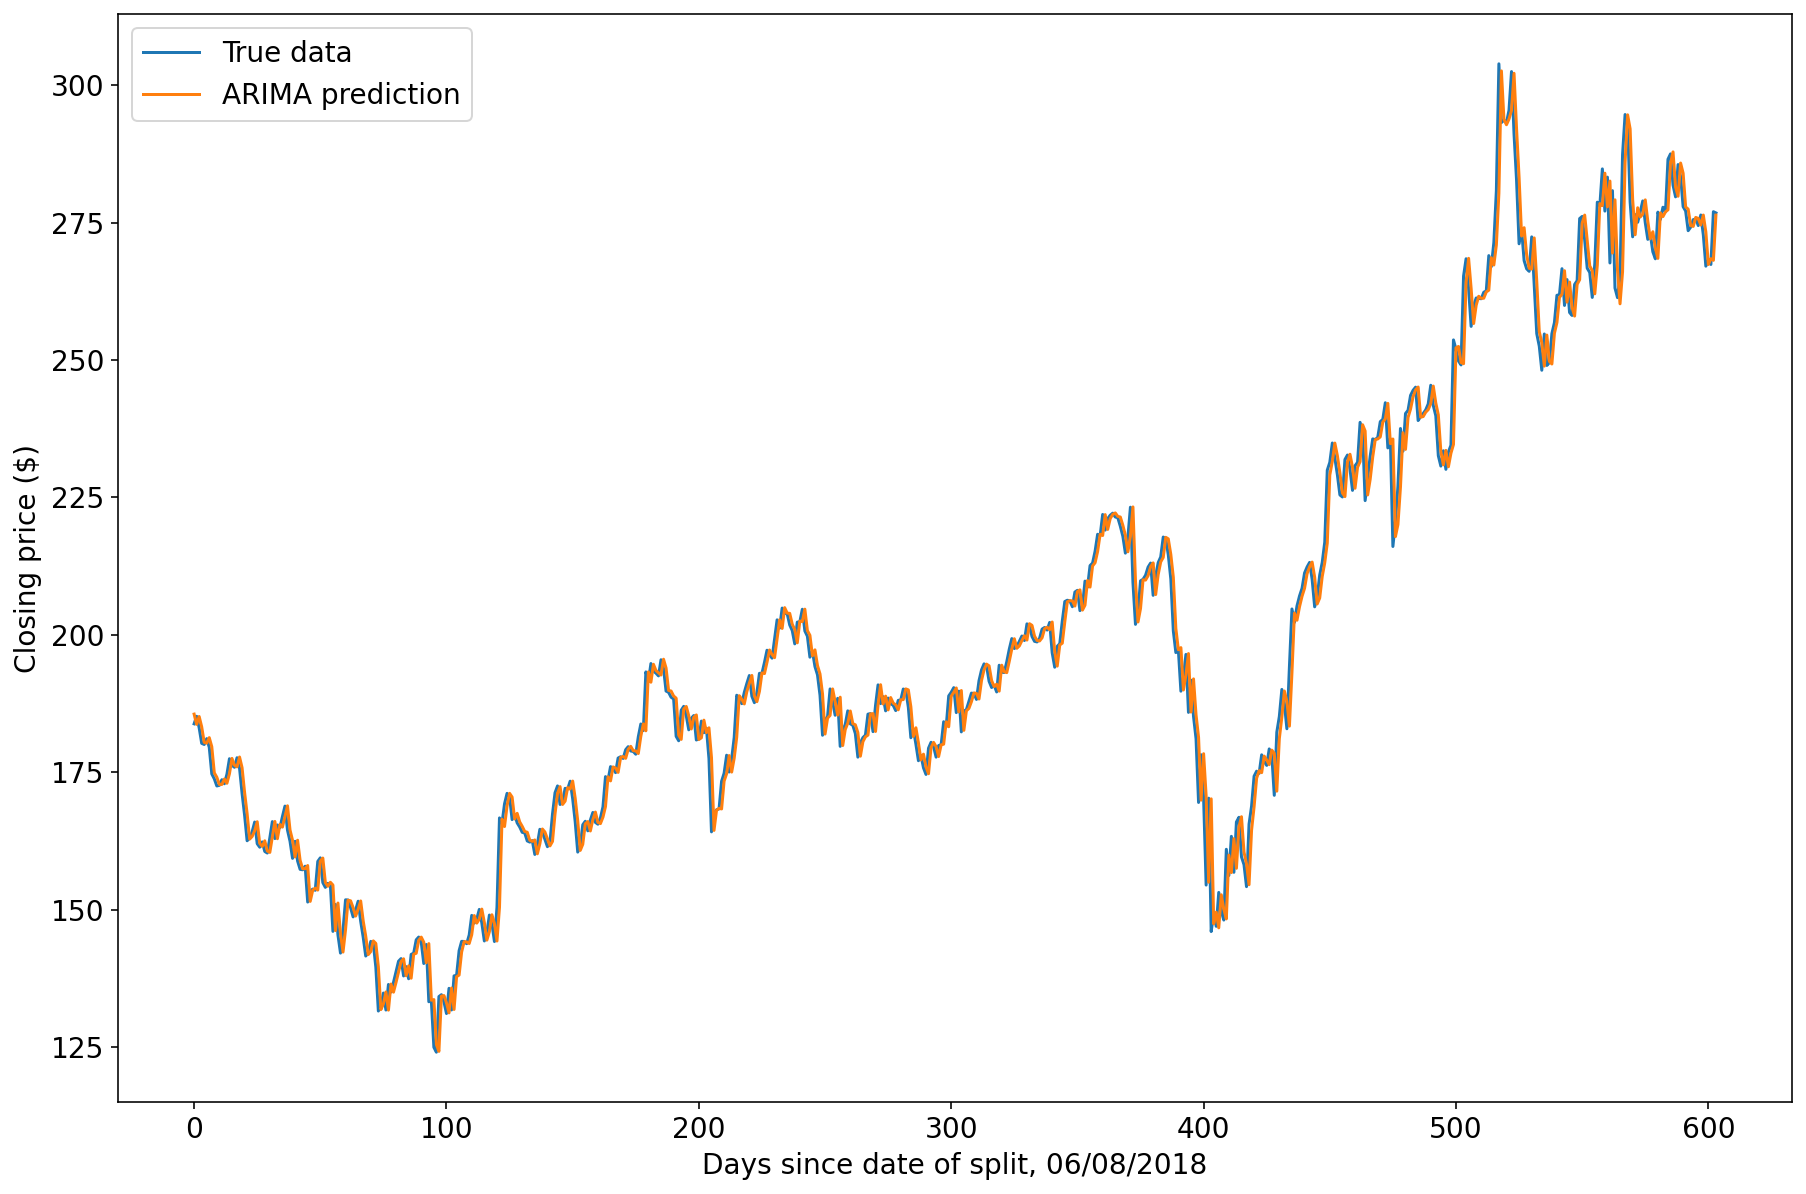

MAE=3.2168, MSE=22.0032, RMSE=4.6908, MAPE=0.01634%, execTime=37.26s
──────────────────────────────────────────────────
AMZN
──────────────────────────────────────────────────
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15937.322, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15415.424, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15935.322, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15298.881, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15166.239, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.95 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=15164.246, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=15296.888, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.87 sec

Best m

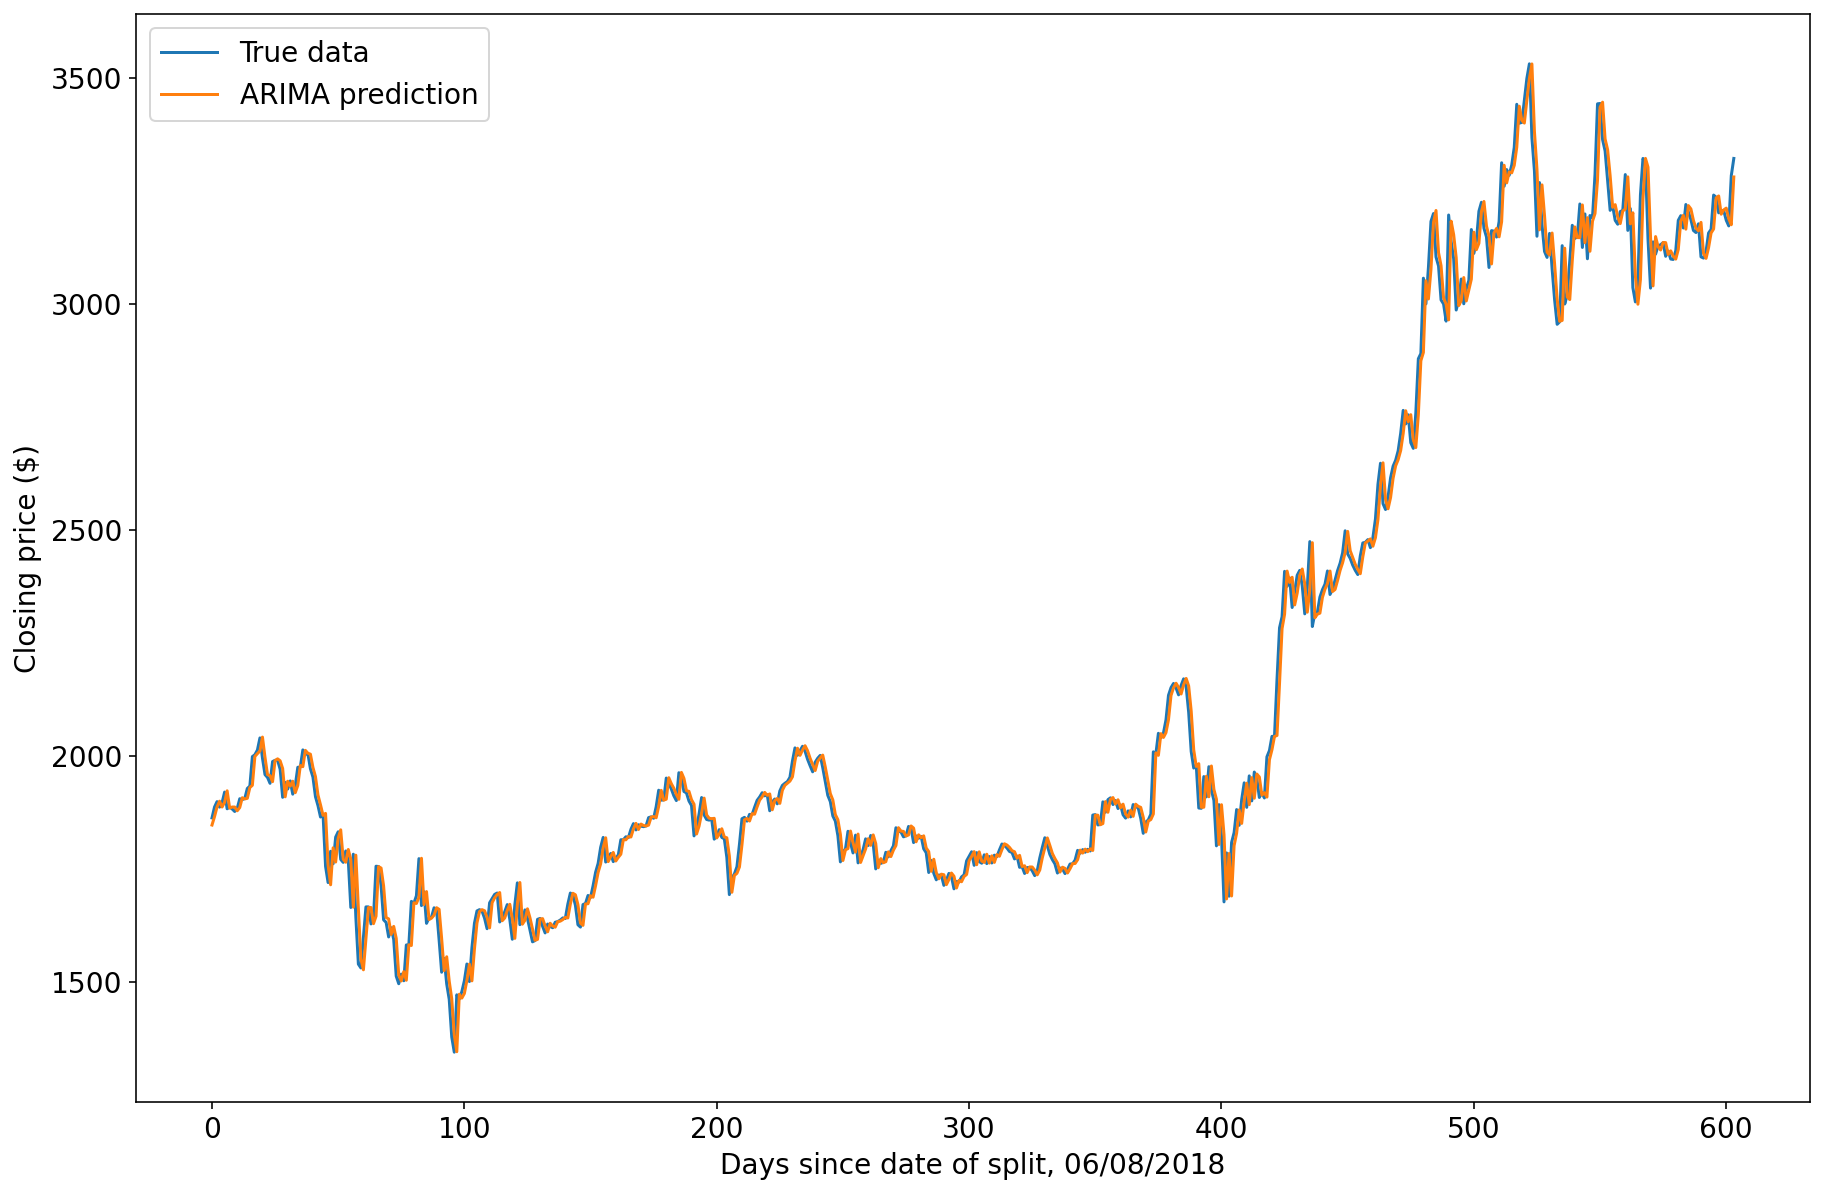

MAE=33.3348, MSE=2339.8125, RMSE=48.3716, MAPE=0.01537%, execTime=55.94s
──────────────────────────────────────────────────
AAPL
──────────────────────────────────────────────────
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6942.283, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=6792.194, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6940.284, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=6207.580, Time=0.27 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=6127.899, Time=0.41 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=6125.901, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=6205.582, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=1.97 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.97 sec

Best mode

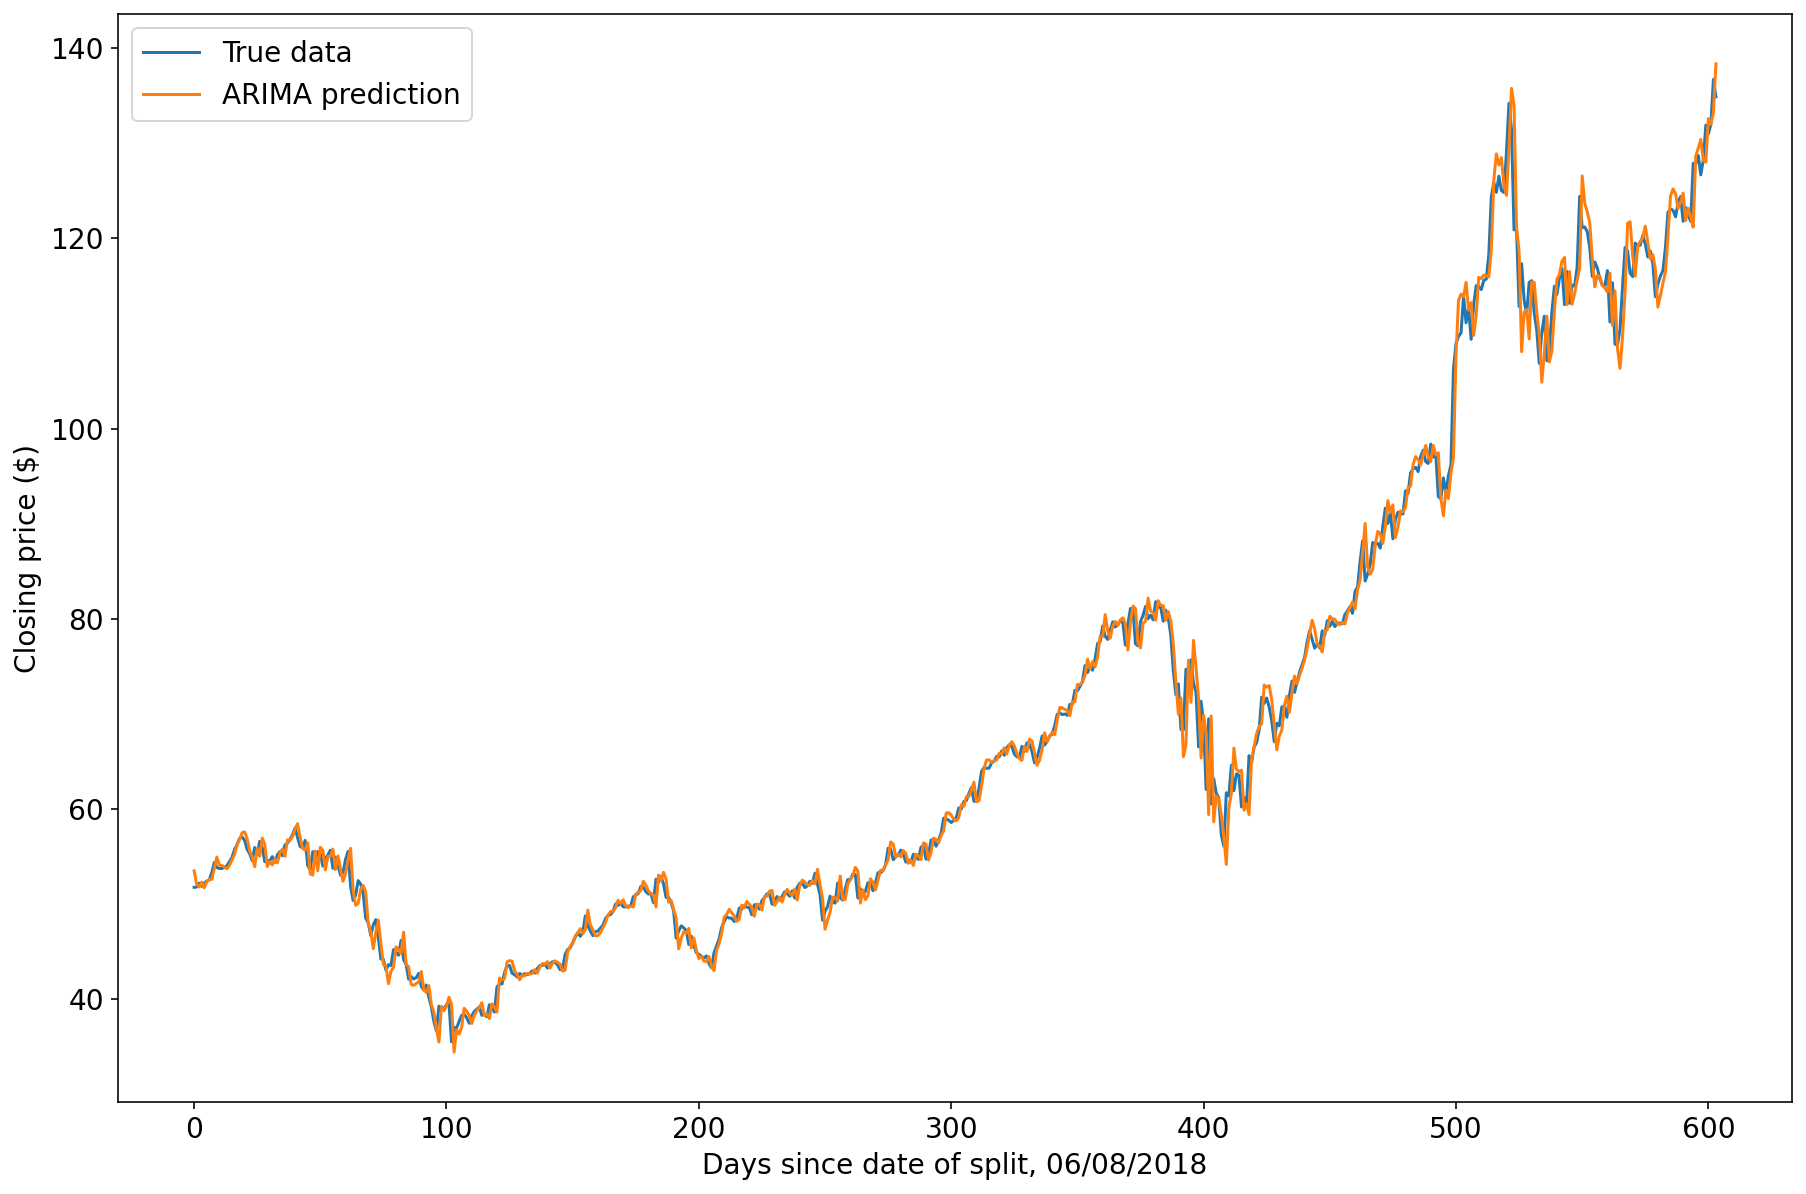

MAE=1.3182, MSE=4.2378, RMSE=2.0586, MAPE=0.01830%, execTime=103.26s
──────────────────────────────────────────────────
MSFT
──────────────────────────────────────────────────
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8145.299, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7341.078, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8143.299, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7046.900, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6970.105, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=6968.106, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7044.901, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.62 sec

Best model:  

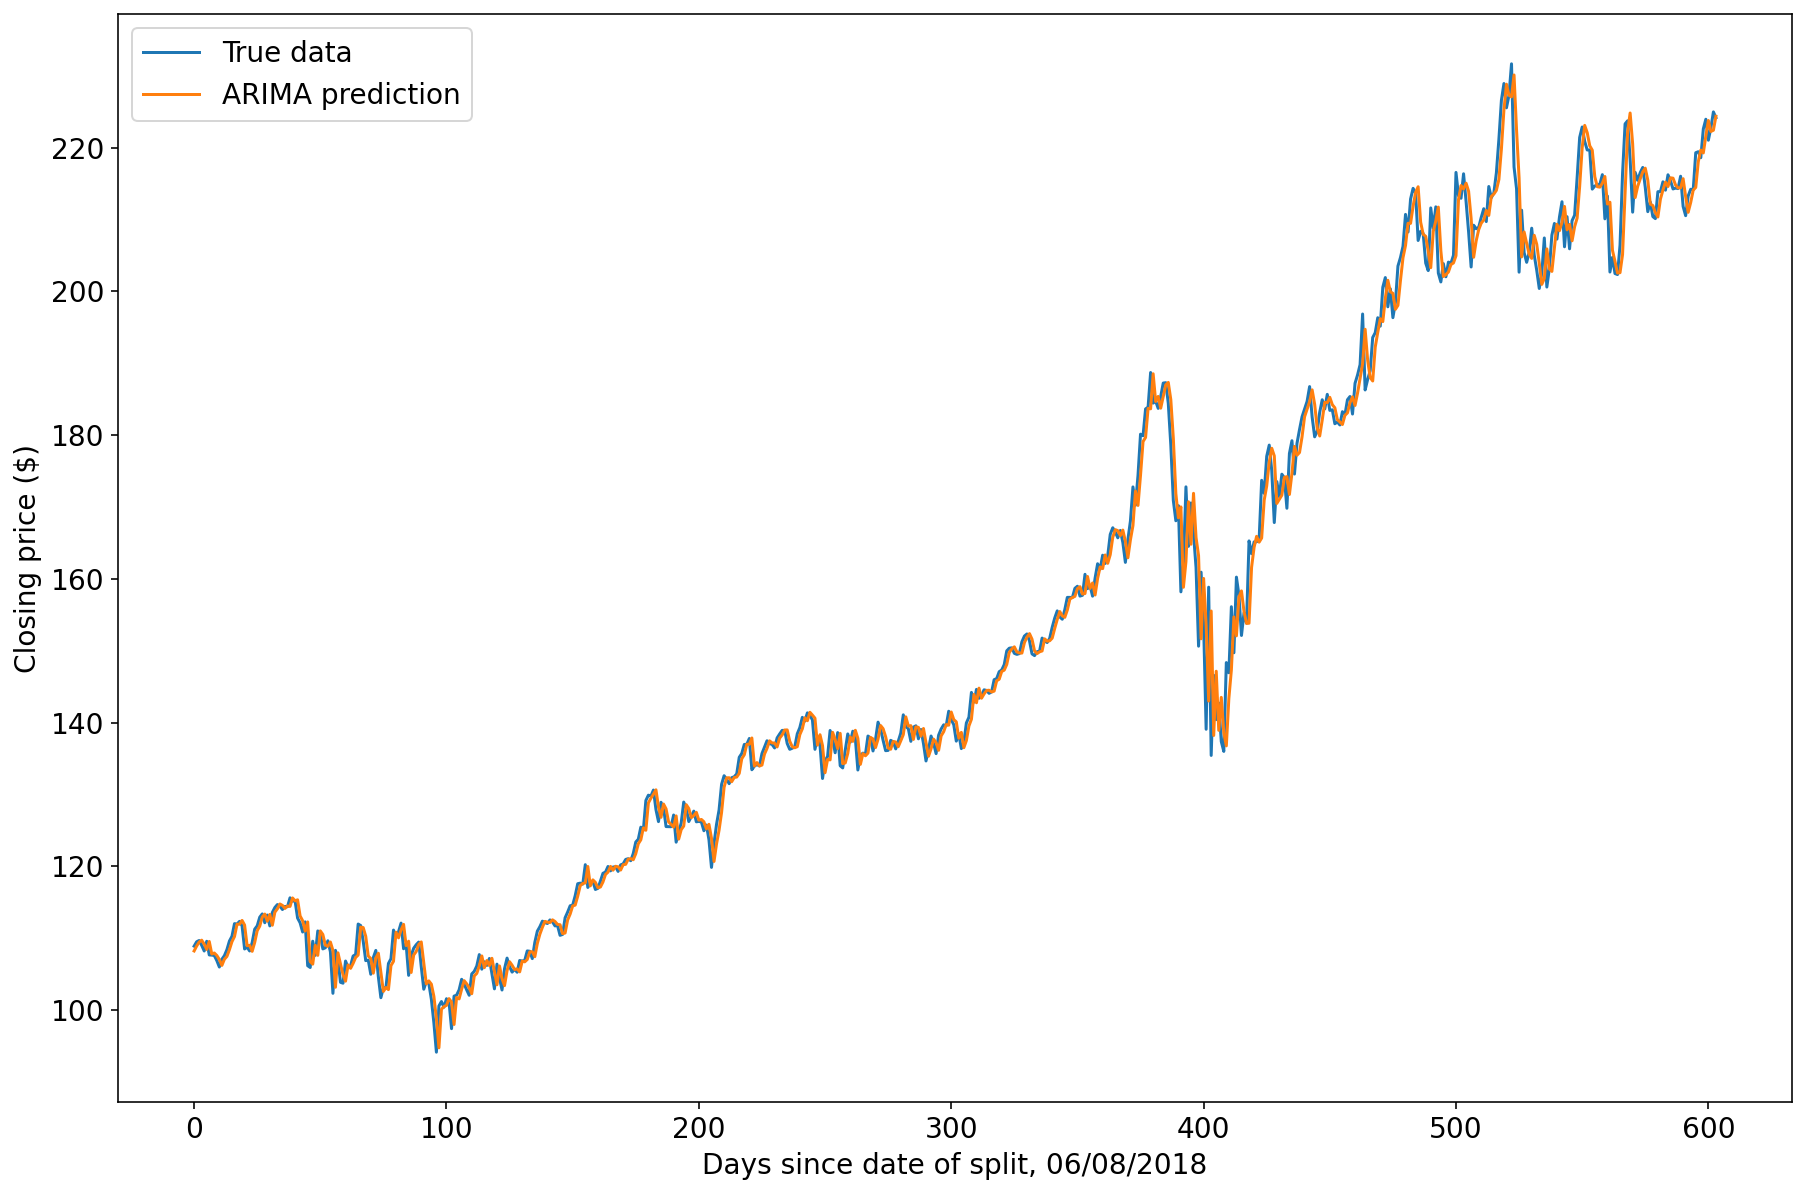

MAE=2.1468, MSE=10.7212, RMSE=3.2743, MAPE=0.01386%, execTime=39.81s
──────────────────────────────────────────────────
GOOG
──────────────────────────────────────────────────
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14292.510, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13716.148, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14290.510, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13504.110, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=13419.040, Time=0.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=13417.042, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=13502.111, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=1.38 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=1.23 sec

Best m

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



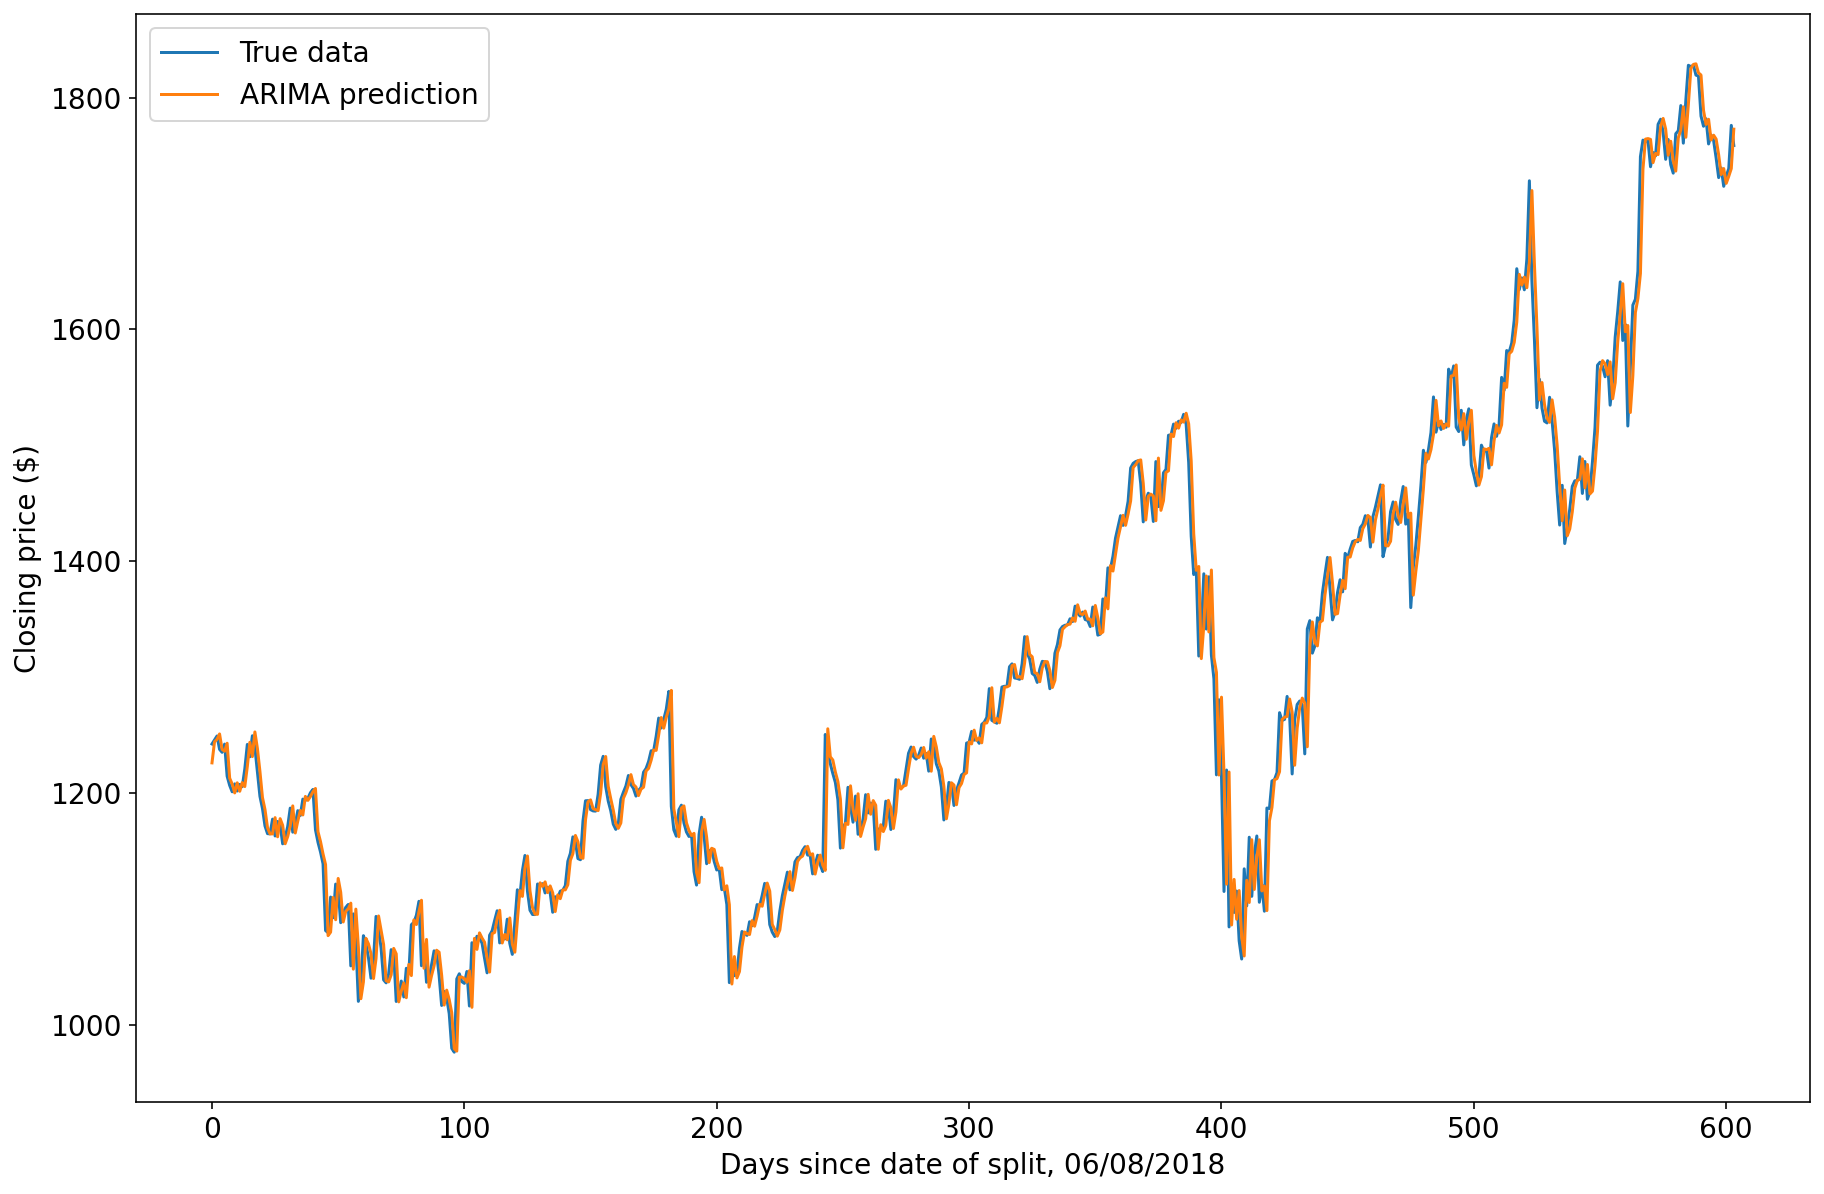

MAE=17.3403, MSE=646.0697, RMSE=25.4179, MAPE=0.01354%, execTime=53.79s


In [21]:
trainSplit = 0.6

mae_all_stocks = [None]*numberOfStocks
mse_all_stocks = [None]*numberOfStocks
rmse_all_stocks = [None]*numberOfStocks
mape_all_stocks = [None]*numberOfStocks
execTime_all_stocks = [None]*numberOfStocks

for stock in range(0, len(stockClose)):
  printHeader(stockNames[stock])

  splitRatio = [trainSplit, 0, 1-trainSplit] # No validation
  timeStart = time.time() # Important for measuring computation time

  logReturns = ARIMA_logReturns(stockClose[stock]) # Data to work with
  train, val, test, b1, b2, b3 = ARIMA_splitData(stockClose[stock], splitRatio) # Split the data
  arimaModel = ARIMA_build(logReturns) # Build model based on logReturns
  mae, mse, rmse, mape, predictions = ARIMA_runModel(train, test) # Run model for each timestep
  execTime = time.time() - timeStart

  mae_all_stocks[stock] = mae
  mse_all_stocks[stock] = mse
  rmse_all_stocks[stock] = rmse
  mape_all_stocks[stock] = mape
  execTime_all_stocks[stock] = execTime

  ARIMA_plot(train, test, predictions)
  print("MAE={:.4f}, MSE={:.4f}, RMSE={:.4f}, MAPE={:.5f}%, execTime={:.2f}s".format(mae, mse, rmse, mape, execTime))

We can combine the metrics for all five stocks to give an average performance. We will run a test on the same data with the LSTM model later.

In [31]:
print("ARIMA performance for the FAAMG group:")
print("Averages for MAE={:.5f}, MSE={:.5f}, RMSE={:.5f}, MAPE={:.5f}% and execTime={:.3f}s".format(np.mean(mae_all_stocks), np.mean(mse_all_stocks),np.mean(rmse_all_stocks),np.mean(mape_all_stocks),np.mean(execTime_all_stocks)))

ARIMA performance for the FAAMG group:
Averages for MAE=11.47140, MSE=604.56885, RMSE=16.76263, MAPE=0.01548% and execTime=58.011s


### Hyperparameter optimisation

A note on the **hyperparameter optimisation**: since the **auto_arima** method was used, the optimal values of p, d, and q (the autoregressive order, degree of differencing, and the moving average order) were automatically found by the model. The setting *trace=True* within *ARIMA_build* results in the trial variables being shown in the console. 

Each unique combination of trial variables represents a trial candidate for a model. All possible combinations (from the user defined start and end) are tried such that the [AIC](https://towardsdatascience.com/introduction-to-aic-akaike-information-criterion-9c9ba1c96ced) is minimised. A smaller AIC generally implies a [better](https://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/) model in terms of convergence and accuracy. 

In almost all cases, the ARIMA function with the values (3, 1, 0) for (p, d, and q) respectively was chosen as the best performing model, with the exception of (3, 2, 0) in some of the other stocks.

The **AIC** can be related to p, d, and q by the following formula for a non-seasonal ARIMA model:

$\mathrm{AIC}=-2 \log (L)+2(p+q+k)$

Where the new variables introduced are *L*, the likelihood of the data and *k*, the intercept of the model.

# LSTM

The LSTM is an RNN which can process entire sequences of data. This makes it an interesting candidate for the task of time series forecasting. We will be using **TensorFlow** and **Keras** for this model, and investigating the gains in performance by using a GPU runtime over the standard CPU one. One of the key advantages of ANNs is how they contain multiple processes that can be adapted for GPU calculation.

## Data preprocessing

Normalise dataset with a chosen scaler i.e. MinMax.

In [22]:
def LSTM_normalise(scaler, data):
  return scaler.fit_transform(data)

Convert any time series into supervised-suitable learning dataset, with n=1 features. 

[Adapted from the Jason Brownlee method](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/)

In [23]:
def LSTM_supervised(data, dropNan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()

	# Input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	
  # Forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	# Combine the two
	agg = concat(cols, axis=1)
	agg.columns = names

	# Drop rows with NaN values
	if dropNan:
		agg.dropna(inplace=True)
	return agg

Scale and reshape data into a Keras LSTM format.


In [24]:
def LSTM_reshape(data, n_vars = 1):
  values = data.values

  # Split into x and y sets
  x, y = values[:,:-1], values[:,-1]

  # Reshape into 3D tensor format
  x = np.reshape(x, (x.shape[0], n_in, n_vars))
  return x, y

Combine above steps in an orderly fashion, on a single dataset input.

In [25]:
def LSTM_splitAndProcess(data, split):
  
  # Split the data into training, validation and test datasets
  train, val, test, b1, b2, b3 = splitData(data, split)

  # Step 1 - Normalise
  scaler = MinMaxScaler(feature_range = (0, 1)) 
  n_train = LSTM_normalise(scaler, train)
  n_val = LSTM_normalise(scaler, val)
  n_test = LSTM_normalise(scaler, test)

  # Step 2 - Convert to supervised learning dataset
  s_train = LSTM_supervised(n_train)
  s_val = LSTM_supervised(n_val) 
  s_test = LSTM_supervised(n_test)

  # Step 3 - Reshape the dataset 
  x_train, y_train = LSTM_reshape(s_train)
  x_val, y_val = LSTM_reshape(s_val)
  x_test, y_test = LSTM_reshape(s_test)
  
  return scaler, x_train, y_train, x_val, y_val, x_test, y_test

An important note: where undefined in the function, either by a parameter or as a local variable, please assume that the variable is instead a global one. These global variables may change throughout the program for different use cases.

## Model implementation

Redefine MAPE, because the in-built function does not give sensible readings.

In [26]:
def MAPE(true,pred): 
  true = np.asarray(true)
  pred = np.asarray(pred)
  return np.mean(np.abs((true - pred) / true)) * 100

Specify the blueprint of a [hypermodel](https://keras.io/api/keras_tuner/hypermodels/). This will be used by the Keras tuner to find optimum hyperparameters. 

In [27]:
def LSTM_buildModel(hp):

  model = Sequential() # Initialise a plain stack of layers  
  
  #if tensorflow.test.gpu_device_name() == '':
  if isGPU == True: # Run an adjusted version if a GPU is running
    model.add(LSTM(
        units=n_neurons, 
        input_shape=(x_train.shape[1], 1)
        )
    )
  else:
    activation = hp.Choice('activation', ['relu', 'tanh', 'linear', 'selu', 'elu' ])
    recurrent_dropout = hp.Float( 'recurrent_dropout', min_value=0.0, max_value=0.99, default=0.2)
    model.add(LSTM(
        units=n_neurons, 
        activation=activation, 
        recurrent_dropout =recurrent_dropout,
        input_shape=(x_train.shape[1], 1)
        )
    )
  model.add(Dense(1)) # Format data to layer

  model.compile(
      optimizer=keras.optimizers.Adam(
      hp.Float(
          
        'learning_rate',
        min_value=1e-10,
        max_value=1e-2,
        sampling='LOG',
        default=1e-6
        ),
      ),
      loss=tensorflow.losses.MeanSquaredError(), # Loss to compare models by
      metrics=[tensorflow.metrics.MeanAbsoluteError()] # Weighted loss      
  )
  return model

Fit the network to the data.

In [28]:
def LSTM_fitModel(data, split, n_epochs, n_trials):
  global x_train, y_train, x_val, y_val, x_test, y_test, model, p_train, p_val, p_test
  timeStart = time.time()

  # Processing
  scaler, x_train, y_train, x_val, y_val, x_test, y_test = LSTM_splitAndProcess(data, split)

  # Optimisation setup
  bayesOptTuner = BayesianOptimization( 
    LSTM_buildModel, 
    objective="val_loss",
    max_trials=n_trials,
    executions_per_trial=1,
    directory=os.path.normpath('C:/keras_tuning'),
    project_name='kerastuner_bayesian_poc',
    overwrite=True
  )
  earlyStop = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6) 
  bayesOptTuner.search(x_train, y_train, epochs = n_epochs, 
                       validation_data = (x_val, y_val),
                       validation_split = split[1],
                       verbose = int(showConsoleOutput), 
                       callbacks = [earlyStop]
                       )
  bayesOptBest = bayesOptTuner.get_best_models(num_models=1) 
  model = bayesOptBest[0]

  # Get predictions
  p_train = model.predict(x_train) # Fitting model to data
  p_val = model.predict(x_val)
  p_test = model.predict(x_test)

  # Plot data
  daysAfterSplit = np.arange(0, len(y_test))
  dateOfSplit = data.index[(len(x_train)) - 1]
  plt.rcParams['figure.figsize'] = [15, 10]
  plt.plot(y_test, label='True data')
  plt.plot(p_test, label='LSTM prediction')
  plt.ylabel('Price ($)')
  plt.xlabel('Days since date of split, {}'.format(dateOfSplit.strftime("%d/%m/%Y")))
  plt.legend()
  plt.show()

  # Metrics
  # Note: will not be able to use standard metrics due to very small values present (division by zero)
  # Reverse the MinMax scaler to get consistent data for metrics comparison
  try:
    p_train = scaler.inverse_transform(p_train)
    y_train = scaler.inverse_transform([y_train])
    p_val = scaler.inverse_transform(p_val)
    y_val = scaler.inverse_transform([y_val])
    p_test = scaler.inverse_transform(p_test)
    y_test = scaler.inverse_transform([y_test])
  except ValueError:
    p_train = p_train[:,:,0]
    p_val = p_val[:,:,0]
    p_test = p_test[:,:,0]
    p_train = scaler.inverse_transform(p_train)
    y_train = scaler.inverse_transform([y_train])
    p_val = scaler.inverse_transform(p_val)
    y_val = scaler.inverse_transform([y_val])
    p_test = scaler.inverse_transform(p_test)
    y_test = scaler.inverse_transform([y_test])

  mae = MAE(y_test[0], p_test[:, 0])
  mse = MSE(y_test[0], p_test[:, 0])
  rmse = RMSE(y_test[0], p_test[:, 0])
  mape = MAPE(y_test[0], p_test[:, 0])
  execTime = time.time() - timeStart

  return mae, mse, rmse, mape, execTime

## Performance experiment

### CPU runtime

Evaluating the LSTM for a single stock.

Trial 3 Complete [00h 01m 24s]
val_loss: 0.0006167953833937645

Best val_loss So Far: 0.0006167953833937645
Total elapsed time: 00h 05m 54s
INFO:tensorflow:Oracle triggered exit


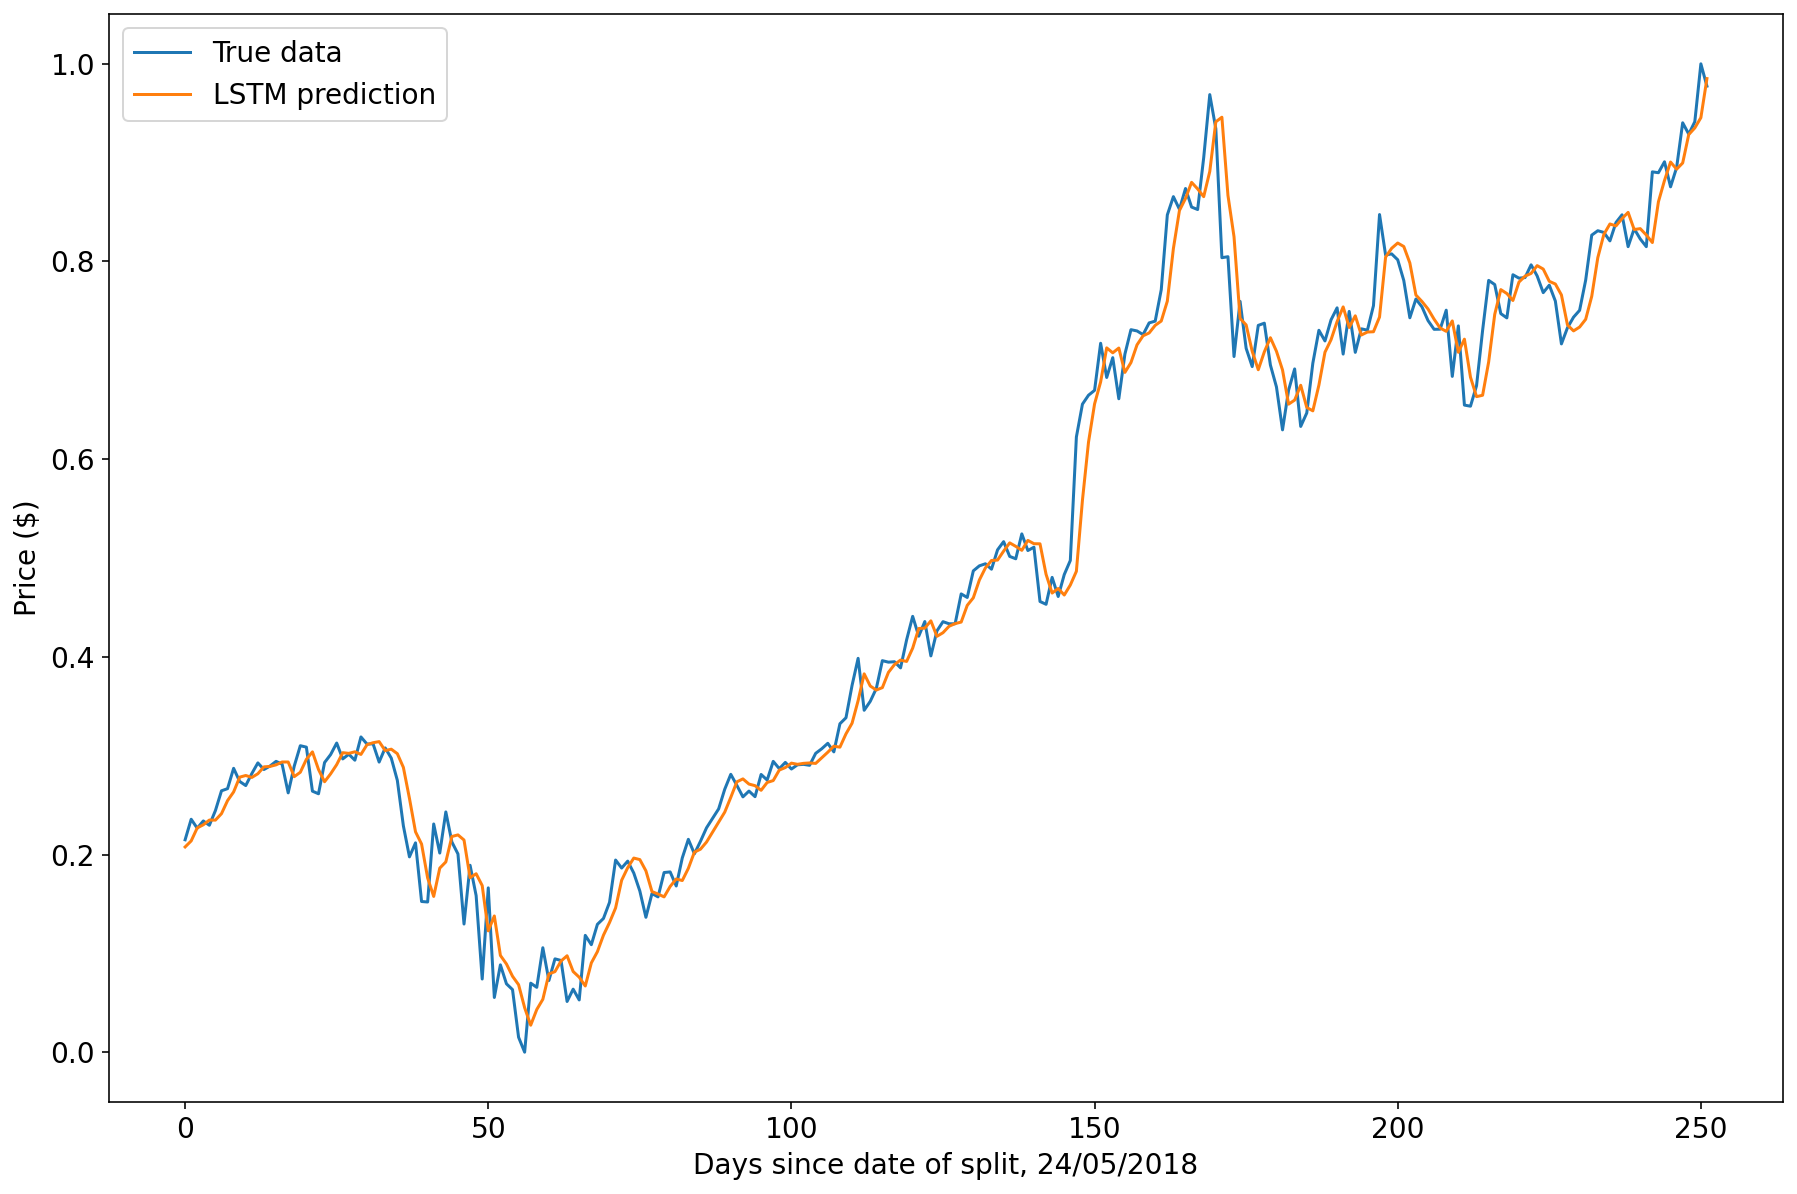

Important parameters: 
Stock analysed: AAPL
Batch size = 50
Epochs = 50
Neurons = 64
Training split 60.0%
Validation split 20.0%
Testing split 20.0%

Metrics:
MAE=1.91132
MSE=7.34491
RMSE=2.71015
MAPE=2.08542%
execTime=415.24s


In [35]:
isGPU = False
showConsoleOutput = True

trainSplit = 0.6
stock = 2
n_in = 50 # Batch size
n_out = 1 # Outputs
n_feat = 1 # Features i.e. 'Close'
n_epochs = 50 # Number of epochs 
n_neurons = 64 # Number of neurons 
n_trials = 3 
splitRatio = [trainSplit, (1-trainSplit)/2, (1-trainSplit)/2]
mae, mse, rmse, mape, execTimeCPU = LSTM_fitModel(stockClose[stock], splitRatio, n_epochs, n_trials)
print("Important parameters: \nStock analysed: {}\nBatch size = {}\nEpochs = {}\nNeurons = {}\nTraining split {}%\nValidation split {}%\nTesting split {}%".format(stockNames[stock], n_in, n_epochs, n_neurons, trainSplit*100, ((1-trainSplit)/2)*100,((1-trainSplit)/2)*100))
print("")
print("Metrics:\nMAE={:.5f}\nMSE={:.5f}\nRMSE={:.5f}\nMAPE={:.5f}%\nexecTime={:.2f}s".format(mae, mse, rmse, mape, execTimeCPU))

### GPU acceleration

**Please note:** the runtime will now need to be switched to a GPU, and the previous sections (excluding CPU runtime) and setup will need to be re-run again. The CPU runtime cell will also have to be run again for performance comparison.

#### Single stock

Trial 3 Complete [00h 00m 11s]
val_loss: 0.00047602152335457504

Best val_loss So Far: 0.00047602152335457504
Total elapsed time: 00h 00m 33s
INFO:tensorflow:Oracle triggered exit


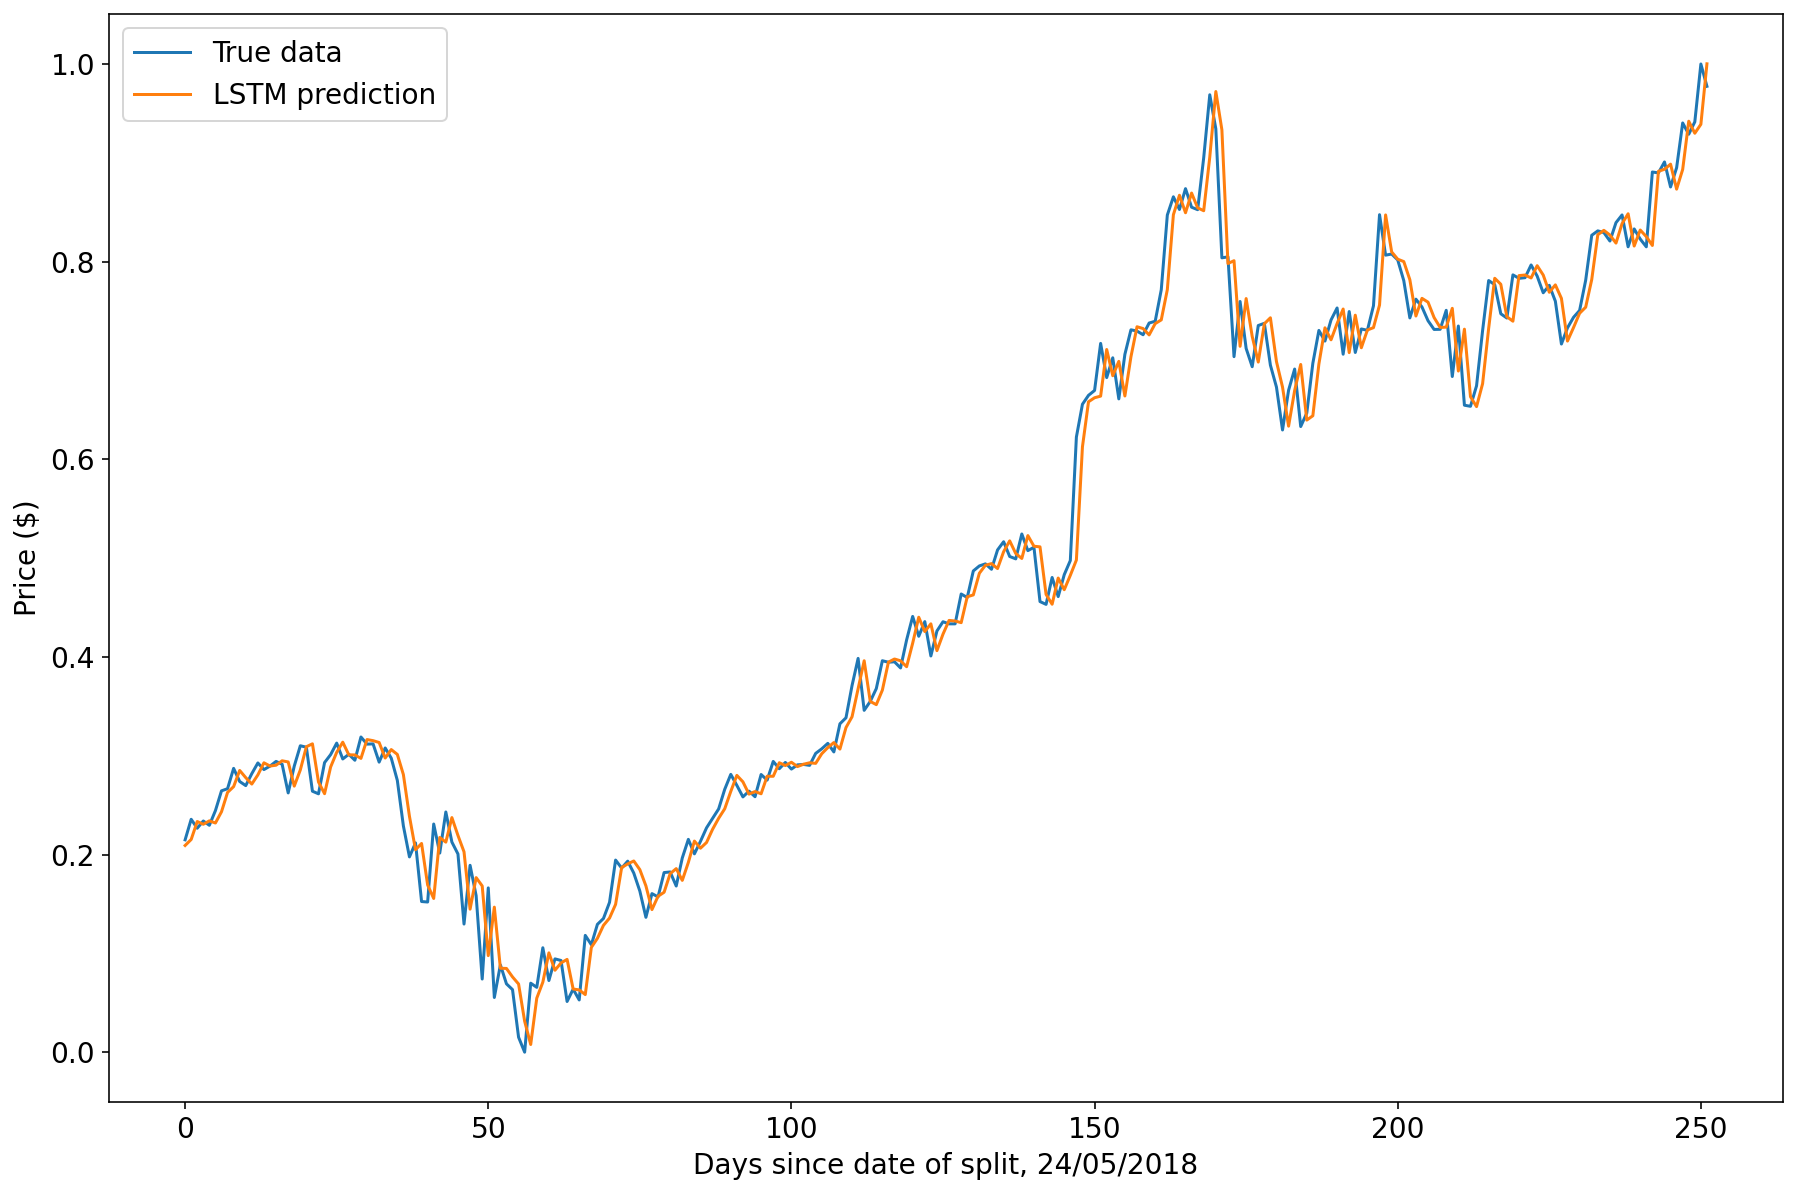

Important parameters: 
Stock analysed: AAPL
Batch size = 50
Epochs = 50
Neurons = 64
Training split 60.0%
Validation split 20.0%
Testing split 20.0%

Metrics:
MAE=1.81755
MSE=6.46691
RMSE=2.54301
MAPE=1.97878%
execTime=35.14s


In [36]:
isGPU = True
showConsoleOutput = True

trainSplit = 0.6
stock = 2
n_in = 50 # Batch size
n_out = 1 # Outputs
n_feat = 1 # Features i.e. 'Close'
n_epochs = 50 # Number of epochs 
n_neurons = 64 # Number of neurons 
n_trials = 3 
splitRatio = [trainSplit, (1-trainSplit)/2, (1-trainSplit)/2]
mae, mse, rmse, mape, execTimeGPU = LSTM_fitModel(stockClose[stock], splitRatio, n_epochs, n_trials)
print("Important parameters: \nStock analysed: {}\nBatch size = {}\nEpochs = {}\nNeurons = {}\nTraining split {}%\nValidation split {}%\nTesting split {}%".format(stockNames[stock], n_in, n_epochs, n_neurons, trainSplit*100, ((1-trainSplit)/2)*100,((1-trainSplit)/2)*100))
print("")
print("Metrics:\nMAE={:.5f}\nMSE={:.5f}\nRMSE={:.5f}\nMAPE={:.5f}%\nexecTime={:.2f}s".format(mae, mse, rmse, mape, execTimeGPU))

In [37]:
# For an evaluation with the same parameters...
print("For evaluation with the same data and parameters, the difference in execution time is {:.2f}s".format((execTimeCPU - execTimeGPU)))
print("The GPU-accelerated LSTM ran {:.2f}% faster than the CPU runtime version.".format((execTimeCPU/execTimeGPU)*100))

For evaluation with the same data and parameters, the difference in execution time is 380.11s
The GPU-accelerated LSTM ran 1181.76% faster than the CPU runtime version.


#### All stocks

──────────────────────────────────────────────────
FB
──────────────────────────────────────────────────
INFO:tensorflow:Oracle triggered exit


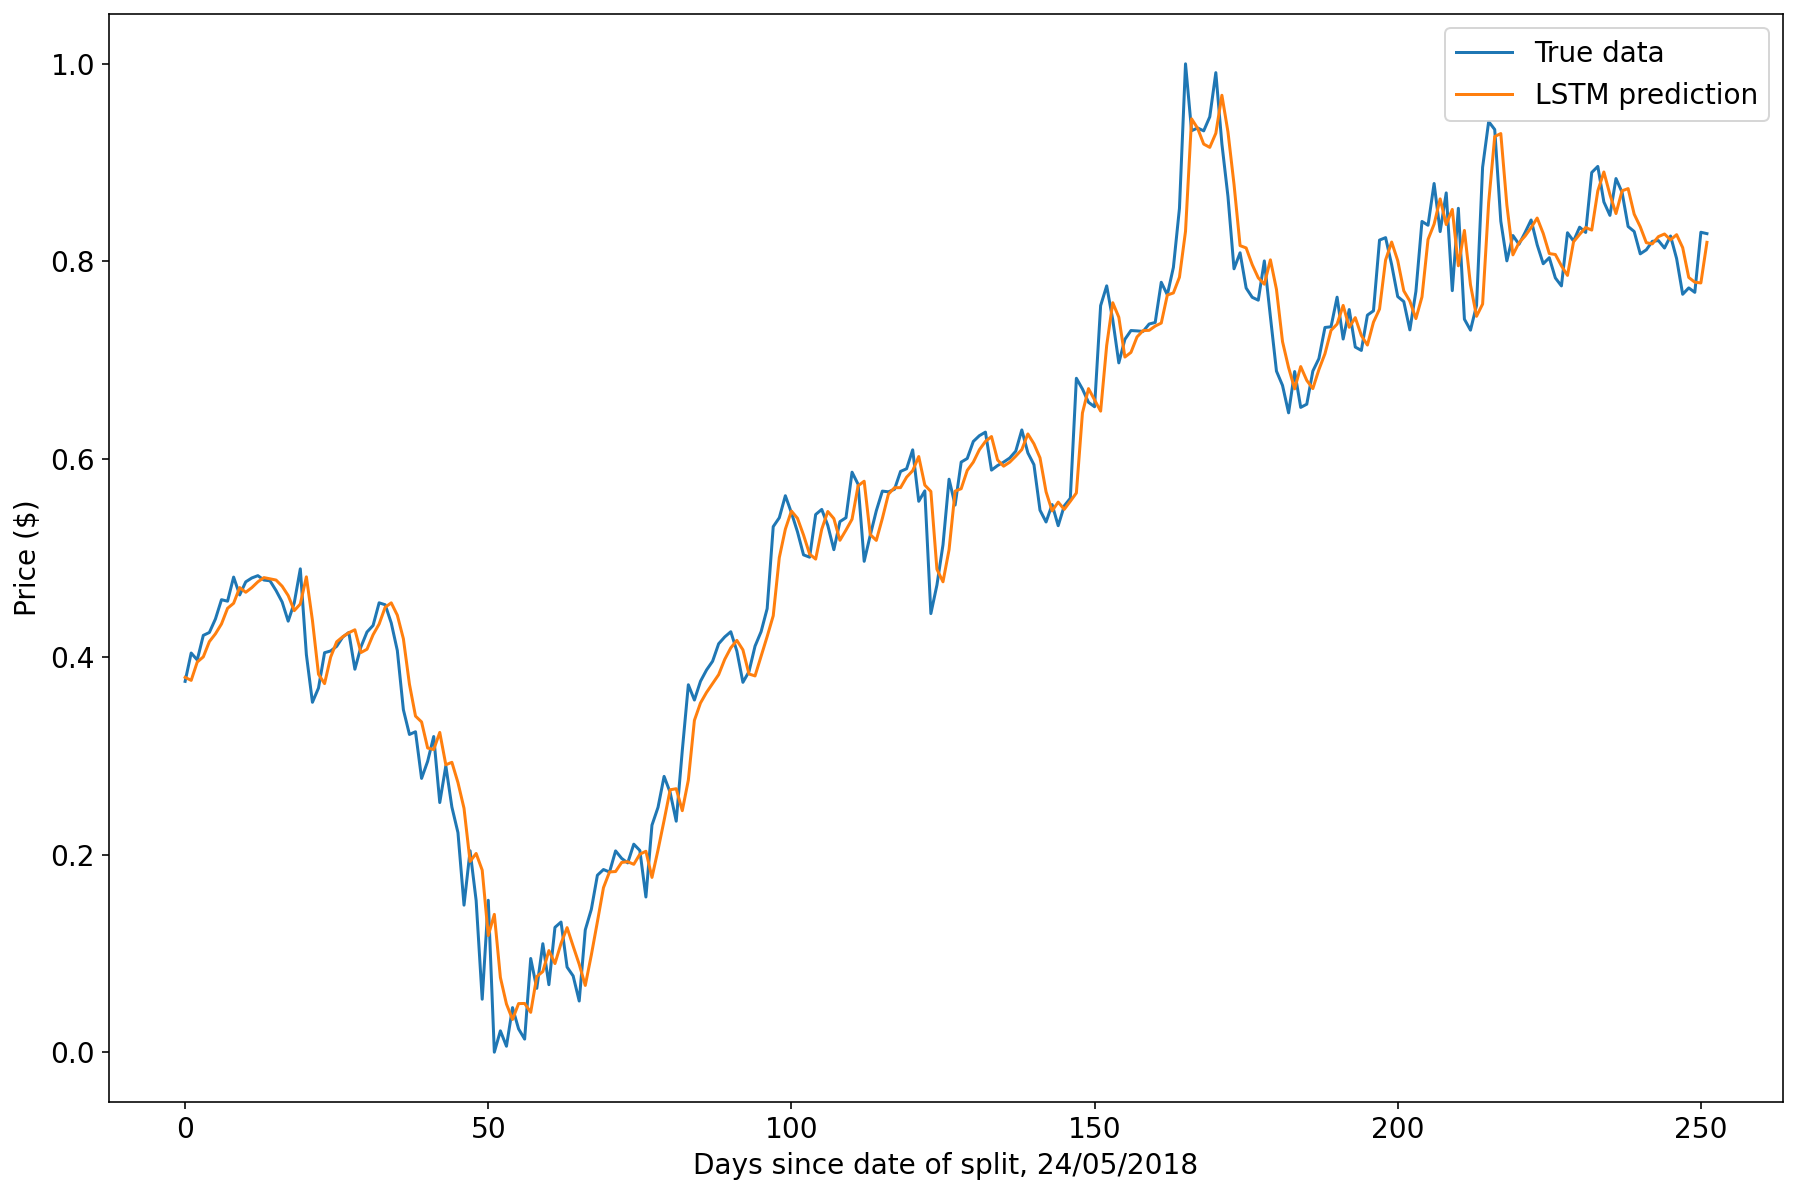

Important parameters: 
Stock analysed: FB
Batch size = 50
Epochs = 50
Neurons = 64
Training split 60.0%
Validation split 20.0%
Testing split 20.0%
──────────────────────────────────────────────────
AMZN
──────────────────────────────────────────────────
INFO:tensorflow:Oracle triggered exit


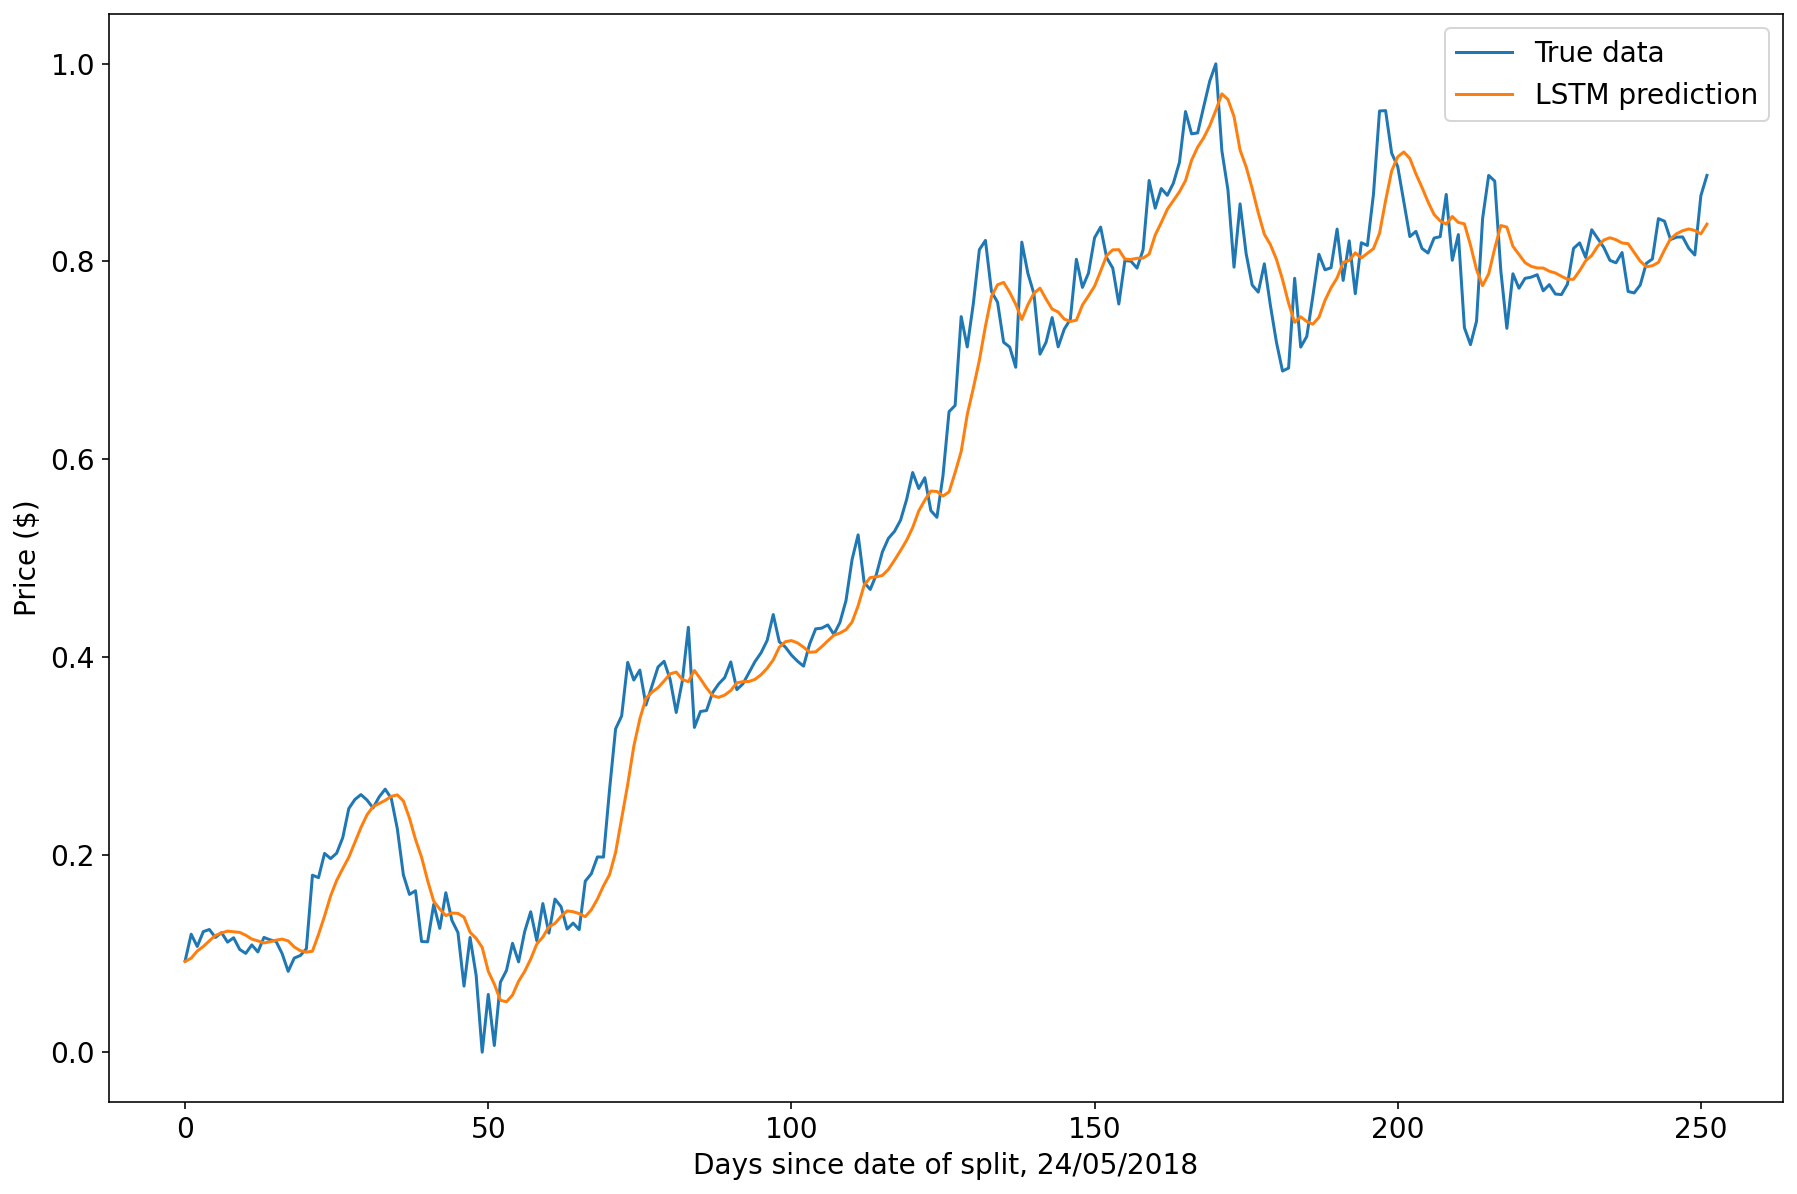

Important parameters: 
Stock analysed: AMZN
Batch size = 50
Epochs = 50
Neurons = 64
Training split 60.0%
Validation split 20.0%
Testing split 20.0%
──────────────────────────────────────────────────
AAPL
──────────────────────────────────────────────────
INFO:tensorflow:Oracle triggered exit


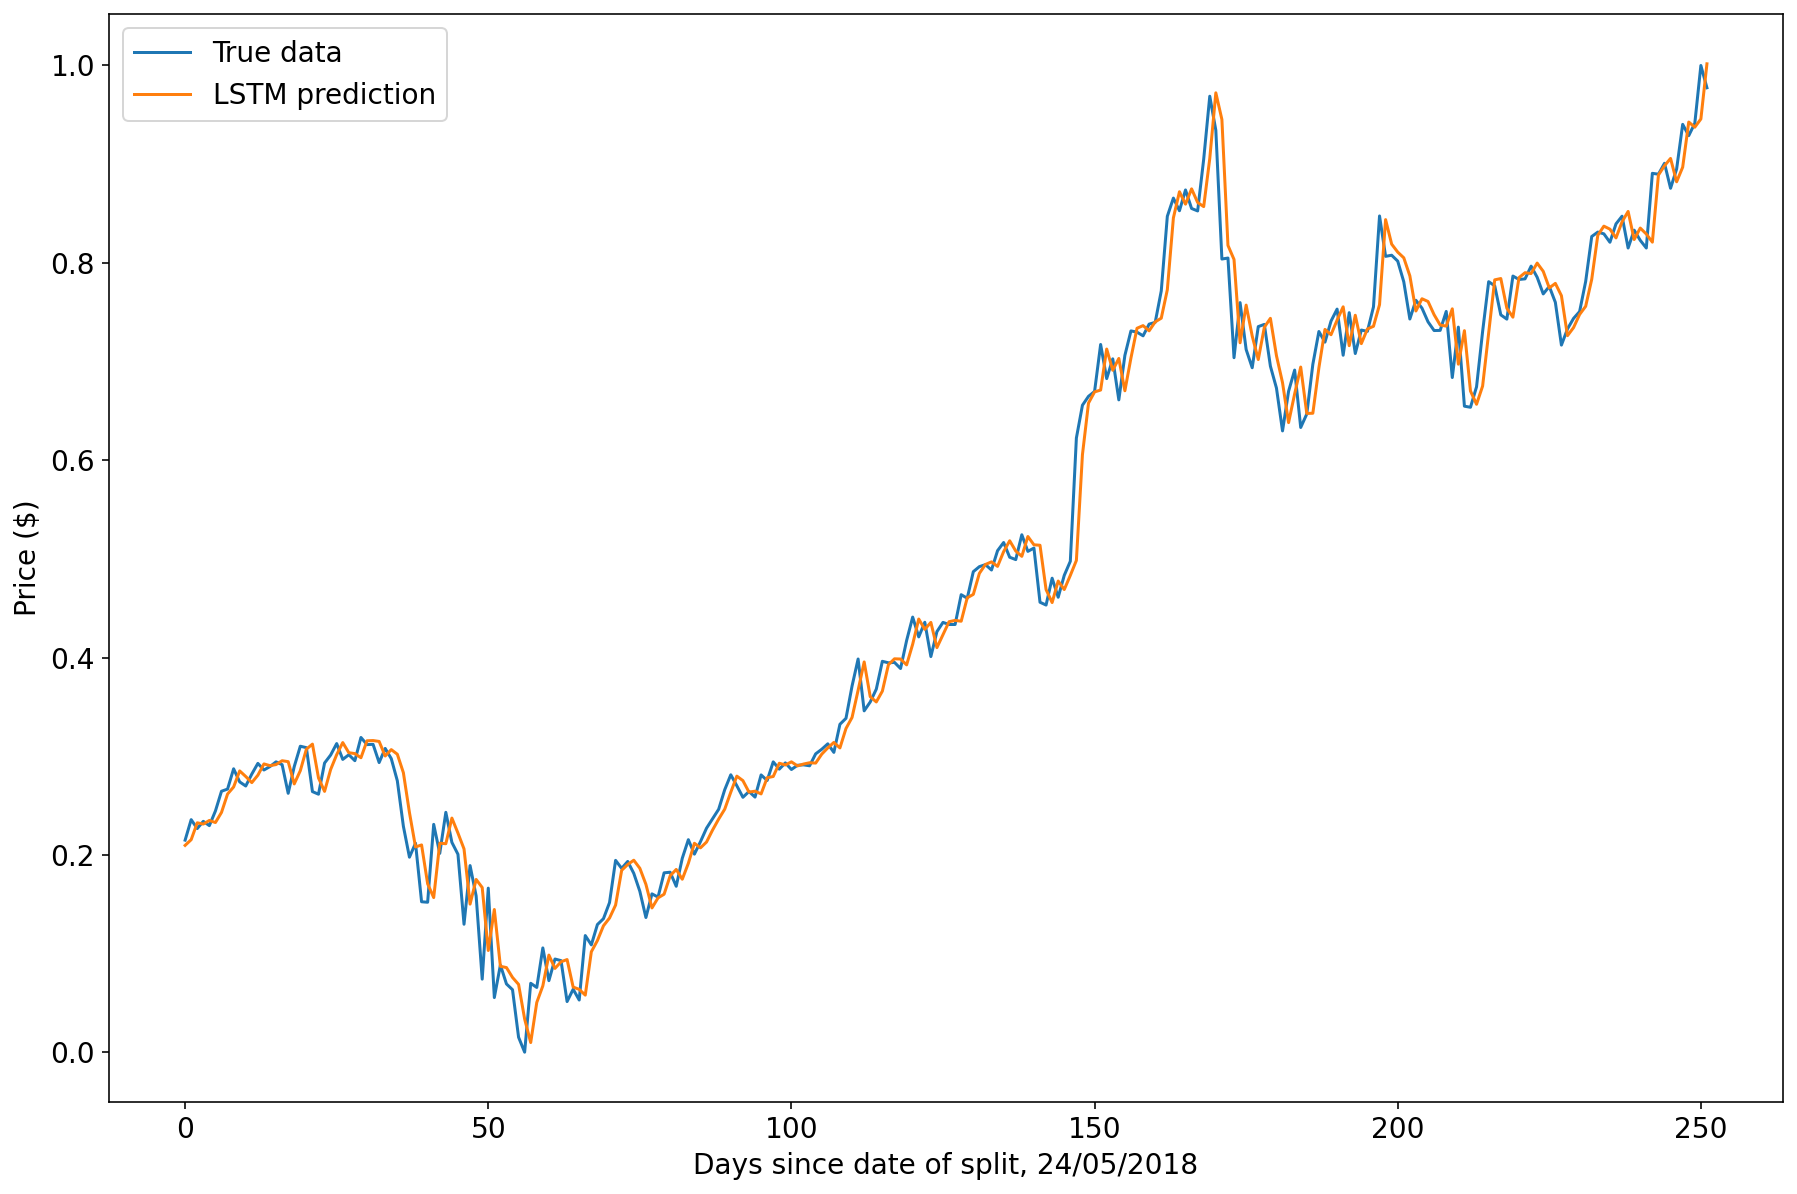

Important parameters: 
Stock analysed: AAPL
Batch size = 50
Epochs = 50
Neurons = 64
Training split 60.0%
Validation split 20.0%
Testing split 20.0%
──────────────────────────────────────────────────
MSFT
──────────────────────────────────────────────────
INFO:tensorflow:Oracle triggered exit


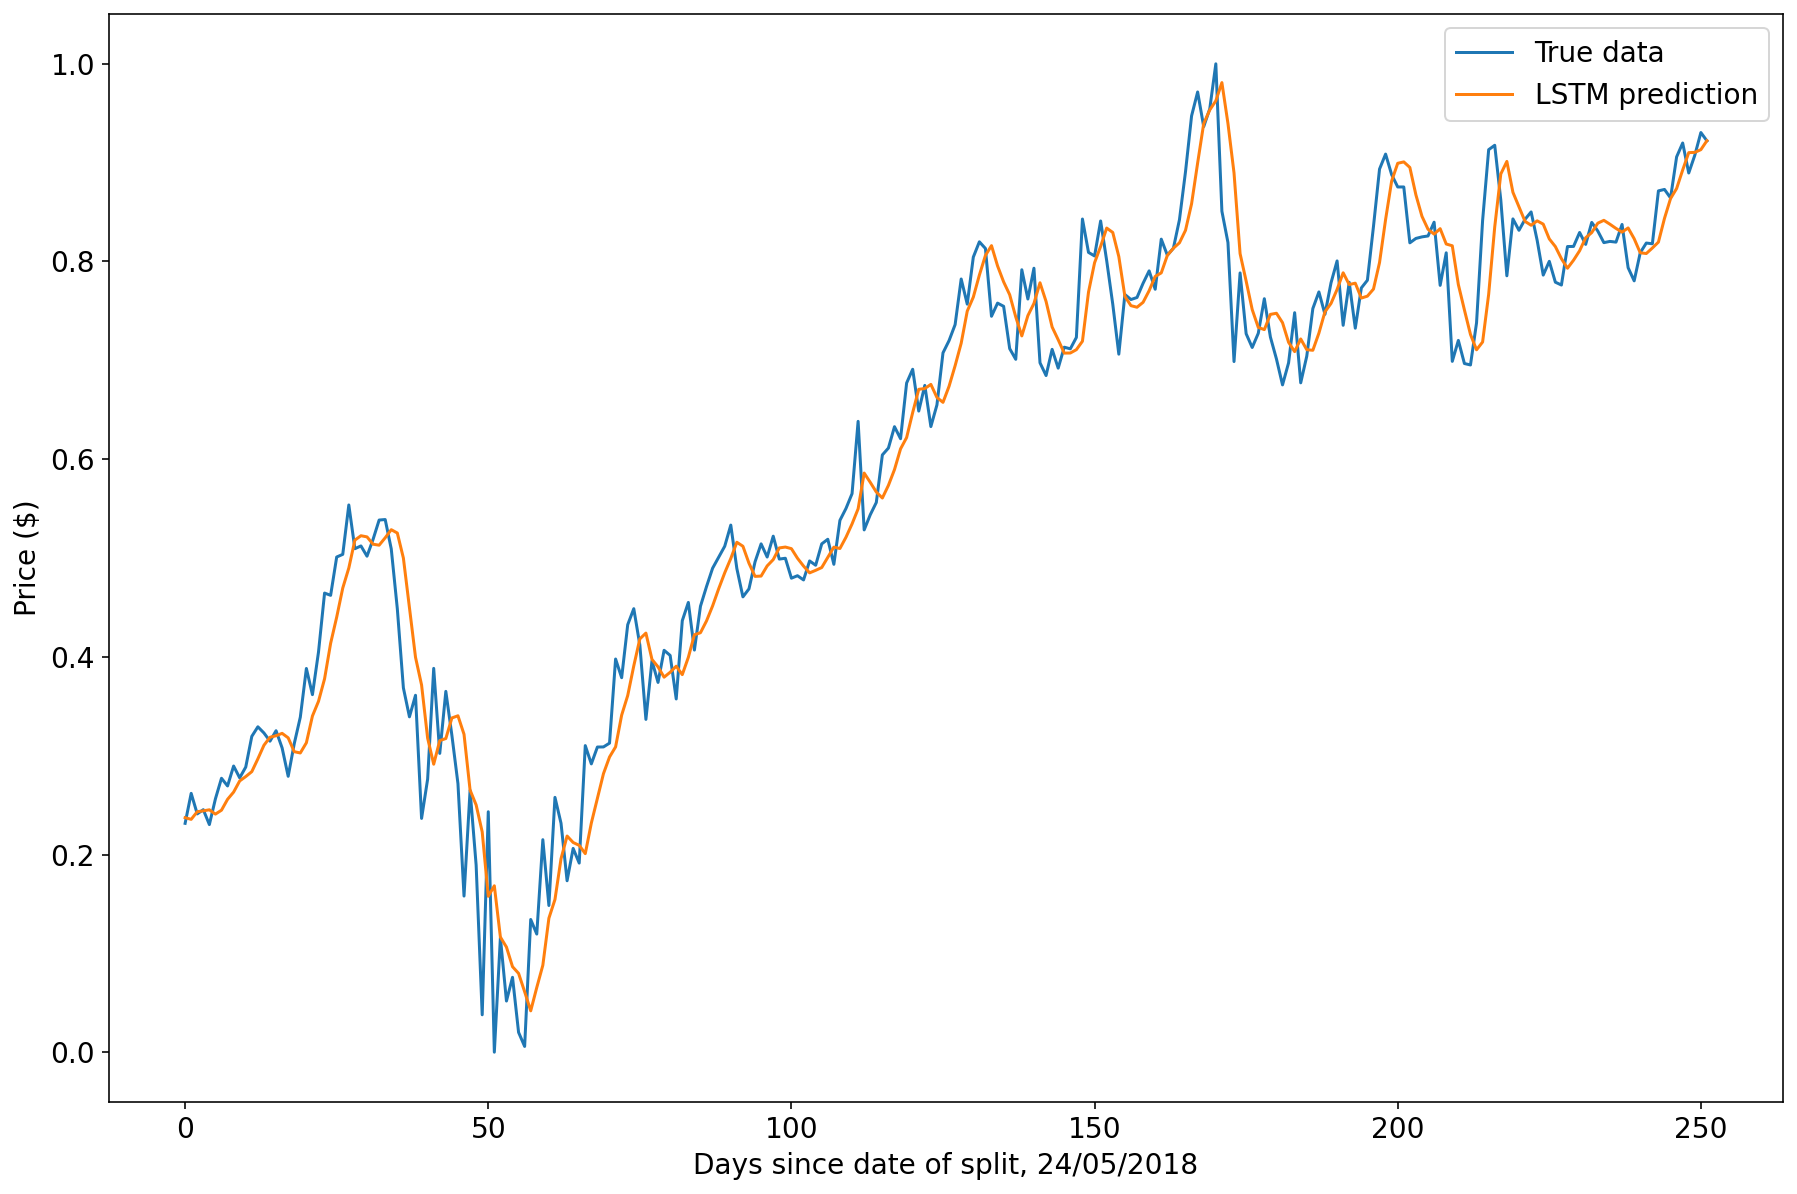

Important parameters: 
Stock analysed: MSFT
Batch size = 50
Epochs = 50
Neurons = 64
Training split 60.0%
Validation split 20.0%
Testing split 20.0%
──────────────────────────────────────────────────
GOOG
──────────────────────────────────────────────────
INFO:tensorflow:Oracle triggered exit


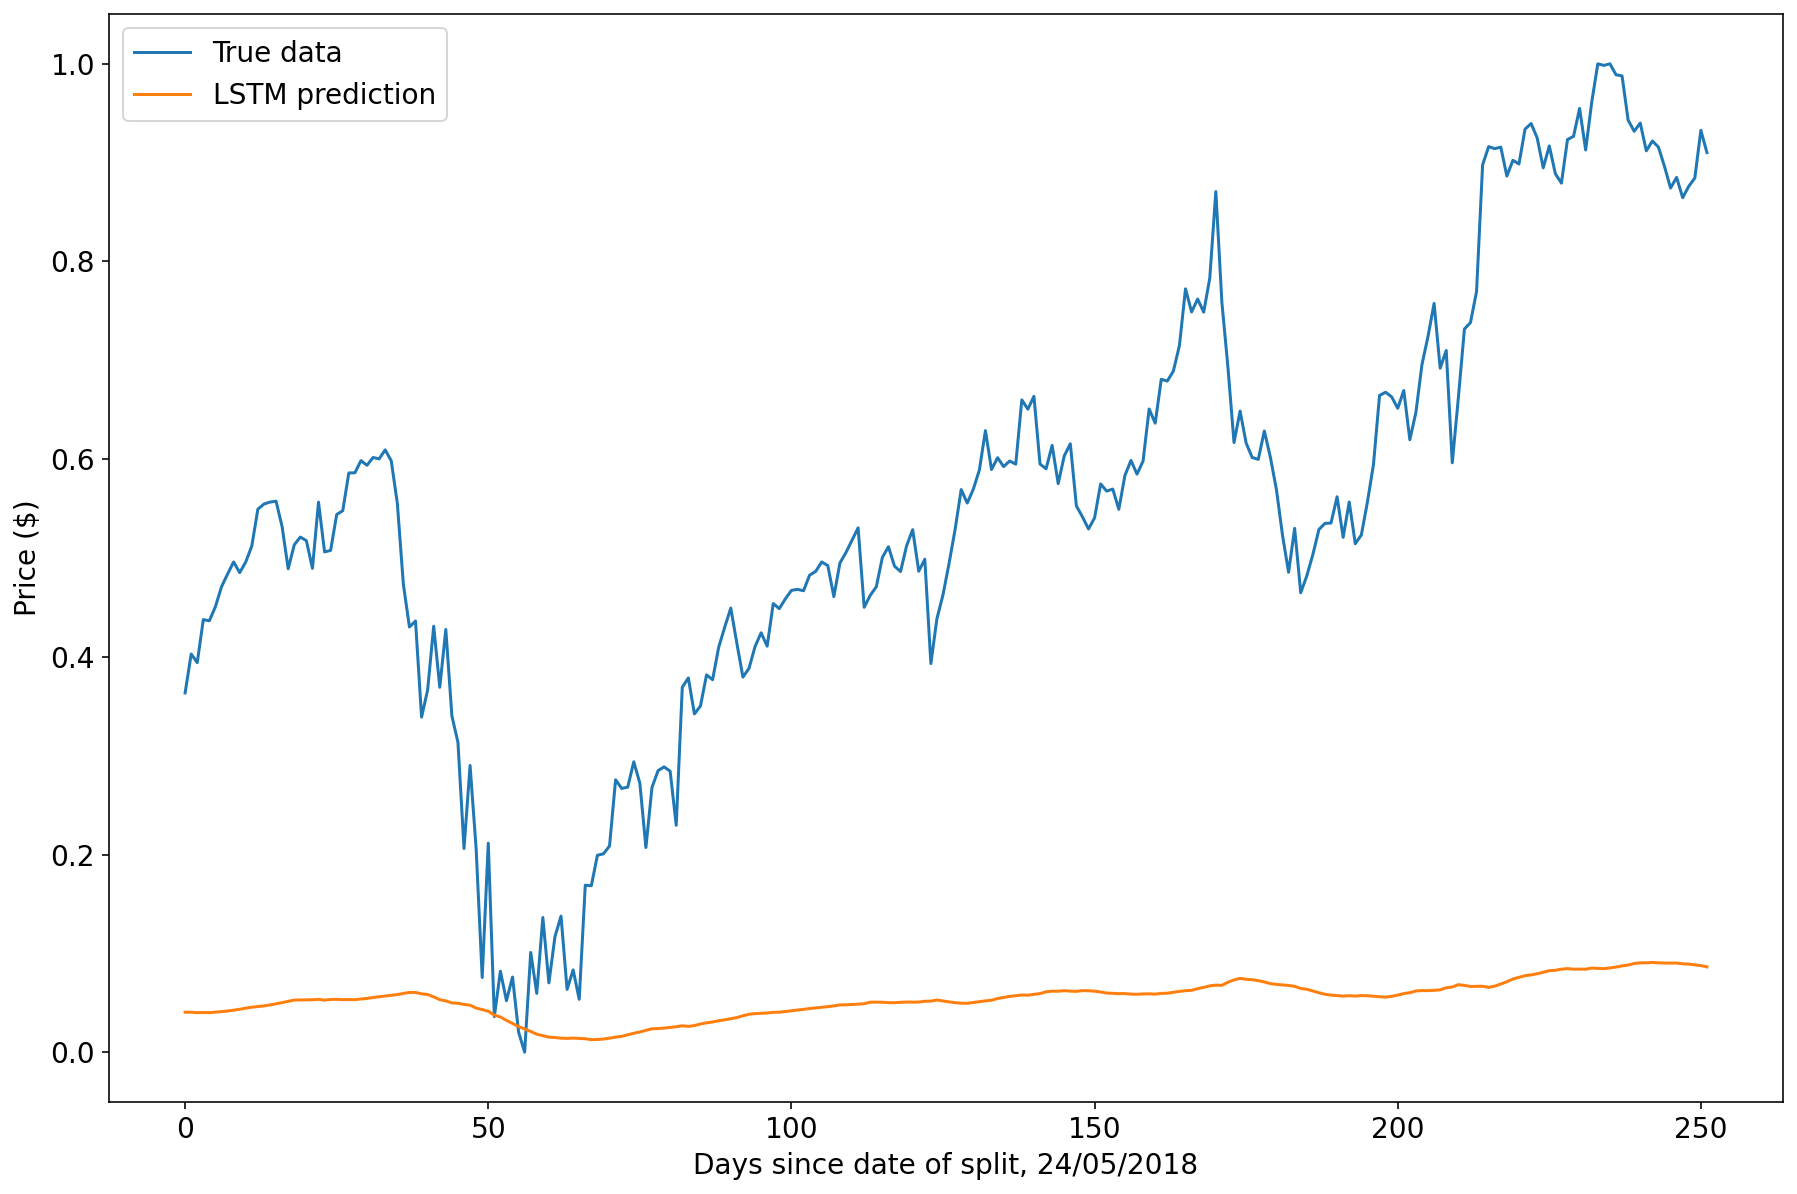

Important parameters: 
Stock analysed: GOOG
Batch size = 50
Epochs = 50
Neurons = 64
Training split 60.0%
Validation split 20.0%
Testing split 20.0%


In [43]:
isGPU = True # This setting skips the user-specified activation and dropout functions (GPU doesn't use these)

trainSplit = 0.6
splitRatio = [trainSplit, round(((1-trainSplit)/2),3), round(((1-trainSplit)/2),3)]
n_in = 50 
n_out = 1 
n_feat = 1 
n_epochs = 50 
n_neurons = 64 
n_trials = 3 
showConsoleOutput = False 

mae_all_stocks = [None]*numberOfStocks
mse_all_stocks = [None]*numberOfStocks
rmse_all_stocks = [None]*numberOfStocks
mape_all_stocks = [None]*numberOfStocks
execTime_all_stocks = [None]*numberOfStocks

for stock in range(0, numberOfStocks):
  printHeader(stockNames[stock])
  mae, mse, rmse, mape, execTimeCPU = LSTM_fitModel(stockClose[stock], splitRatio, n_epochs, n_trials)
  print("Important parameters: \nStock analysed: {}\nBatch size = {}\nEpochs = {}\nNeurons = {}\nTraining split {}%\nValidation split {}%\nTesting split {}%".format(stockNames[stock], n_in, n_epochs, n_neurons, trainSplit*100, ((1-trainSplit)/2)*100,((1-trainSplit)/2)*100))
  
  mae_all_stocks[stock] = mae
  mse_all_stocks[stock] = mse
  rmse_all_stocks[stock] = rmse
  mape_all_stocks[stock] = mape
  execTime_all_stocks[stock] = execTime

In [45]:
print("LSTM performance for the FAAMG group:")
print("Averages for MAE={:.5f}, MSE={:.5f}, RMSE={:.5f}, MAPE={:.5f}% and execTime={:.3f}s".format(np.mean(mae_all_stocks), np.mean(mse_all_stocks),np.mean(rmse_all_stocks),np.mean(mape_all_stocks),np.mean(execTime_all_stocks)))

LSTM performance for the FAAMG group:
Averages for MAE=91.12595, MSE=35655.89410, RMSE=102.54812, MAPE=6.65438% and execTime=53.786s


# Visual comparison

For a final view of the models, we plot both for the same data in the same range. We will choose an arbitrary stock, 'AAPL' for this.

Trial 3 Complete [00h 00m 09s]
val_loss: 0.0005407079588621855

Best val_loss So Far: 0.0005407079588621855
Total elapsed time: 00h 00m 31s
INFO:tensorflow:Oracle triggered exit


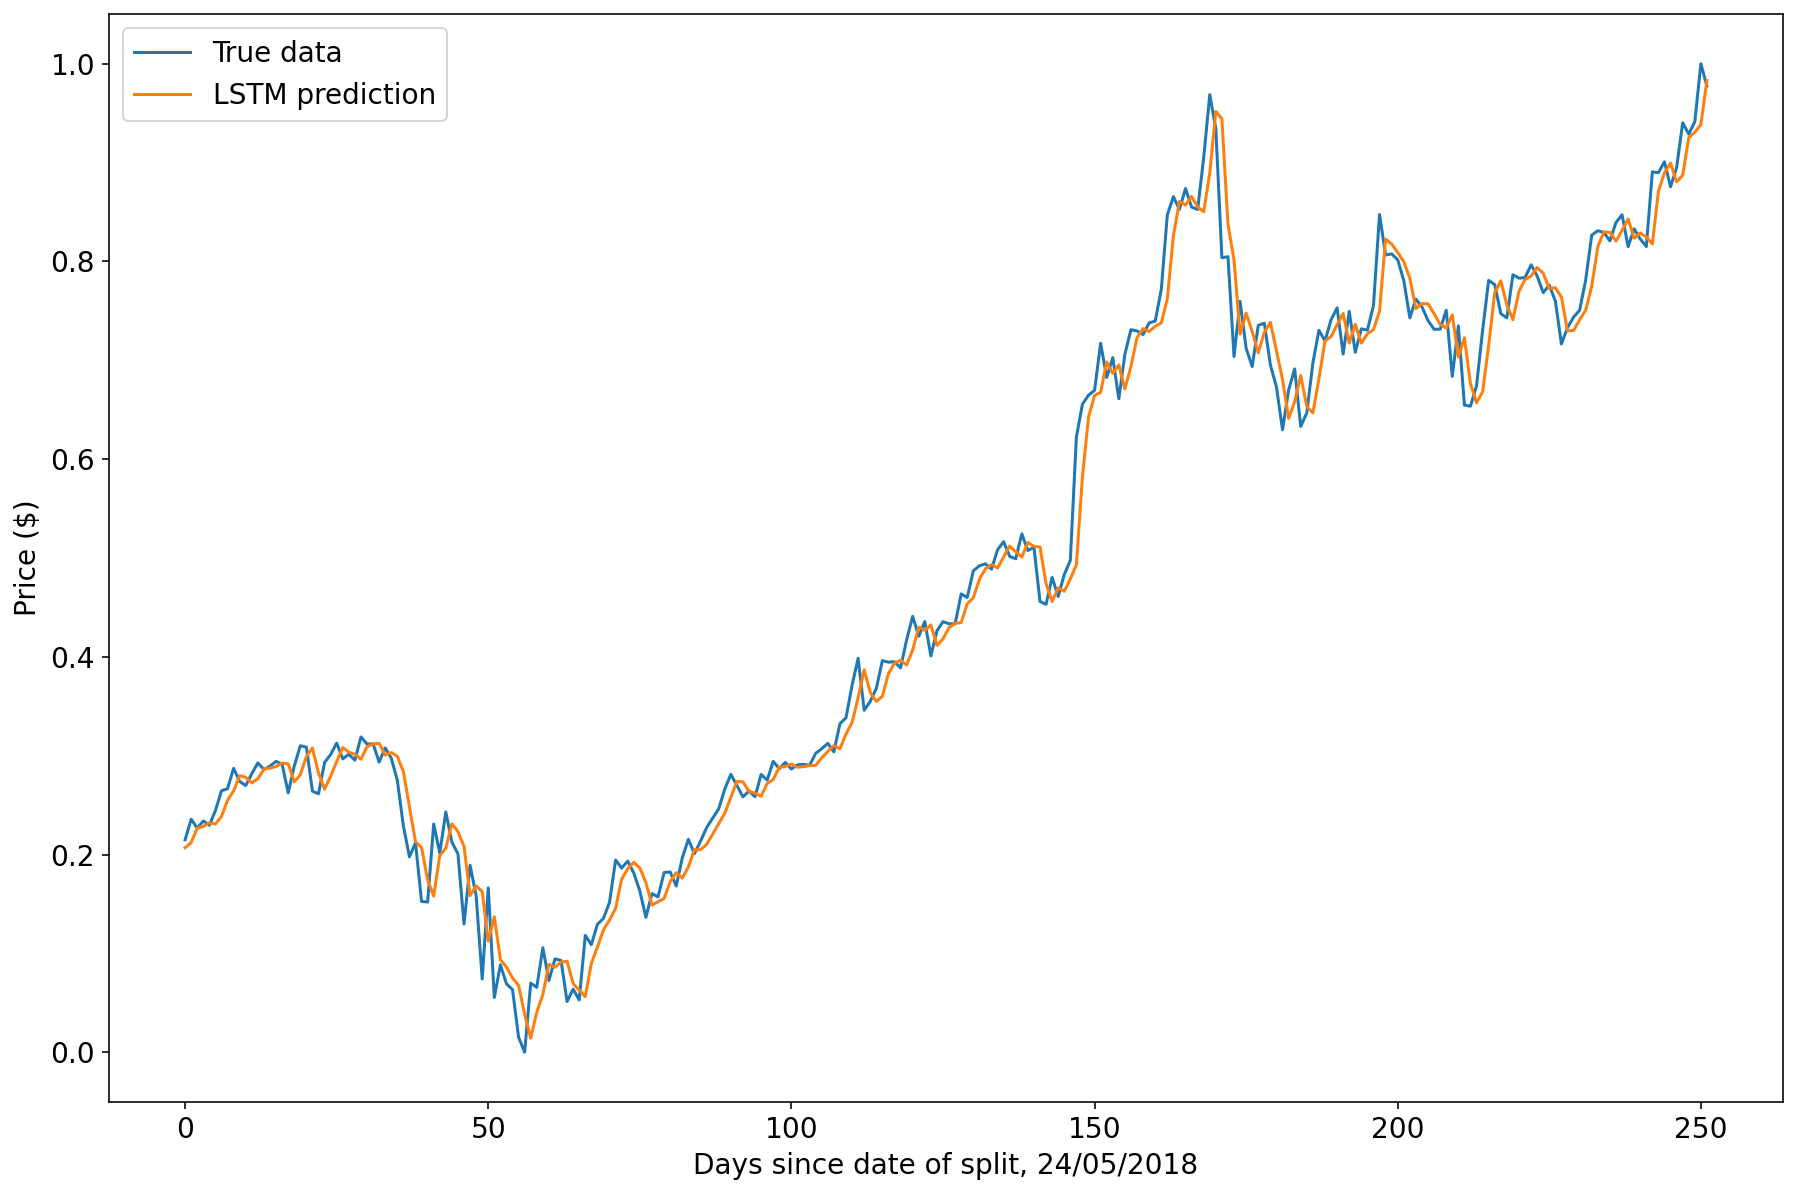

Important parameters: 
Stock analysed: AAPL
Batch size = 50
Epochs = 50
Neurons = 64
Training split 60.0%
Validation split 20.0%
Testing split 20.0%
MAE=1.87004
MSE=6.71871
RMSE=2.59205
MAPE=2.03850%
execTime=33.63s
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6942.283, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=6792.194, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6940.284, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=6207.580, Time=0.26 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=6127.899, Time=0.43 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.56 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=6125.901, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=6205.582, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=2.04 sec
 ARIMA(2,2,1)(0,0,0)[0]            

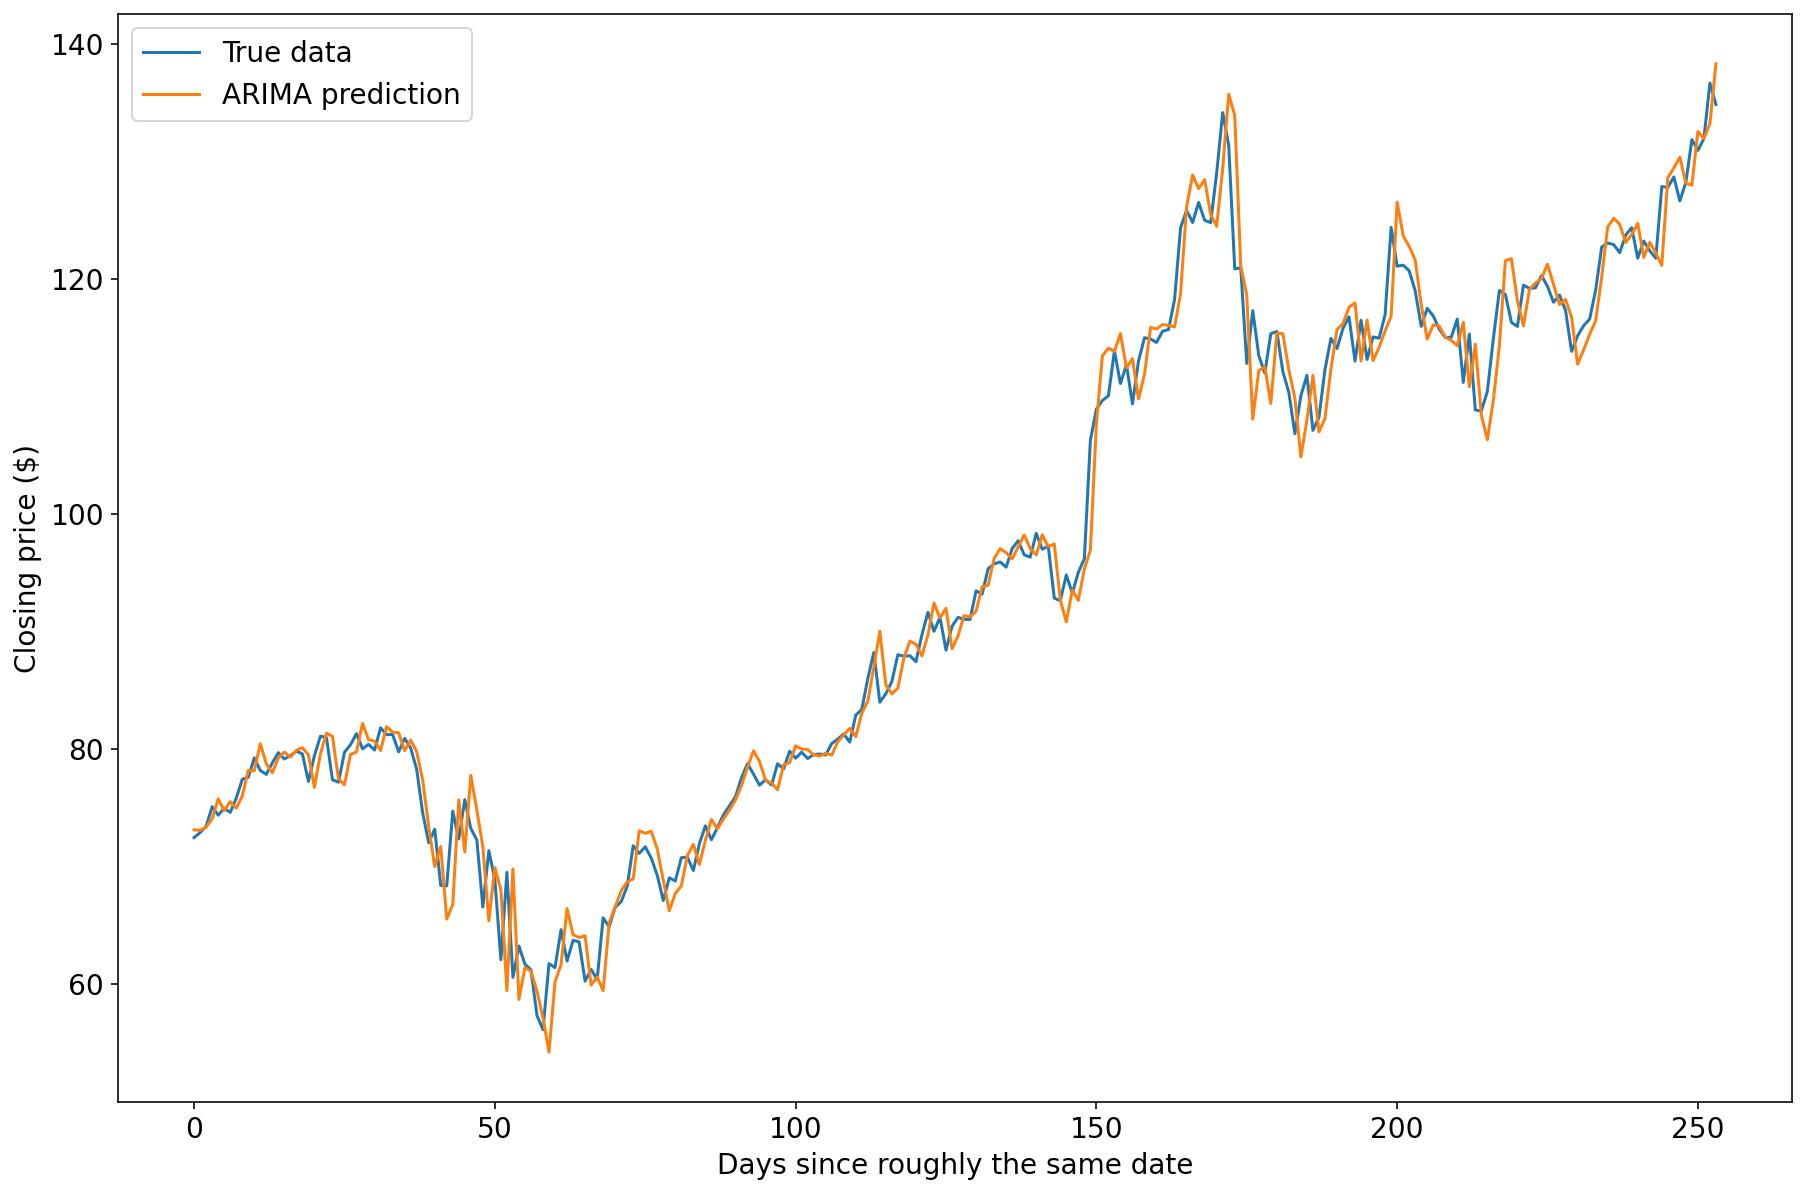

In [67]:
# LSTM
isGPU = True
showConsoleOutput = True
def MAPE(true,pred): 
  true = np.asarray(true)
  pred = np.asarray(pred)
  return np.mean(np.abs((true - pred) / true)) * 100
trainSplit = 0.6
stock = 2
n_in = 50 
n_out = 1 
n_feat = 1 
n_epochs = 50 
n_neurons = 64 
n_trials = 3 
splitRatio = [trainSplit, (1-trainSplit)/2, (1-trainSplit)/2]
mae, mse, rmse, mape, execTimeGPU = LSTM_fitModel(stockClose[stock], splitRatio, n_epochs, n_trials)
print("Important parameters: \nStock analysed: {}\nBatch size = {}\nEpochs = {}\nNeurons = {}\nTraining split {}%\nValidation split {}%\nTesting split {}%".format(stockNames[stock], n_in, n_epochs, n_neurons, trainSplit*100, ((1-trainSplit)/2)*100,((1-trainSplit)/2)*100))
print("MAE={:.5f}\nMSE={:.5f}\nRMSE={:.5f}\nMAPE={:.5f}%\nexecTime={:.2f}s".format(mae, mse, rmse, mape, execTimeGPU))

# ARIMA
compareFac = 0.58
def MAPE(true, pred): return mean_absolute_percentage_error(true,pred)
def ARIMA_plot(train, test, pred): 
  daysAfterSplit = np.arange(0, len(test))
  plt.plot((daysAfterSplit[int(len(test)*compareFac):])-350, test[int(len(test)*compareFac):], label = 'True data') # Not 100% to scale
  plt.plot((daysAfterSplit[int(len(test)*compareFac):])-350, pred[int(len(test)*compareFac):], label = 'ARIMA prediction')
  plt.xlabel('Days since roughly the same date')
  plt.ylabel('Closing price ($)')
  plt.legend()
trainSplit = 0.6 
splitRatio = [trainSplit, 0, 1-trainSplit] 
timeStart = time.time() 
logReturns = ARIMA_logReturns(stockClose[stock]) 
train, val, test, b1, b2, b3 = ARIMA_splitData(stockClose[stock], splitRatio) 
arimaModel = ARIMA_build(logReturns) 
mae, mse, rmse, mape, predictions = ARIMA_runModel(train, test) 
ARIMA_plot(train, test, predictions)
execTime = time.time() - timeStart
print("MAE={:.4f}, MSE={:.4f}, RMSE={:.4f}, MAPE={:.5f}%, execTime={:.2f}s".format(mae, mse, rmse, mape, execTime))